# Imports y creacion y preparacion del dataset

In [ ]:
#%tensorflow_version 2.x

import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize #Para poder hacer resize a las imagenes y convertirlas en más grandes
import random
print(tf.keras.__version__)

#Cargamos el dataset MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Reducimos el rango de los valores a entre 0 y 1
train_images = train_images/255
test_images = test_images/255

#Añadimos la informacion de que se trata de un solo canal (y no 3 como en el caso de RGB)
train_images = train_images.reshape(60000,28,28,1)
train_images = train_images.astype('float32')

test_images = test_images.reshape(10000,28,28,1)
test_images = test_images.astype('float32')

#Transformamos los vectores con las etiquetas a categoricos, representando la posicion del 1 en el vector al numero correpondiente
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
num_clases = len(class_names)

#Creamos el modelo
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D

indices_0_9 = [545,5848,35,369,803,45,729,34,787,284] # Son los indices de los números (ordenados de 0 a 9)

!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.5.0
4423680/4422102 [==============================] - 0s 0us/step
Wed Jun 30 06:50:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------

# Función para seleccionar el modelo

In [ ]:
def create_model(modelo):
  input_shape = (28, 28, 1)
  num_classes=10
  if modelo == 0:
    model = keras.Sequential(
        [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name='conv2d'),
        keras.layers.MaxPooling2D(pool_size=(2, 2), name= 'max_pooling2d'),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",name='conv2d_1'),
        keras.layers.MaxPooling2D(pool_size=(2, 2), name= 'max_pooling2d_1'),
        keras.layers.Flatten(name='flatten'),
        keras.layers.Dropout(0.25,name='dropout'),
        keras.layers.Dense(64,activation='relu',name='dense'),
        keras.layers.Dense(10, activation="softmax", name='softmax'),
         ]
         )
    clasif_layers = ['max_pooling2d_1','flatten','dropout','dense','softmax']
    dknn_layers = ['conv2d','conv2d_1','dense','softmax']
    last_conv = 'conv2d_1'

  elif modelo == 1:
    model = keras.Sequential(
    [
    keras.Input(shape=input_shape),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name='conv2d'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), name= 'max_pooling2d'),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",name='conv2d_1'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), name= 'max_pooling2d_1'),
    keras.layers.Flatten(name='flatten'),
    keras.layers.Dropout(0.5,name='dropout'),
    keras.layers.Dense(10, activation="softmax", name='softmax'),
      ]
      )
    clasif_layers = ['max_pooling2d_1','flatten','dropout','softmax']
    dknn_layers = ['conv2d','conv2d_1','softmax']
    last_conv = 'conv2d_1'

  elif modelo == 2:
    model = keras.Sequential(
      [
      keras.Input(shape=input_shape),
      keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu",name='conv2d'),
      keras.layers.MaxPooling2D(pool_size=(2, 2), name= 'max_pooling2d'),
      keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu",name='conv2d_1'),
      keras.layers.MaxPooling2D(pool_size=(2, 2), name= 'max_pooling2d_1'),
      keras.layers.Flatten(name='flatten'),
      keras.layers.Dropout(0.5,name='dropout'),
      keras.layers.Dense(24,activation='relu',name='dense'),
      keras.layers.Dense(10, activation="softmax", name='softmax'),
        ]
        )
    clasif_layers = ['max_pooling2d_1','flatten','dropout','dense','softmax']
    dknn_layers = ['conv2d','conv2d_1','dense','softmax']
    last_conv = 'conv2d_1'

  elif modelo == 3:
    model = keras.Sequential(
      [
      keras.Input(shape=input_shape),
      keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name='conv2d'),
      keras.layers.MaxPooling2D(pool_size=(2, 2), name= 'max_pooling2d'),
      keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",name='conv2d_1'),
      keras.layers.MaxPooling2D(pool_size=(2, 2), name= 'max_pooling2d_1'),
      keras.layers.Flatten(name='flatten'),
      keras.layers.Dense(10, activation="softmax", name='softmax'),
        ]
        )
    clasif_layers = ['max_pooling2d_1','flatten','softmax']
    dknn_layers = ['conv2d','conv2d_1','softmax']
    last_conv = 'conv2d_1'

  elif modelo == 4:
    initializer1 = tf.keras.initializers.GlorotNormal(1)
    initializer2 = tf.keras.initializers.GlorotNormal(2)
    initializer3 = tf.keras.initializers.GlorotNormal(3)
    initializer4 = tf.keras.initializers.GlorotNormal(4)
    model = keras.Sequential(
        [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name='conv2d',kernel_initializer=initializer1),
        keras.layers.MaxPooling2D(pool_size=(2, 2), name= 'max_pooling2d'),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",name='conv2d_1',kernel_initializer=initializer2),
        keras.layers.MaxPooling2D(pool_size=(2, 2), name= 'max_pooling2d_1'),
        keras.layers.Flatten(name='flatten'),
        keras.layers.Dropout(0.25,name='dropout'),
        keras.layers.Dense(64,activation='relu',name='dense',kernel_initializer=initializer3),
        keras.layers.Dense(10, activation="softmax", name='softmax',kernel_initializer=initializer4),
         ]
         )
    clasif_layers = ['max_pooling2d_1','flatten','dropout','dense','softmax']
    dknn_layers = ['conv2d','conv2d_1','dense','softmax']
    last_conv = 'conv2d_1'

  return model, clasif_layers, dknn_layers, last_conv

# Seleccion del modelo y sus parametros de compilacion

In [ ]:
'''
Opciones de modelos:
0 -> Con Dense 64 entre Softmax y Flatten, y con Dropout 0.25
1 -> Sin Dense, y con Dropout 0.5
2 -> Con menos filtros por convolucion (8 y 16), con Dense 24, y Dropout 0.5
3- > Sin droput y sin Dense
4 -> Como 0, pero con weight initializers fijos (con random_seed definida)
'''
model, layer_names, dknn_layers, last_conv = create_model(4)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

# Funciones


> Dentro esta GradCAM++




In [ ]:
# Celda donde se definen las funciones que se van a utilizar

# Funcion que resetea los pesos aleatoriamente
def shuffle_weights(model, weights=None):
    """Randomly permute the weights in `model`, or the given `weights`.

    This is a fast approximation of re-initializing the weights of a model.

    Assumes weights are distributed independently of the dimensions of the weight tensors
      (i.e., the weights have the same distribution along each dimension).

    :param Model model: Modify the weights of the given model.
    :param list(ndarray) weights: The model's weights will be replaced by a random permutation of these weights.
      If `None`, permute the model's current weights.
    """
    if weights is None:
        weights = model.get_weights()
    weights = [np.random.permutation(w.flat).reshape(w.shape) for w in weights]
    # Faster, but less random: only permutes along the first dimension
    # weights = [np.random.permutation(w) for w in weights]
    model.set_weights(weights)

# Funcion que hace plot del entrenamiento, donde se ve la acc vs loss
def plot_historia(history):
  
  acc      = history.history[     'accuracy' ]
  val_acc  = history.history[ 'val_accuracy' ]
  loss     = history.history[         'loss' ]
  val_loss = history.history[     'val_loss' ]

  epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

  plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
  plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
  plt.title ('Training and Validation Accuracy')
  plt.ylabel('acc')
  plt.xlabel('epochs')

  plt.legend()
  plt.figure()


  plt.plot  ( epochs,     loss, 'r--', label='Training loss'  )
  plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
  plt.title ('Training and Validation Loss'   )
  plt.ylabel('loss')
  plt.xlabel('epochs')

  plt.legend()
  plt.figure()

# El segundo código que encontré para GradCAM, que además te da el Saliency Map. Está comentado por mí parte de el, la otra parte venía ya en castellano.
def make_gradcam_heatmap_V2(img_array, model, last_conv_layer_name, classifier_layer_names, top_pred_index=None):
   
    # classifier_layer_names son los nombres de lo que hay despues de la ultima capa conv

    # Modelo que mapea la imagen de entrada a la capa convolucional última,
    # donde se calculará la activación
    last_conv_layer  = model.get_layer(last_conv_layer_name)
    conv_model       = keras.Model(model.inputs, last_conv_layer.output)
    if img_array.ndim == 3:
      img_array = np.expand_dims(img_array,axis=0)

    # Modelo que mapea las activaciones a la salida final
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)
    
    # Cálculo del gradiente la salida  del modelo clasificador respecto a     
    with tf.GradientTape() as tape:
        
        # Calcula activacion del modelo base convolucional
        last_conv_layer_output = conv_model(img_array)
        tape.watch(last_conv_layer_output)  # Esto guarda los valores que vayan saliendo creo
        
        # Calcula la predicción con modelo clasificador, para la clase mas probable
        preds = classifier_model(last_conv_layer_output) #Introduce el output de la ultima capa conv a el modelo clasificador, que es lo que va depues, es decir, obtiene la prediccion
        #print('preds',preds)
        if top_pred_index is None: # Si no hemos pasado este parámetro, se hace el calculo respecto de la clase predicha
          top_pred_index = tf.argmax(preds[0])
        #print("top_pred_index",top_pred_index)
        top_class_channel = preds[:, top_pred_index]  # Coge todas las filas (solo es una en nuestro caso) y se queda con el valor de prediccion de nuestra clase
        #print("top_class_channel",top_class_channel)

    # Obtenemos el gradiente en la capa final clasificadora con respecto a
    # la salida del modelo base convolucional
    grads = tape.gradient(top_class_channel, last_conv_layer_output) 
    # Sale un tensor de forma (1,11,11,64), como debe ser, ya que se computa el gradiente de la salida 
    # de la capa final clasificadora (la prediccion) con respecto a la ultima convolucion, que tiene la forma mencionada
    #print("grads",grads.shape, type(grads))

    # Vector de pesos: medias del gradiente por capas,
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)) #Reduce cada feature map a la media de sus gradientes (8x8 gradientes)
    # Con esto sacas los Neuron Importance Weights. En el paper dice que representa una linearizacion parcial de la red profunda a partir de
    # la capa de feature maps o activation maps A. No se en que sentido, si hacia el inicio o hacia el final
    #print("pooled_grads",pooled_grads)

    # salida de la última capa convolucional
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    #print("last_conv_outp",last_conv_layer_output.shape, "  type:", type(last_conv_layer_output))
    
    # saliencia es la respuesta promedio de la última capa convolucional
    saliency = np.mean(last_conv_layer_output, axis=-1) # Media de todos los feature maps
    saliency = np.maximum(saliency, 0) / np.max(saliency) #ReLU más normalizacion entre 0 y 1
    
    # Multiplicación de cada canal (la media de cada feature map) por el vector de pesos
    # Así se pondera cada feature map (todo ello, el mapa entero) en función a lo que la media del gradiente de cada uno de sus pixeles
    # DUDA: No debería hacerse directamente el layer_output por cada gradiente? en vez de la media
    # RESPUESTA: Se hace así porque lo han comprobado empiricamente en el paper. Así se consigue lo que el llama Neuron Importance Weights
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]
        
    # Heatmap: promedio de cada canal por su peso. 
    grad_cam = np.mean(last_conv_layer_output, axis=-1) # Es decir, coges los 64 canales y haces la media de 64 pixeles por cada pixel de tu feature map de 8x8
    #print(grad_cam, grad_cam.shape) 
    grad_cam = np.maximum(grad_cam, 0) / np.max(grad_cam) 
    # np.maximum al comparar con un valor "a", hace que todo valor menor sea sustituido por el valor "a". Viene a ser la funcion ReLU
    # np.max te da el valor maximo de todo el ndarray
    # por tanto lo que está haciendo con esta operacion es quitar negativos y hacer que todo valga entre 0 y 1
    # Lo de que valga entre 0 y 1 creo que es para que pueda ser correctamente visualizado
    
    return grad_cam, saliency

# Funcion que hace plot de los heatmaps creados
def plot_heatmaps(rows, cols, inicio, layer_names, preds, test_images, test_labels,top_pred_index=None, numero=None, img_resize=True):
  """
  En cada columna va una instacia de test_images
  En cada fila se representa lo siguiente:
    1) La imagen del numero
    2) El GradCAM heatmap
    3) El Saliency map
    4) GrandCAM + Numero superpuestos
    5) Saliency Map + Numero superpuestos

  Si se proporciona un numero, solo hace el plot de dicho numero
  """
  if numero != None:
    indices = buscar_num(numero,cols,test_labels,inicio) # Los indices del número que has definido que hay que buscar
  else:
    indices = [r for r in range(inicio,inicio+cols)] # En caso de no definir un numero simplemente hace plot desde la pos inicio
  for j in range(cols):
    grad_cam_hm, saliency = make_gradcam_heatmap_V2(np.expand_dims(test_images[indices[j]],axis=0),model, 'conv2d_1', layer_names)
    img = test_images[indices[j],:,:,0]
    ax[0,j].imshow(img, cmap='binary')
    set_axis_props(0,j,np.argmax(preds[indices[j]]))
    if img_resize == True:
      ax[1,j].imshow(resize(grad_cam_hm, (28,28)))
    else:
      ax[1,j].imshow(grad_cam_hm)
    set_axis_props(1,j)
    if img_resize == True:
      ax[2,j].imshow(resize(saliency, (28,28)))
    else:
      ax[2,j].imshow(saliency)
    set_axis_props(2,j)
    subplt_hotmap(3,j,img,grad_cam_hm)
    set_axis_props(3,j)
    subplt_hotmap(4,j,img,saliency)
    set_axis_props(4,j)
  fig.show()


# Funcion para hacer plot de un heatmap superpuesto a una imagen dentro de un subplot de una figura
def subplt_hotmap (i,j,img, heatmap, title='Heatmap', alpha=0.6, cmap='jet', axisOnOff='off'):
    resized_heatmap=resize(heatmap, img.shape)
    ax[i,j].imshow(img)
    ax[i,j].imshow(resized_heatmap, alpha=alpha, cmap=cmap)
    plt.axis(axisOnOff)
    #plt.title(title)

# Funcion para definir las propiedades de un subplot
def set_axis_props(i,j, title=None):
  ax[i,j].set_xticks([])
  ax[i,j].set_yticks([])
  if title != None:
    ax[i,j].set_title(title, fontsize=30)

# Funcion que encuentra un num las n_veces que quieras en un conjunto de imagenes de numeros (empezando a buscar desde la pos que indiques) develve una lista con los indices de los números.
# Para ello hay que proporcionar el número que buscas, cuantas veces lo quieres, el vector con las etiquetas y la posicion en la que quieres que empiece a buscar
def buscar_num(num, n_veces, labels, pos=0):
  '''
  Funcion que encuentra un num las n_veces que quieras en 
  un conjunto de imagenes de numeros (empezando a buscar desde la pos que indiques) 
  develve una lista con los indices de los números
  '''
  lista_indices = []
  n=0
  i=0
  while n <= n_veces:
    if num == np.argmax(labels[pos+i]):
      lista_indices.append(pos+i)
      n = n+1
    i = i+1
  return lista_indices

# Gira las imagenes que proporciones y te devuelve el mismo tensor pero con las imagenes giradas
def girar_img(imgs, ang):
  '''
  Gira tantas imagenes como le proporciones el angulo especificado
  Forma del array de imgs: (num_imagenes o batch, height,width,channel)
  '''
  for i in range(len(imgs)): # len() te da el valor de longitud del primer eje
    img = tf.keras.preprocessing.image.array_to_img(imgs[i])
    img = tf.keras.preprocessing.image.img_to_array(img.rotate(ang)) / 255
    imgs[i] = img

# Hace plot del heatmap en el axes le pases
def plot_heatmap(axes,i,j,heatmap,resize_img=False,title=None,superimposed_img=False,imagen=None):
  if imagen.ndim !=2:
    imagen = imagen.squeeze()
  if superimposed_img == True:
    axes[i,j].imshow(imagen,vmin=0,vmax=1)
    axes[i,j].imshow(resize(heatmap,(28,28)),alpha=0.6,cmap='jet',vmin=0,vmax=1)
  elif resize_img == False:
    axes[i,j].imshow(heatmap,vmin=0,vmax=1)
  else:
    axes[i,j].imshow(resize(heatmap,(28,28)),vmin=0,vmax=1)
  axes[i,j].set_xticks([])
  axes[i,j].set_yticks([])
  if title != None:
    axes[i,j].set_title(title, fontsize=30)
  return axes

def plot_heatmap_retrieve_im(axes,i,j,heatmap,resize_img=False,title=None,superimposed_img=False,imagen=None):
  if imagen.ndim !=2:
    imagen = imagen.squeeze()
  if superimposed_img == True:
    axes[i,j].imshow(imagen,vmin=0,vmax=1)
    im = axes[i,j].imshow(resize(heatmap,(28,28)),alpha=0.6,cmap='jet',vmin=0,vmax=1)
  elif resize_img == False:
    im = axes[i,j].imshow(heatmap,vmin=0,vmax=1)
  else:
    im = axes[i,j].imshow(resize(heatmap,(28,28)),vmin=0,vmax=1)
  axes[i,j].set_xticks([])
  axes[i,j].set_yticks([])
  if title != None:
    axes[i,j].set_title(title, fontsize=30)
  return axes,im

# Funcion que genera video a partir de los frames almacenados en una carpeta
# Se encarga tambn de ordenarlos primero
import cv2
import os
from os.path import isfile, join

def convertToVideo(pathIn, pathOut, fps, time):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    files.sort(key=lambda x: int((x.split("_")[1].split(".")[0]))) # REORDENA FRAMES
    for i in range(len(files)):
        filename = pathIn+files[i]
        #print(filename)
        img=cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)

        for k in range (time):
            frame_array.append(img)

    out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)
    for i in range(len(frame_array)):
        out.write(frame_array[i])
    out.release()
    print("TASK COMPLETED")

In [ ]:
def grad_cam_plus(img, model,  layer_name="conv2d_1", label_name=None, category_id=None):
    """Get a heatmap by Grad-CAM.
    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.
    Return:
        A heatmap ndarray(without color).
    """
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = tf.keras.Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    # Aqui se computa el valor alpha, que yo he llamado pixel importance weight 
    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10) # Esto no se que es lo que hace
    
    # Ahora junta numerador y denominador, pero luego hace una normalizacion que no entiendo por que la hace
    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant 

    weights = np.maximum(conv_first_grad[0], 0.0) # ReLU a los gradientes. Demostrado empiricamente que funciona mejor

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1)) # Los Neuron Importance Weights de GradCAM
    grad_CAM_map = np.sum(deep_linearization_weights*conv_output[0], axis=2) # Computa el mapa haciendo el sumatorio de cada mapa por su w

    # Para visualizacion, se queda solo con los valores positivos y normaliza
    heatmap = np.maximum(grad_CAM_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0: # Esto no se muy bien por que lo hace
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

# Entrenamiento del modelo


In [ ]:
# Entrenamiento del modelo
i=60000-1 # Pongo 50000 para no entrenar con el dataset de calib
batch_size=100
epochs=5

history=model.fit(train_images[0:i], train_labels[0:i], batch_size ,epochs ,verbose=1, validation_split=0.08)

Epoch 1/5
552/552 [==============================] - 17s 3ms/step - loss: 0.5877 - accuracy: 0.7859 - val_loss: 0.4000 - val_accuracy: 0.8521
Epoch 2/5
552/552 [==============================] - 2s 3ms/step - loss: 0.3842 - accuracy: 0.8622 - val_loss: 0.3440 - val_accuracy: 0.8683
Epoch 3/5
552/552 [==============================] - 2s 3ms/step - loss: 0.3347 - accuracy: 0.8779 - val_loss: 0.3076 - val_accuracy: 0.8935
Epoch 4/5
552/552 [==============================] - 2s 3ms/step - loss: 0.3025 - accuracy: 0.8895 - val_loss: 0.2888 - val_accuracy: 0.8967
Epoch 5/5
552/552 [==============================] - 2s 3ms/step - loss: 0.2811 - accuracy: 0.8969 - val_loss: 0.2781 - val_accuracy: 0.8979


In [ ]:
plot_historia(history)

<Figure size 432x288 with 0 Axes>

# Codigo para representar figuras estáticas de la explicabilidad




### Saliency Map y GradCAM por separado y superpuestos con imagenes giradas


> Se puede configurar el numero, la clase, y si hay resize

In [ ]:
# Plot de varias imagenes de un número con el Saliency Map y el GradCAM por separado y superpuestos. En filas están los distintos mapas y en columnas las instancias de test
# Se pueden plotear con las intancias giradas el angulo ang
ang = 0
g_test_images = np.array(test_images, copy=True)
girar_img(g_test_images, ang)

rows, cols = 5,10 # Definimos cuantas columnas (cuantas veces el mismo numero) queremos
inicio = 30 # Desde donde empieza a buscar en test_images
#layer_names = ['max_pooling2d_1', 'flatten','dropout', 'softmax'] # Nombres de las layers para que GradCAM y Saliency funcionen
preds = model.predict(g_test_images) # Las prediciones para colocar el titulo al plot

num = None  # Que número queremos plotear. Si no se quiere numero, sino simplemente test_images a partir de una posicion, poner a None.
clase = None # Sirve para que los mapas nos los haga respecto a la clase marcada
img_resize = False
fig, ax = plt.subplots(rows, cols, clear=True, figsize=[22,cols+2]) # Creamos la figura para que sea un objeto global
plot_heatmaps(rows,cols,inicio,layer_names,preds,g_test_images, test_labels,top_pred_index=clase, numero=num,img_resize=img_resize)

In [ ]:
# Representamos en un grafico 4x5 los heatmaps de los numeros del 0 al 9, tanto por separado como superpuestos. Los numeros son GIRADOS


indices = [545,5848,35,369,803,45,729,34,787,284] # Son los indices de los números (ordenados de 0 a 9)
#layer_names = ['max_pooling2d_1', 'flatten','dropout', 'dense'] 
angulo = -90


# Se realiza la copia en cada iteracion ya que al encadenar giros se pierde informacion de la imagen
# De esta forma evitamos dicha perdida de informacion
g_test_images = np.array(test_images, copy=True) # Hay que copiar test_images para no alterar el array original
girar_img(g_test_images, angulo) 
fig, ax = plt.subplots(4, 5, clear=True, figsize=[25,20])
for j in range(5):
  gradcam_htmap, saliency_htmap = make_gradcam_heatmap_V2(np.expand_dims(g_test_images[indices[j]],axis=0),model, 'conv2d_1', layer_names,top_pred_index=j)
  titulo = np.argmax(model.predict(np.expand_dims(g_test_images[indices[j]],axis=0)))
  plot_heatmap(ax,0,j,gradcam_htmap, title=titulo)
  plot_heatmap(ax,2,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=g_test_images[indices[j],:,:,0])

  gradcam_htmap, saliency_htmap = make_gradcam_heatmap_V2(np.expand_dims(g_test_images[indices[j+5]],axis=0),model, 'conv2d_1', layer_names,top_pred_index=j+5)
  titulo = np.argmax(model.predict(np.expand_dims(g_test_images[indices[j+5]],axis=0)))
  plot_heatmap(ax,1,j,gradcam_htmap, title=titulo)
  plot_heatmap(ax,3,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=g_test_images[indices[j+5],:,:,0])

### Mismo numero con GradCAM++ y GradCAM para cada una de las neuronas de softmax

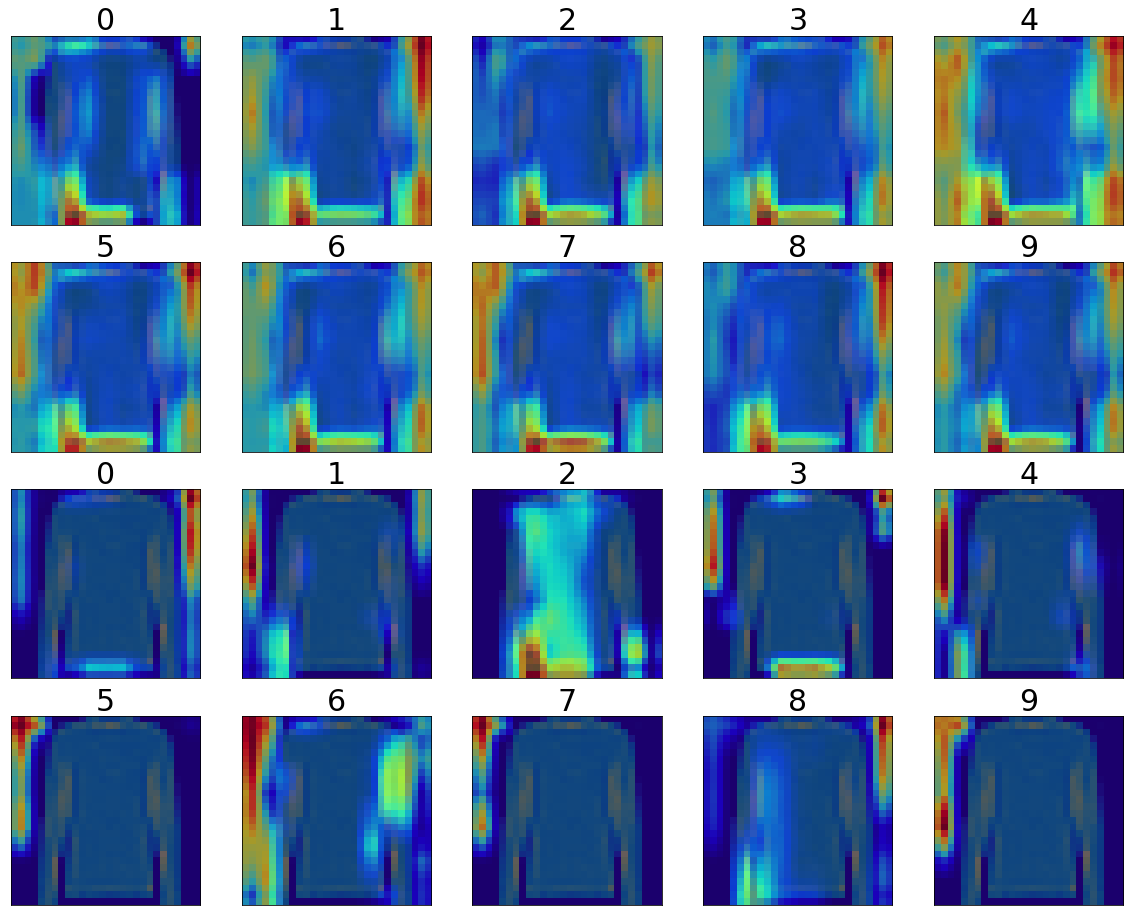

In [ ]:
numero = 2 # Numero que quieres que se represente
inicio = 1000
indice = buscar_num(numero,0,test_labels,inicio)[0]

fig, ax = plt.subplots(4, 5, clear=True, figsize=[20,16])
for j in range(5):
  titulo = j

  gradcam_htmap = grad_cam_plus(test_images[indice],model, 'conv2d_1',category_id=j)
  plot_heatmap(ax,0,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indice,:,:,0])
  gradcam_htmap, saliency_htmap = make_gradcam_heatmap_V2(np.expand_dims(test_images[indice],axis=0),model, 'conv2d_1', layer_names,top_pred_index=j)
  plot_heatmap(ax,2,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indice,:,:,0])

  titulo = j+5

  gradcam_htmap = grad_cam_plus(test_images[indice],model, 'conv2d_1', category_id=j+5)    
  plot_heatmap(ax,1,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indice,:,:,0])
  gradcam_htmap, saliency_htmap = make_gradcam_heatmap_V2(np.expand_dims(test_images[indice],axis=0),model, 'conv2d_1', layer_names,top_pred_index=j+5)
  plot_heatmap(ax,3,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indice,:,:,0])

## GradCAM++, numeros sin girar VS girados


In [ ]:
# Representamos en un grafico 4x5 los heatmaps de los numeros, arriba sin girar, abajo girados. 
# Representamos sobre la neurona de la clase predicha

# Numero que quieres que se represente y desde donde quieres que empiece a buscar ese numero
# Solo si los dos están a None se representan numeros del 0 al 9
num = 5
inicio = 0 # Hay que definir un inicio si o si cuando defines el numero

if inicio == None and num == None:
  indices = [545,5848,35,369,803,45,729,34,787,284] # Son los indices de los números (ordenados de 0 a 9)
elif num == None:
  indices = [inicio+i for i in range(0,10)]
else:
  indices = buscar_num(num,10,test_labels,inicio)

# Definimos una variable para controlar si queremos que los heatmaps salgan superpuestos o no
htmap_superpuestos = True
rescalar_img = False

# Se realiza la copia en cada iteracion ya que al encadenar giros se pierde informacion de la imagen
# De esta forma evitamos dicha perdida de informacion
angulo = -90
g_test_images = np.array(test_images, copy=True) # Hay que copiar test_images para no alterar el array original
girar_img(g_test_images, angulo) 

g_test_images = f_test_images

fig, ax = plt.subplots(4, 5, clear=True, figsize=[20,16])
fig.suptitle('Fashion_MNIST VS MNIST', fontsize=30)
for j in range(5):

  titulo = class_names[np.argmax(model.predict(np.expand_dims(test_images[indices[j]],axis=0)))]
  gradcam_htmap = grad_cam_plus(test_images[indices[j]],model, 'conv2d_1')
  plot_heatmap(ax,0,j,gradcam_htmap,rescalar_img,title=titulo, superimposed_img = htmap_superpuestos,imagen=test_images[indices[j],:,:,0])

  titulo = class_names[np.argmax(model.predict(np.expand_dims(g_test_images[indices[j]],axis=0)))]
  gradcam_htmap = grad_cam_plus(g_test_images[indices[j]],model, 'conv2d_1')
  plot_heatmap(ax,2,j,gradcam_htmap,rescalar_img ,title=titulo, superimposed_img = htmap_superpuestos,imagen=g_test_images[indices[j],:,:,0])

  titulo = class_names[np.argmax(model.predict(np.expand_dims(test_images[indices[j+5]],axis=0)))]
  gradcam_htmap = grad_cam_plus(test_images[indices[j+5]],model, 'conv2d_1')    
  plot_heatmap(ax,1,j,gradcam_htmap,rescalar_img ,title=titulo, superimposed_img = htmap_superpuestos,imagen=test_images[indices[j+5],:,:,0])

  titulo = class_names[np.argmax(model.predict(np.expand_dims(g_test_images[indices[j+5]],axis=0)))]
  gradcam_htmap = grad_cam_plus(g_test_images[indices[j+5]],model, 'conv2d_1')    
  plot_heatmap(ax,3,j,gradcam_htmap, rescalar_img,title=titulo, superimposed_img = htmap_superpuestos,imagen=g_test_images[indices[j+5],:,:,0])

# Pruebas de detector de deriva 

## Generar y visualizar heatmaps promedio de cada clase

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

def htmaps_promedio(num_instancias,pos_inicio_busqueda=0):
  '''
  Funcion que devuelve una lista con el heatmap promedio de 
  tantas instancias como le indiques de numeros del 0 al 9
  '''
  # Inicializar la lista donde almacenaremos los arrays
  lista_heatmaps = []

  # Iteramos para cada numero del 0 al 9
  for numero in range(10):

    # Buscamos los indices del numero correspondiente
    lista_indices = []
    lista_indices  = buscar_num(numero,num_instancias,test_labels,pos_inicio_busqueda)

    # Inicializar un array vacío para limpiar la suma del numero anterior
    htmap_suma = np.zeros((11,11),dtype='float32') 
    htmap_prom = np.zeros((11,11),dtype='float32')

    # Sumamos todos los heatmaps del numero pixel a pixel
    for indice in lista_indices:
      htmap = grad_cam_plus(test_images[indice],model,'conv2d_1',category_id=numero)

      #np.add(htmap_suma,np.square(htmap),out=htmap_suma)
      np.add(htmap_suma,htmap,out=htmap_suma)


    # Calculamos la media pixel a pixel y añadimos a la lista
    #htmap_prom = np.power(htmap_suma,1/num_instancias)
    htmap_prom = htmap_suma/num_instancias
    lista_heatmaps.append(htmap_prom)

  return  lista_heatmaps

In [ ]:
'''
Desacoplamos la creacion de la lista con los heatmaps promedio para mayor velocidad
'''
# Creamos una lista con los heatmaps promedio de cada numero
lista_heatmaps = htmaps_promedio(200,0)

In [ ]:
buscar_num(1,0,test_labels,0)

[2]

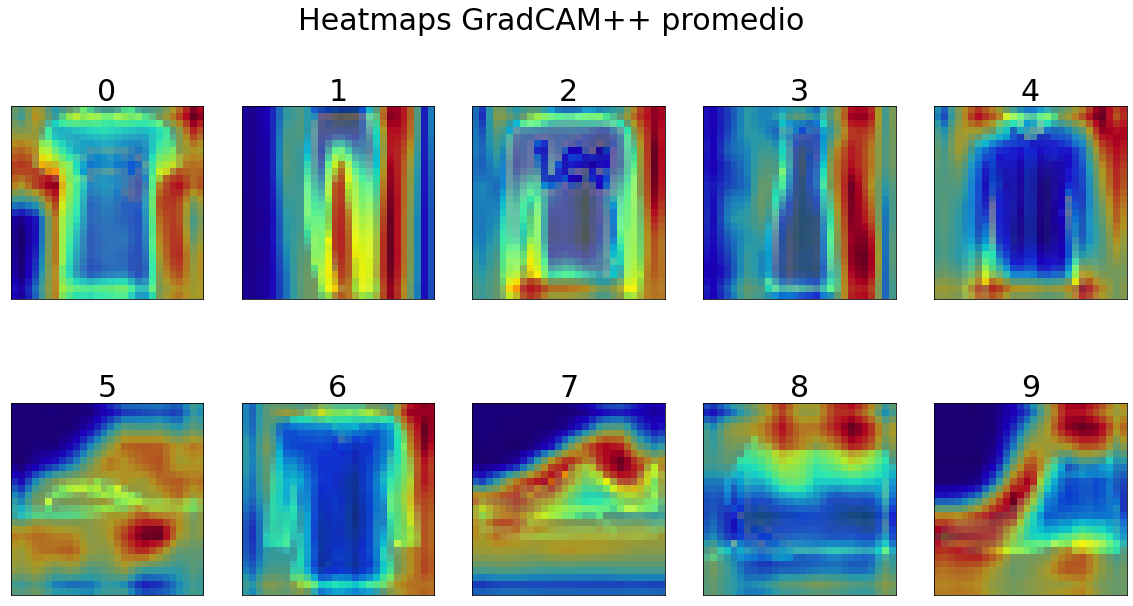

In [ ]:
# Funcion que generar los heatmaps promedio de cada clase y visualizarlos
# Definimos si queremos reescalar el heatmap o no y si queremos representar algun numero debajo o no
rescalar_img = True
htmap_superpuestos = True

for i in range(10):
  indices_0_9[i] = buscar_num(i,0,test_labels,0)[0]

# Representamos cada uno de los heatmaps en orden
fig, ax = plt.subplots(2, 5, clear=True, figsize=[20,10])
fig.suptitle('Heatmaps GradCAM++ promedio', fontsize=30)

for i in range(2):
  for j in range(5):  

    plot_heatmap(ax,i,j,lista_heatmaps[j+i*(5)],rescalar_img,title=np.argmax(test_labels[indices_0_9[j+i*(5)]]), superimposed_img = htmap_superpuestos,imagen=test_images[indices_0_9[j+i*5],:,:,0])


In [ ]:
for i in range(len(lista_heatmaps)):
  intersect = np.logical_and(lista_heatmaps[i],grad_cam_plus(test_images[indices_0_9[i]],model, 'conv2d_1'))
  union = np.logical_or(lista_heatmaps[i], grad_cam_plus(test_images[indices_0_9[i]],model, 'conv2d_1'))
  print(intersect.sum()/union.sum())

0.768595041322314
0.9491525423728814
0.768595041322314
0.8264462809917356
0.47107438016528924
0.45454545454545453
0.5371900826446281
0.7520661157024794
0.7851239669421488
0.6859504132231405


In [ ]:
type(indices_0_9[3])

int

In [ ]:
plt.imshow(test_images[indices_0_9[5],:,:,0])
print(np.argmax(test_labels[indices_0_9[3]]))

3


In [ ]:
for i in range(len(lista_heatmaps)):
  gcam = grad_cam_plus(test_images[indices_0_9[i]],model, 'conv2d_1')
  ssim_calc = ssim(lista_heatmaps[i],gcam,gaussian_weights=False)
  intersect = np.logical_and(lista_heatmaps[i],gcam)
  union = np.logical_or(lista_heatmaps[i], grad_cam_plus(test_images[indices_0_9[i]],model, 'conv2d_1'))
  print('Numero',i)
  print('IoU =\t' ,round(intersect.sum()/union.sum(),3))
  print('SSIM =\t',round(ssim_calc,3))
  print('-----------------')

Numero 0
IoU =	 0.785
SSIM =	 0.246
-----------------
Numero 1
IoU =	 0.992
SSIM =	 0.698
-----------------
Numero 2
IoU =	 0.992
SSIM =	 0.414
-----------------
Numero 3
IoU =	 1.0
SSIM =	 0.321
-----------------
Numero 4
IoU =	 1.0
SSIM =	 0.38
-----------------
Numero 5
IoU =	 1.0
SSIM =	 0.122
-----------------
Numero 6
IoU =	 0.967
SSIM =	 0.213
-----------------
Numero 7
IoU =	 1.0
SSIM =	 0.525
-----------------
Numero 8
IoU =	 1.0
SSIM =	 0.342
-----------------
Numero 9
IoU =	 1.0
SSIM =	 0.431
-----------------


In [ ]:
# Definimos si queremos reescalar el heatmap o no y si queremos representar algun numero debajo o no
rescalar_img = False
htmap_superpuestos = True
htmap_superpuestos2 = True

''' Parte copiada para representar numeros'''
# Numero que quieres que se represente y desde donde quieres que empiece a buscar ese numero
# Solo si los dos están a None se representan numeros del 0 al 9
num = None
inicio = None # Hay que definir un inicio si o si cuando defines el numero

if inicio == None and num == None:
  indices = indices_0_9 # Son los indices de los números (ordenados de 0 a 9)
elif num == None:
  indices = [inicio+i for i in range(0,10)]
else:
  indices = buscar_num(num,10,test_labels,inicio)

# Se realiza la copia en cada iteracion ya que al encadenar giros se pierde informacion de la imagen
# De esta forma evitamos dicha perdida de informacion
angulo = -0

g_test_images = np.array(test_images, copy=True) # Hay que copiar test_images para no alterar el array original
girar_img(g_test_images, angulo) 

# Representamos cada uno de los heatmaps en orden
fig, ax = plt.subplots(4, 5, clear=True, figsize=[20,16])
fig.suptitle('Heatmaps GradCAM++ promedio', fontsize=30)
for j in range(5):

  # Plot de los heatmaps media
  plot_heatmap(ax,0,j,lista_heatmaps[j],rescalar_img,title=np.argmax(test_labels[indices[j]]), superimposed_img = htmap_superpuestos,imagen=test_images[indices[j],:,:,0])
  plot_heatmap(ax,1,j,lista_heatmaps[j+5],rescalar_img,title=np.argmax(test_labels[indices[j+(5)]]), superimposed_img = htmap_superpuestos,imagen=test_images[indices[j+(5)],:,:,0])

  # Plot de heatmaps normales 

  gradcam_htmap = grad_cam_plus(f_test_images[indices[j]],model, 'conv2d_1')  
  pred_label = np.argmax(model.predict(np.expand_dims(g_test_images[indices[j]],axis=0))) # Etiqueta que predice el modelo
  ssim_row_2 = ssim(lista_heatmaps[pred_label],gradcam_htmap)  # SSIM entre el htmap medio y htmap obtenido para el numero actual
  mse_2 = mean_squared_error(lista_heatmaps[pred_label],gradcam_htmap)
  titulo = str(pred_label) + ' // {} // {}'.format(round(ssim_row_2,4),round(mse_2,4))
  #titulo = pred_label
  plot_heatmap(ax,2,j,gradcam_htmap,rescalar_img,title=titulo, superimposed_img = htmap_superpuestos2,imagen=f_test_images[indices[j],:,:,0])
  ax[2,j].set_title(titulo, fontsize=20) # Para reescalar el titulo y que podamos escribir mas

  gradcam_htmap = grad_cam_plus(f_test_images[indices[j+5]],model, 'conv2d_1')    
  pred_label = np.argmax(model.predict(np.expand_dims(g_test_images[indices[j+5]],axis=0))) 
  ssim_row_3 = ssim(lista_heatmaps[pred_label],gradcam_htmap)  
  mse_3 = mean_squared_error(lista_heatmaps[pred_label],gradcam_htmap)
  titulo = str(pred_label) + ' // {} // {}'.format(round(ssim_row_3,4),round(mse_3,4))
  #titulo = pred_label
  plot_heatmap(ax,3,j,gradcam_htmap, rescalar_img,title=titulo,superimposed_img = htmap_superpuestos2,imagen=f_test_images[indices[j+5],:,:,0])
  ax[3,j].set_title(titulo, fontsize=20) 

## Analisis estadistico de los heatmaps promedio frente a NO deriva y SI deriva

In [ ]:
import pandas as pd
import seaborn as sb
def lista_ssim_mse_clase(lista_heatmaps_prom, imagenes, labels, usar_true_labels=False,gaus=False):
  '''
  Funcion que devuelve una lista con el ssim, el mse y la clase de cada una de las imagenes
  del vector de imagenes que pases, comparandolo contra la lista de htmaps del 0 al 9 proporcionada
  '''
  lista_ssim = []
  lista_mse = []
  lista_labels_true = []
  lista_labels_pred = []
  preds = model.predict(imagenes)

  if labels is not None:
    for i in range(len(labels)):
      lista_labels_true.append(np.argmax(labels[i]))
      lista_labels_pred.append(np.argmax(preds[i]))

  for i,imagen in enumerate(imagenes):

    # Calculo el htmap
    heatmap = grad_cam_plus(imagen, model,'conv2d_1',category_id=lista_labels_pred[i])
    
    # Comparo htmap con los promedios para su clase y los guardo directamente en la lista
    if usar_true_labels == False:
      lista_ssim.append(ssim(lista_heatmaps_prom[lista_labels_pred[i]], heatmap,gaussian_weights=gaus))
      lista_mse.append(mean_squared_error(lista_heatmaps_prom[lista_labels_pred[i]], heatmap))
    
    if usar_true_labels == True:
      lista_ssim.append(ssim(lista_heatmaps_prom[lista_labels_true[i]], heatmap,gaussian_weights=gaus))
      lista_mse.append(mean_squared_error(lista_heatmaps_prom[lista_labels_true[i]], heatmap))

  # Junto las tres listas en una sola
  lista_total = [lista_ssim, lista_mse, lista_labels_true,lista_labels_pred]

  return lista_total

In [ ]:
# Crea una lista donde se compara el heatmap de una instancia contra el heatmap promedio de la clase predicha

lista_comparacion = lista_ssim_mse_clase(lista_heatmaps,test_images,test_labels,usar_true_labels=True,gaus=False)
array_comparacion = np.asarray(lista_comparacion)
df_comp = pd.DataFrame(np.transpose(array_comparacion),columns=['SSIM','MSE','Clase','Clase_pred'])
plt.scatter(df_comp.loc[df_comp['Clase']==1]['SSIM'],df_comp.loc[df_comp['Clase']==1]['MSE'])

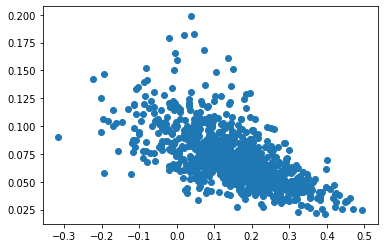

In [ ]:
# Crea una lista donde se compara el heatmap de una instancia contra el heatmap promedio de la clase predicha para instancias con giro

g_test_images = np.copy(test_images)
girar_img(g_test_images,-90)

l_comp_girado = lista_ssim_mse_clase(lista_heatmaps_prom,g_test_images,test_labels, usar_true_labels=False,gaus=False)
array_comp_gir = np.asarray(l_comp_girado)
df_comp_gir = pd.DataFrame(np.transpose(array_comp_gir),columns=['SSIM','MSE','Clase','Clase_pred'])
plt.scatter(df_comp_gir.loc[df_comp_gir['Clase']==1]['SSIM'],df_comp_gir.loc[df_comp_gir['Clase']==1]['MSE'])

In [ ]:
plt.scatter(df_comp.loc[df_comp['Clase']==1]['SSIM'],df_comp.loc[df_comp['Clase']==1]['MSE'])
plt.scatter(df_comp_gir.loc[df_comp['Clase']==1]['SSIM'],df_comp_gir.loc[df_comp['Clase']==1]['MSE'])
plt.show()

In [ ]:
df_comp_gir['Clase_pred'].value_counts()[2]

48

In [ ]:
df_comp_exp = df_comp.copy()
df_comp_gir_exp = df_comp_gir.copy()
#df_comp_exp['Deriva'] = np.full((10000), False, dtype=bool)
#df_comp_gir_exp['Deriva'] = np.full((10000), True, dtype=bool)
#df_comp_exp['Deriva'] = np.full((10000),0,dtype=int)
#df_comp_gir_exp['Deriva'] = np.full((10000),1,dtype=int)

df_comp_exp['Deriva'] = 'Falso'
df_comp_gir_exp['Deriva'] = 'Verdadero'

df_concatenado = pd.concat([df_comp_exp,df_comp_gir_exp])

In [ ]:
b = df_comp['Clase_pred'].loc[df_comp_gir_exp['Clase_pred']==1].count()

In [ ]:
# Pairplot para representar los histogramas y las relaciones entre SSIM y MSE 
a = sb.pairplot(df_concatenado.loc[df_concatenado['Clase_pred']==1,['SSIM','MSE','Deriva']],hue='Deriva')
plt.text(0.23,30,'Num instancias\n con deriva:\n{}'.format(a),fontsize=12,size=10,ha="center", va="center",bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

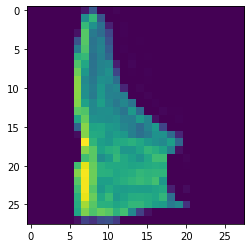

In [ ]:
plt.imshow(g_test_images[0,:,:,0])

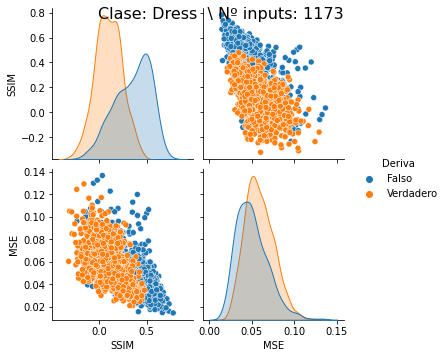

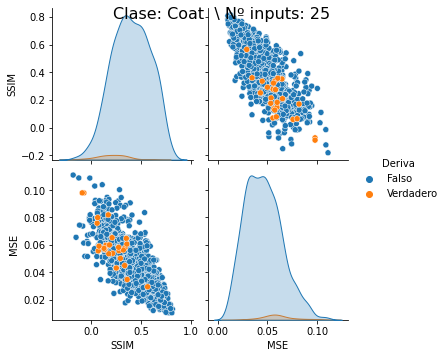

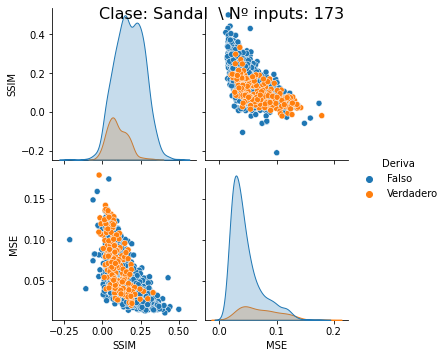

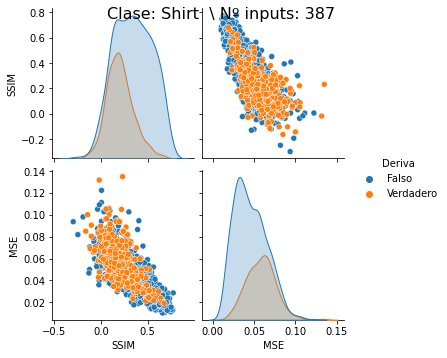

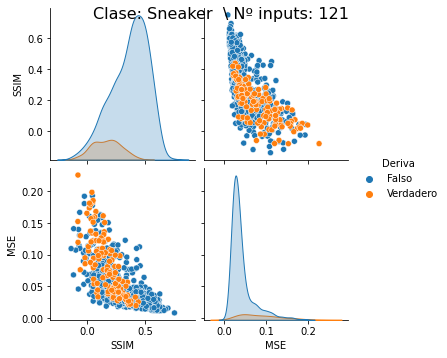

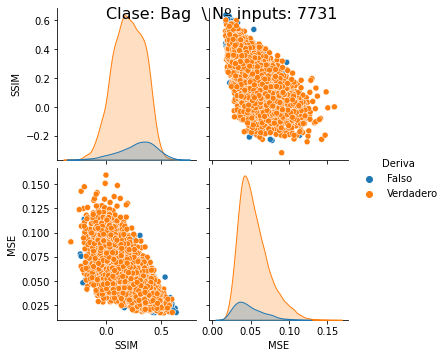

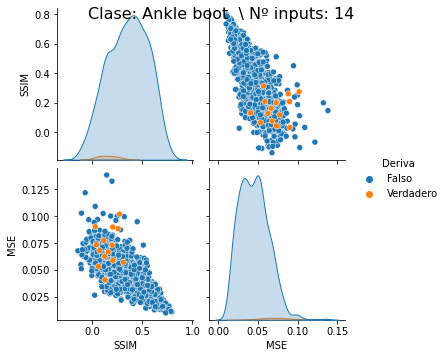

In [ ]:
# Generar las imagenes de las figuras
for i in range(10):
  a = sb.pairplot(df_concatenado.loc[df_concatenado['Clase_pred']==i,['SSIM','MSE','Deriva']],hue='Deriva')
  a.axes[0,0].get_figure().suptitle('Clase: {}  \\ Nº inputs: {}'.format(class_names[i],df_comp_gir['Clase_pred'].value_counts()[i]), fontsize=16)
  plt.savefig('./grafico{}'.format(i),dpi=200)

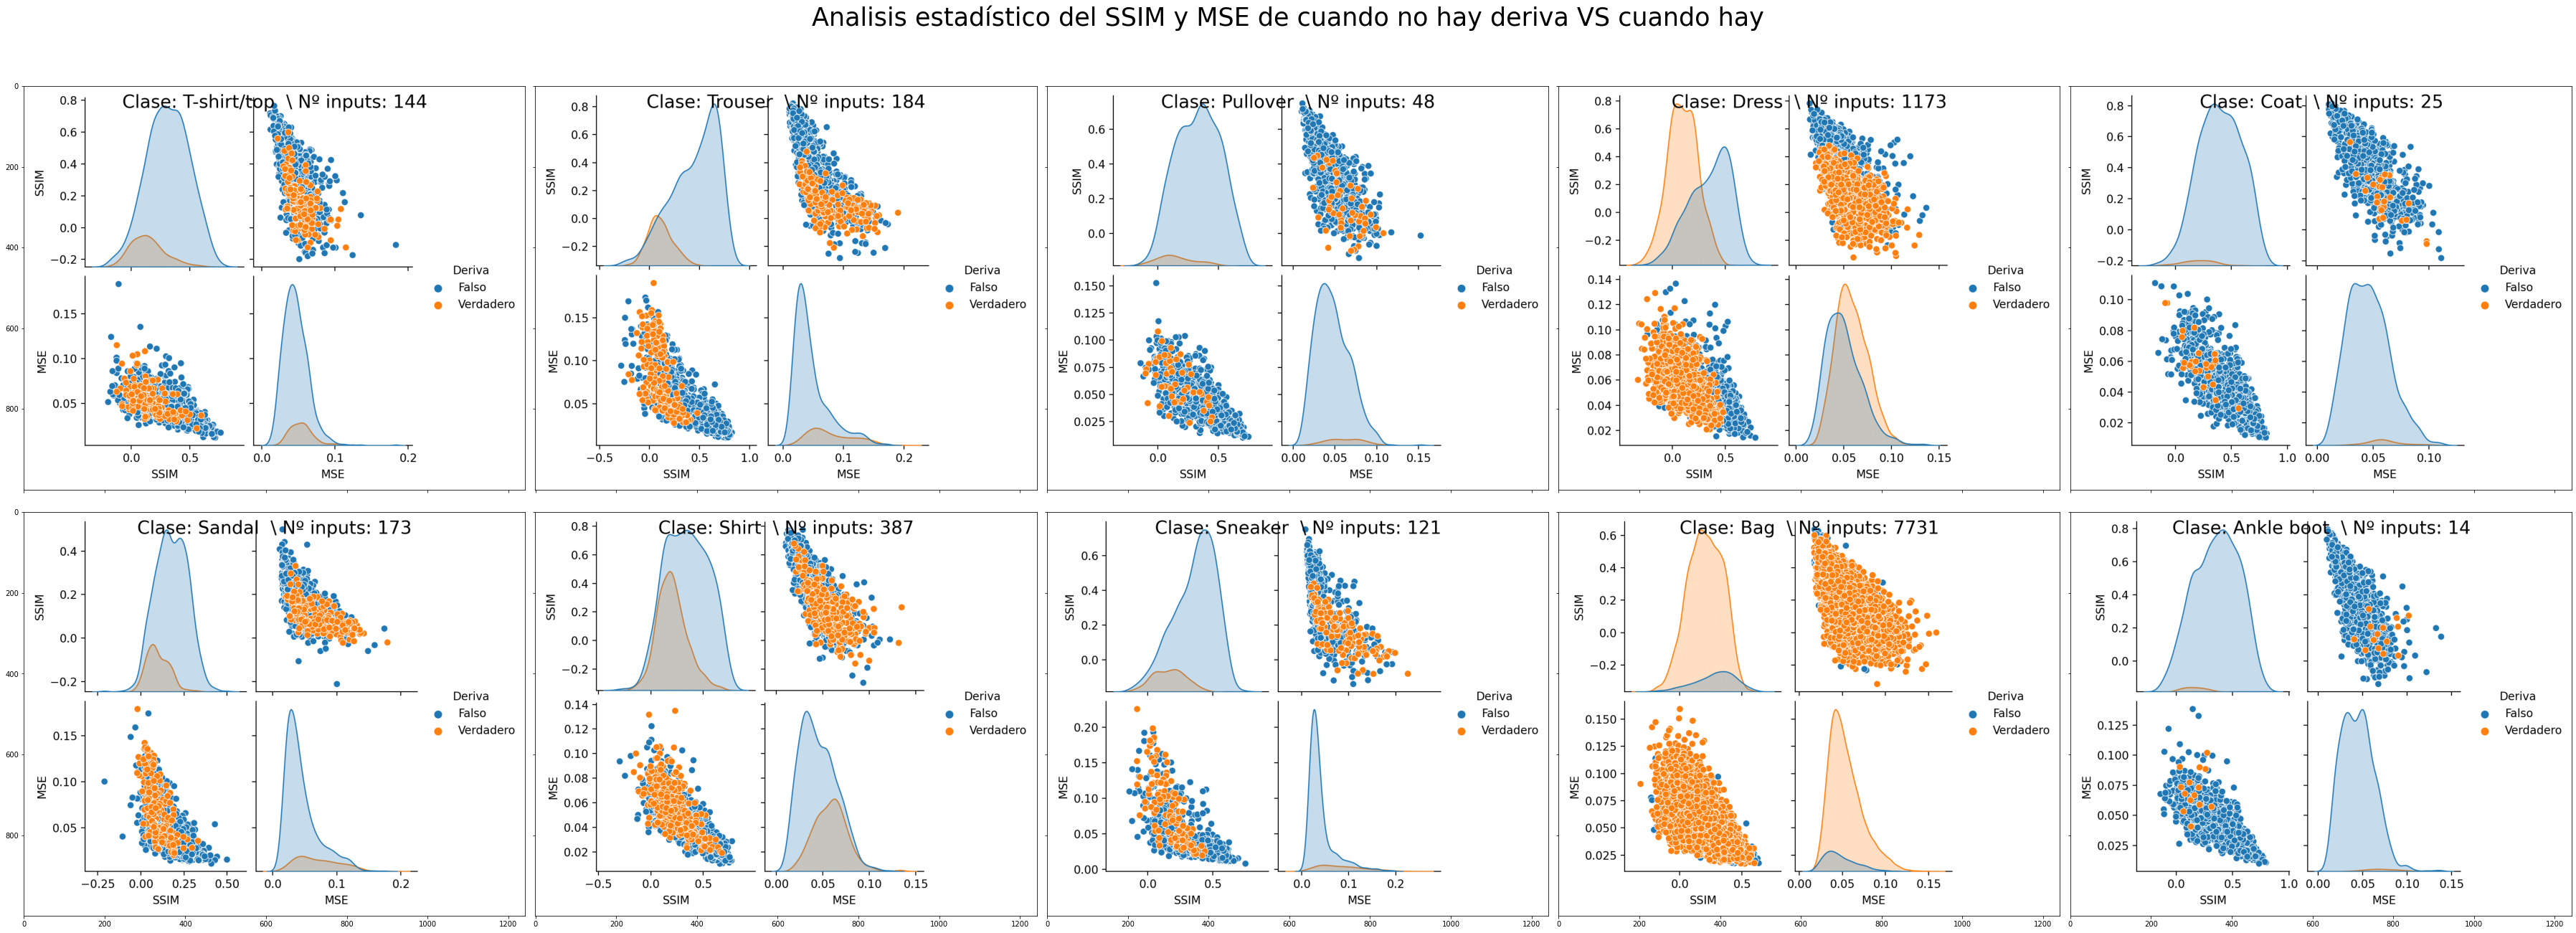

In [ ]:
from skimage import io
fig, axs = plt.subplots(2,5,sharex=True,sharey=True,figsize=(50,20),tight_layout=True)
fig.suptitle('Analisis estadístico del SSIM y MSE de cuando no hay deriva VS cuando hay', fontsize=35)
for i in range(2):
  for j in range(5):
    image=io.imread("./grafico{}.png".format(j+5*i))/255.0
    axs[i,j].imshow(image,vmin=0,vmax=1)
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/graficoSSIM_MSE_NoDeriva_VS_Deriva'.format(i),dpi=200)

## Pruebas de fitting a histograma

In [ ]:
import scipy.stats as stats
params = stats.norm.fit(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])

In [ ]:
params

(0.46745443507057577, 0.20864193135150919)

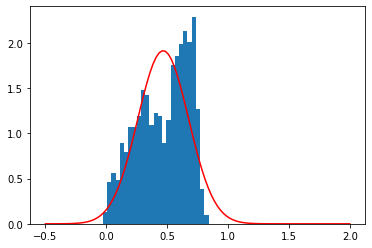

In [ ]:
x = np.linspace(-0.5,2,100)

fitted_data = stats.distributions.norm.pdf(x, params[0], params[1])
plt.hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==1], density=True,bins=25)
plt.plot(x,fitted_data,'r-')

In [ ]:
hist = np.histogram(df_comp['SSIM'].loc[df_comp['Clase_pred']==1],bins=25)

In [ ]:
hist_dist = stats.rv_histogram(hist)

In [ ]:
hist_dist.stats()

(array(0.70327075), array(0.03950427))

In [ ]:
dist = getattr(stats, 'norm')
parameters = dist.fit(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])
print(parameters)
stats.kstest(df_comp['SSIM'].loc[df_comp['Clase_pred']==1], "norm", parameters)

(0.4721525436652372, 0.24363244597230266)


KstestResult(statistic=0.09110747920655438, pvalue=1.1010579655205149e-08)

In [ ]:
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']
#%%capture --no-stdout
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])
    a = stats.kstest(df_comp['SSIM'].loc[df_comp['Clase_pred']==1], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

In [ ]:
params = stats.weibull_max.fit(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])
params

(1.9006221965239138, 0.9146176020764787, 0.499551611424943)

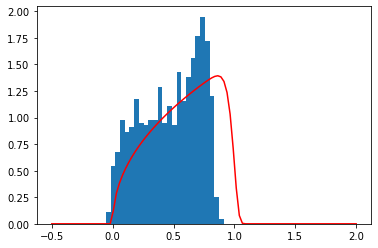

In [ ]:
x = np.linspace(-0.5,2,100)

params = stats.weibull_max.fit(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])

fitted_data = stats.distributions.gengamma.pdf(x, params[0], params[1])
plt.hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==1], density=True,bins=25)
plt.plot(x,fitted_data,'r-')

In [ ]:
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

In [ ]:
a = np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])
a = np.expand_dims(a,axis=1)
a.shape

(1140, 1)

In [ ]:
from sklearn.neighbors import KernelDensity
import numpy as np
a = np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])
a = np.expand_dims(a,axis=1)
a.shape
x = np.linspace(-0.5,2,1000)[:,np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(a)
log_dens = kde.score_samples(x)

(array([0.11330151, 0.54384723, 0.67980903, 0.97439295, 0.86109144,
        0.90641204, 1.17833566, 0.95173264, 0.92907234, 0.97439295,
        0.97439295, 1.29163716, 0.95173264, 1.11035475, 0.92907234,
        1.42759897, 1.15567535, 1.38227836, 1.56356077, 1.76750348,
        1.94878589, 1.72218288, 1.20099596, 0.24926331, 0.0453206 ]),
 array([-0.05599908, -0.01728852,  0.02142204,  0.0601326 ,  0.09884317,
         0.13755373,  0.17626429,  0.21497485,  0.25368541,  0.29239597,
         0.33110654,  0.3698171 ,  0.40852766,  0.44723822,  0.48594878,
         0.52465934,  0.56336991,  0.60208047,  0.64079103,  0.67950159,
         0.71821215,  0.75692271,  0.79563328,  0.83434384,  0.8730544 ,
         0.91176496]),
 <a list of 25 Patch objects>)

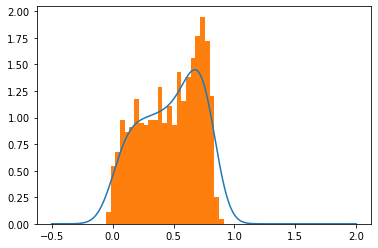

In [ ]:
plt.plot(x[:, 0], np.exp(log_dens), linestyle='-')
plt.hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==1], density=True,bins=25)

In [ ]:
kde.

-11911.754255499643

In [ ]:
import statsmodels.api as sm
from statsmodels.distributions.mixture_rvs import mixture_rvs

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
datos = np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])
kde = sm.nonparametric.KDEUnivariate(datos)
kde.fit() # Estimate the densities

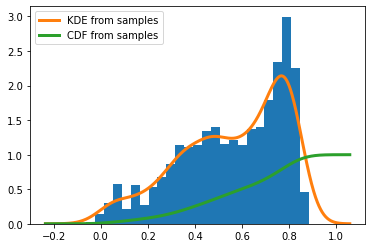

In [ ]:
plt.hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==1], density=True,bins=25)
plt.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)
plt.plot(kde.support, kde.cdf, lw=3, label='CDF from samples', zorder=10)
plt.legend()

In [ ]:
kde.support[600]

0.1439802265270187

In [ ]:
kde.cdf[600]

0.05778623105056442

In [ ]:
import scipy.stats
import numpy as np
hist = np.histogram(datos, bins=15)
hist_dist = scipy.stats.rv_histogram(hist)

NameError: ignored

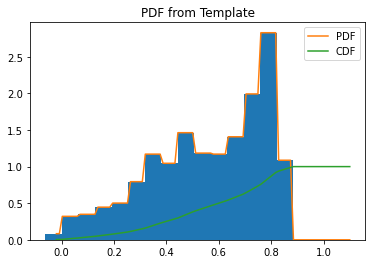

In [ ]:
X = np.linspace(-0.02, 1.1, 100)
plt.title("PDF from Template")
plt.hist(datos, density=True, bins=15)
plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.plot(X, hist_dist.cdf(X), label='CDF')
plt.legend()
plt.show()

## Elección final de fitting: KDE (scikit-learn,scipy, statsmodel)

### KDE con Scikit-learn

El problema que tiene es la falta de una forma de estimar el bandwith que sea consistente, al menos no he conseguido una

In [ ]:
from sklearn.neighbors import KernelDensity
import numpy as np
data = np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])
data = np.expand_dims(data,axis=1)
data.shape
x = np.linspace(-0.5,2,1000)[:,np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(data)
log_dens = kde.score_samples(x)

(array([0.12706136, 0.45742091, 0.55907   , 0.48283318, 0.88942954,
        0.78778045, 1.06731545, 1.06731545, 1.19437681, 1.47391181,
        1.42308726, 1.09272772, 1.21978908, 1.19437681, 0.88942954,
        1.14355226, 1.7534468 , 1.85509589, 1.98215726, 2.13463089,
        2.00756953, 2.28710453, 1.27061363, 0.38118409, 0.10164909]),
 array([-0.02655832,  0.00811222,  0.04278276,  0.07745331,  0.11212385,
         0.14679439,  0.18146493,  0.21613548,  0.25080602,  0.28547656,
         0.3201471 ,  0.35481764,  0.38948819,  0.42415873,  0.45882927,
         0.49349981,  0.52817036,  0.5628409 ,  0.59751144,  0.63218198,
         0.66685252,  0.70152307,  0.73619361,  0.77086415,  0.80553469,
         0.84020524]),
 <a list of 25 Patch objects>)

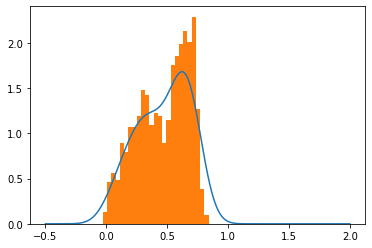

In [ ]:
plt.plot(x[:, 0], np.exp(log_dens), linestyle='-')
plt.hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==1], density=True,bins=25)

In [ ]:
# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.linspace(0.001, 1, 50)} # Opcion 1
params = {'bandwidth': np.logspace(-5, 1, 30)} #Opcion 2

grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

GridSearchCV(cv=None, error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([1.00000000e-05, 1.61026203e-05, 2.59294380e-05, 4.17531894e-05,
       6.72335754e-05, 1.08263673e-04, 1.743...
       3.03919538e-03, 4.89390092e-03, 7.88046282e-03, 1.26896100e-02,
       2.04335972e-02, 3.29034456e-02, 5.29831691e-02, 8.53167852e-02,
       1.37382380e-01, 2.21221629e-01, 3.56224789e-01, 5.73615251e-01,
       9.23670857e-01, 1.48735211e+00, 2.39502662e+00, 3.85662042e+00,
       6.21016942e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
kde_best = grid.best_estimator_

best bandwidth: 0.020433597178569417


In [ ]:
kde_best.fit(data)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.020433597178569417,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

(array([0.12706136, 0.45742091, 0.55907   , 0.48283318, 0.88942954,
        0.78778045, 1.06731545, 1.06731545, 1.19437681, 1.47391181,
        1.42308726, 1.09272772, 1.21978908, 1.19437681, 0.88942954,
        1.14355226, 1.7534468 , 1.85509589, 1.98215726, 2.13463089,
        2.00756953, 2.28710453, 1.27061363, 0.38118409, 0.10164909]),
 array([-0.02655832,  0.00811222,  0.04278276,  0.07745331,  0.11212385,
         0.14679439,  0.18146493,  0.21613548,  0.25080602,  0.28547656,
         0.3201471 ,  0.35481764,  0.38948819,  0.42415873,  0.45882927,
         0.49349981,  0.52817036,  0.5628409 ,  0.59751144,  0.63218198,
         0.66685252,  0.70152307,  0.73619361,  0.77086415,  0.80553469,
         0.84020524]),
 <a list of 25 Patch objects>)

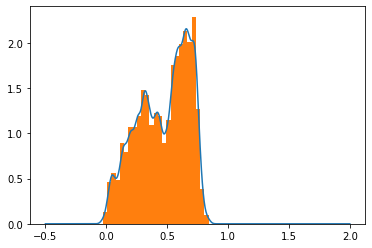

In [ ]:
log_dens = kde_best.score_samples(x)
plt.plot(x[:, 0], np.exp(log_dens), linestyle='-')
plt.hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==1], density=True,bins=25)

### KDE con Statsmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
datos = np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])
kde = sm.nonparametric.KDEUnivariate(datos)
kde.fit() # Estimate the densities

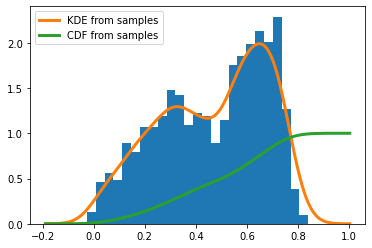

In [ ]:
plt.hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==1], density=True,bins=25)
plt.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)
plt.plot(kde.support, kde.cdf, lw=3, label='CDF from samples', zorder=10)
plt.legend()

### KDE con Scipy

In [ ]:
import scipy.stats as stats
datos = np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==4])
kde_sci = stats.gaussian_kde(datos) # Automaticamente calcula el bandwith

NameError: ignored

In [ ]:
x = np.linspace(-0.2,1,1000)
cdf = []
for i in x:
  cdf.append(kde_sci.integrate_box_1d(0,i))

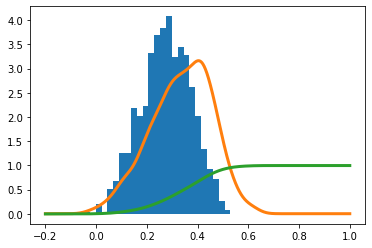

In [ ]:
plt.hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==2], density=True,bins=25)
plt.plot(x, kde_sci.pdf(x), lw=3, label='KDE from samples', zorder=10)
plt.plot(x, cdf, lw=3, label='CDF from samples', zorder=10)

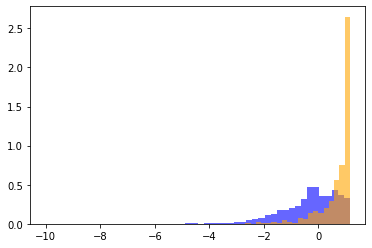

1.701059899472583

In [ ]:
plt.hist(kde_sci.logpdf(np.array(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==4])),bins=50,color='blue',alpha=0.6,density=True)
plt.hist(kde_sci.logpdf(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==4])),bins=20,color='orange',alpha=0.6,density=True)
plt.show()
kde_sci.pdf(np.array(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==1])).mean()
kde_sci.pdf(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])).mean()


1.701059899472583

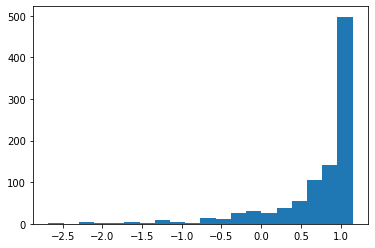

In [ ]:
plt.hist(kde_sci.logpdf(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==4])),bins=20)
kde_sci.pdf(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==1])).mean()

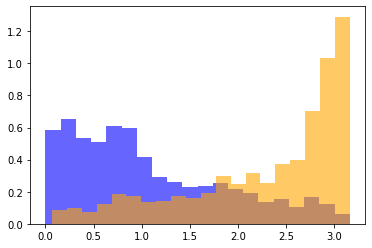

In [ ]:
plt.hist(kde_sci.pdf(np.array(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==4])),bins=20,color='blue',alpha=0.6,density=True)
plt.hist(kde_sci.pdf(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==4])),bins=20,color='orange',alpha=0.6,density=True)
plt.show()

In [ ]:
pd.DataFrame(kde_sci.logpdf(np.array(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==4]))).describe()

0
count  3588.000000
mean     -0.355391
std       1.161517
min     -10.011016
25%      -0.882675
50%      -0.159009
75%       0.488775
max       1.151565

In [ ]:
pd.DataFrame(kde_sci.logpdf(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==4]))).describe(percentiles=[0.1])

0
count  981.000000
mean     0.714953
std      0.593730
min     -2.680454
10%     -0.102566
50%      0.964414
max      1.151576

In [ ]:
serie_g = pd.Series(kde_sci.logpdf(np.array(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==4]))).sort_values(ascending=False,ignore_index=True)
serie_g
serie_g[int(len(serie_g)*0.35)]

0.19602605840676596

In [ ]:
serie = pd.Series(kde_sci.logpdf(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==4]))).sort_values(ascending=False,ignore_index=True)
serie
serie[int(len(serie)*0.80)]

0.45953849405896474

In [ ]:
type(serie_g)

pandas.core.series.Series

In [ ]:
np.array(lista_porcentajes_x_clase)[:,1]

array([0.17622763, 0.17622763, 0.96602659, 0.78125   , 0.72169211,
       0.62361111, 0.37209302, 0.81681682, 0.88967972, 0.03317536])

In [ ]:
df_train_ssim_clase

SSIM       MSE  Clase  Clase_pred
0     0.391317  0.038694    7.0         7.0
1     0.305392  0.030716    2.0         2.0
2     0.706434  0.028598    1.0         1.0
3     0.485889  0.035644    0.0         0.0
4     0.374499  0.039472    4.0         4.0
...        ...       ...    ...         ...
9995  0.328545  0.032762    2.0         2.0
9996  0.324348  0.021671    3.0         3.0
9997  0.446967  0.025093    4.0         4.0
9998  0.216282  0.045725    5.0         5.0
9999  0.353502  0.049137    6.0         6.0

[10000 rows x 4 columns]

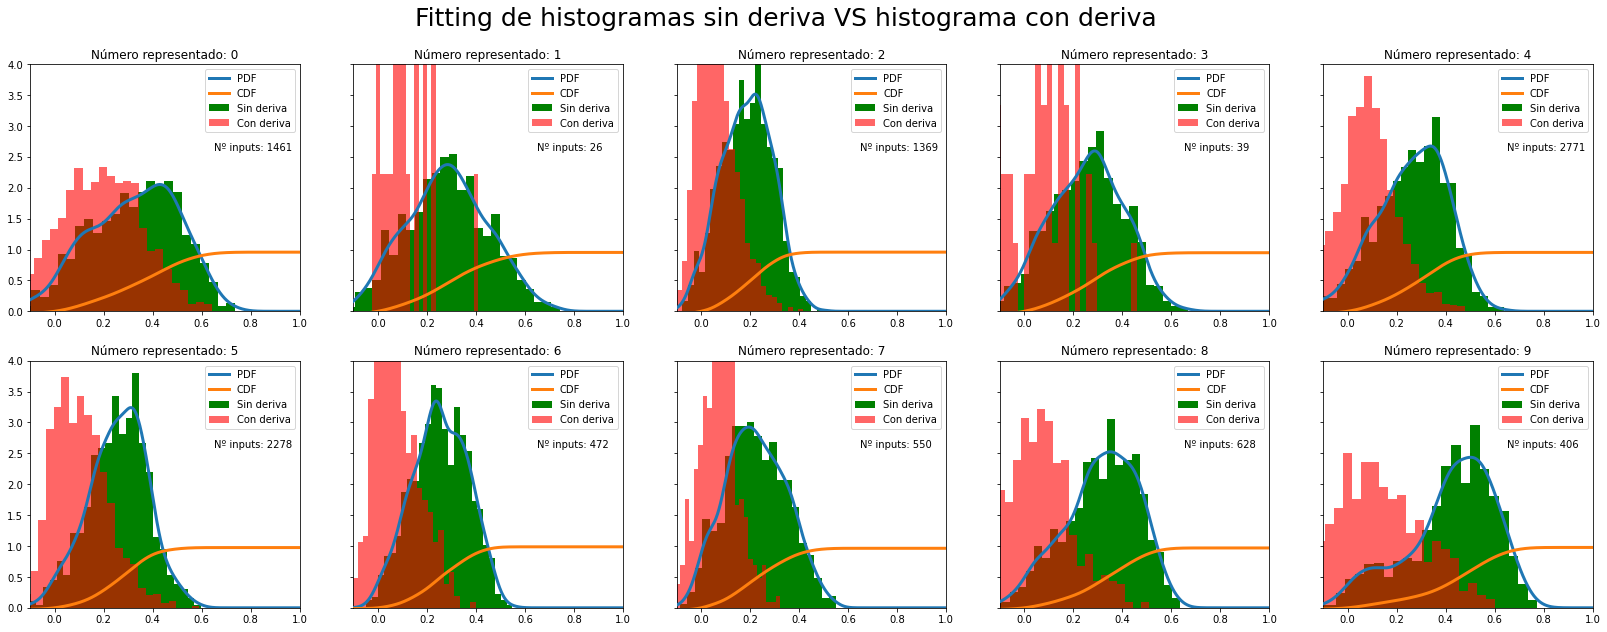

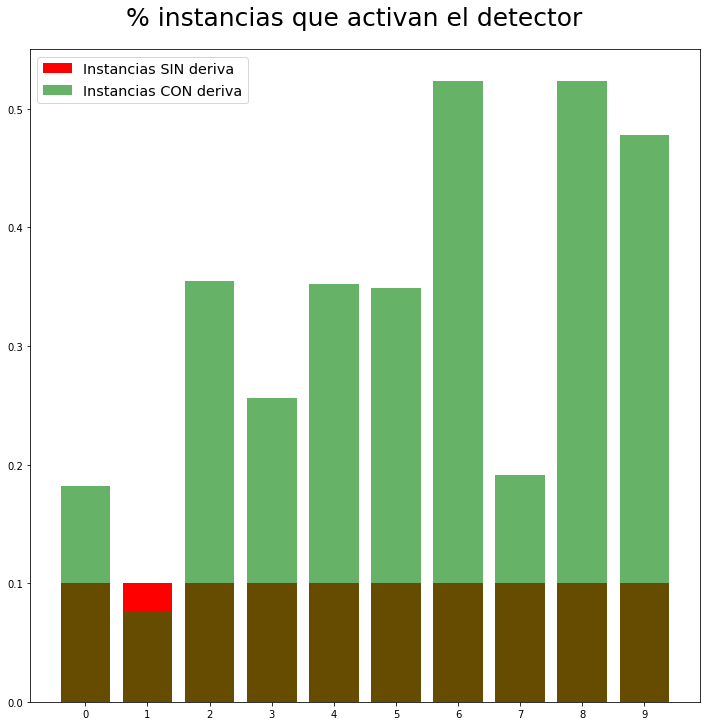

4.0    2771
5.0    2278
0.0    1461
2.0    1369
8.0     628
7.0     550
6.0     472
9.0     406
3.0      39
1.0      26
Name: Clase_pred, dtype: int64


In [ ]:
# Funcion que representa el % de instancias que SI activan el threshold tanto CON como SIN deriva

percent = 0.90
lista_porcentajes_x_clase = []
x = np.linspace(-0.2,1,1000)

fig, ax = plt.subplots(2,5,sharey=True,figsize=(28,10))
fig.suptitle('Fitting de histogramas sin deriva VS histograma con deriva', fontsize=25,y=0.96)

for num in range(10):

  # KDE fitting
  kde_sci = stats.gaussian_kde(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==num]))
  cdf = []
  for i in x:
    cdf.append(kde_sci.integrate_box_1d(0,i))

  # Calculo del threshold
  serie = pd.Series(kde_sci.logpdf(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==num]))).sort_values(ascending=False,ignore_index=True)
  threshold = serie[int(len(serie)*percent)]

  # Calculo del porcentaje de instancias con deriva que no activan
  serie_g = pd.Series(kde_sci.logpdf(np.array(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==num]))).sort_values(ascending=False,ignore_index=True)
  for i,logpdf in enumerate(serie_g):
    if logpdf < threshold:
      percent_no_activ_g = i/len(serie_g)
      break    

  lista_porcentajes_x_clase.append([1-percent,1-percent_no_activ_g])
  '''
  # Prints 
  print('----------------------------------------------------------------------')
  print('Numero:',num)
  print('Porcentaje de instancias SIN deriva que SI activan el threshold (minimizar):',round(1-percent,2))
  print('Porcentaje de instancias CON deriva que SI activan el threshold (maximizar):',round(1-percent_no_activ_g,3))
  print('----------------------------------------------------------------------\n')
  '''
  i=0
  j=num
  if num >= 5:
    i = 1
    j = num-5

  # Plots de KDE
  ax[i,j].set_xlim((-0.1,1))
  ax[i,j].set_ylim((0,4))
  ax[i,j].hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==num], density=True,bins=25,color='green',label='Sin deriva')
  ax[i,j].hist(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==num], density=True,bins=25,color='red',alpha=0.6,label='Con deriva')
  ax[i,j].plot(x, kde_sci.pdf(x), lw=3, label='PDF', zorder=10)
  ax[i,j].plot(x, cdf, lw=3, label='CDF', zorder=10)
  ax[i,j].set_title('Número representado: {}'.format(num),fontsize=12)
  ax[i,j].text(0.65,2.6,'Nº inputs: {}'.format(df_comp_gir['Clase_pred'].value_counts()[num]))
  ax[i,j].legend()

fig.savefig('./graficoFitting_hist_Sin_VS_Con_deriva',dpi=200)

# Plot de % detectados
array_porcentajes = np.array(lista_porcentajes_x_clase)
fig = plt.figure(figsize=(12,12))
plt.bar(np.linspace(0,9,10),array_porcentajes[:,0], color='red')
plt.bar(np.linspace(0,9,10),array_porcentajes[:,1], color='green',alpha=0.6)
fig.suptitle('% instancias que activan el detector',fontsize=25,y=0.93)
plt.legend(['Instancias SIN deriva','Instancias CON deriva'],fontsize='x-large')
plt.xticks(np.linspace(0,9,10))
fig.savefig('./graficoPorcentaje_activan_detector_Sin_VS_Con_deriva',dpi=200)
plt.show()

print(df_comp_gir['Clase_pred'].value_counts())


# Plots comparacion deriva con no deriva


Carga de MNIST


In [ ]:
fashion_mnist = keras.datasets.mnist

(f_train_images, f_train_labels), (f_test_images, f_test_labels) = fashion_mnist.load_data()

#Reducimos el rango de los valores a entre 0 y 1
f_train_images = f_train_images/255
f_test_images = f_test_images/255

#Añadimos la informacion de que se trata de un solo canal (y no 3 como en el caso de RGB)
f_train_images = f_train_images.reshape(60000,28,28,1)
f_train_images = f_train_images.astype('float32')

f_test_images = f_test_images.reshape(10000,28,28,1)
f_test_images = f_test_images.astype('float32')

# One hot encoding
f_train_labels = to_categorical(f_train_labels)
f_test_labels = to_categorical(f_test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Para poder plotear el de entrenamiento VS el de deriva

# Data Augmentation
inicio_mod = 0
fin_mod    = 10000
data_augmentation   = DataAugmentations(test_images,test_labels)
tipo_augmentation = 'mnist'

if tipo_augmentation == 'traslacion':
  horizontal  = [2,2]
  vertical    = [1,1]
  mod_img, mod_labels = data_augmentation.traslation(rango_horiz=horizontal,rango_vert=vertical,slicing=[inicio_mod,fin_mod])

if tipo_augmentation == 'rotacion_escalado':
  angulo = -20
  centro =  None  # Si dejamos None, se pone el centro de la imagen como centro de rotacion
  escala = 1      # A mayor escala, más grande se ve el número
  mod_img, mod_labels = data_augmentation.rotation_and_scale(angulo,escala,centro,slicing=[inicio_mod,fin_mod])

if tipo_augmentation == 'engorde':
  engorde = 1000 # Valores de [0.008,0.005] lo hacen fino, valores por encima de 10 gordo
  mod_img, mod_labels = data_augmentation.engordar(engorde,slicing=[inicio_mod,fin_mod])

if tipo_augmentation == 'perspectiva':
  matriz_afin = warp_mat
  encoger     = False
  expandir    = False
  mod_img, mod_labels = (test_images, test_labels)

if tipo_augmentation == 'mnist':
  mod_img, mod_labels = (f_test_images, f_test_labels)

lista,array, df_deriva = lista_ssim_mse_clase_detector(lista_heatmaps_prom,mod_img,mod_labels,usar_true_labels=False)

In [ ]:
# Para que funcione el codigo de debajo
df_comp        = df_train_ssim_clase
df_comp_gir    = df_deriva

In [ ]:
df_comp_gir['Clase_pred'].value_counts()

5.0    5522
8.0    2675
1.0     790
7.0     360
0.0     304
3.0     293
4.0      34
9.0      21
6.0       1
Name: Clase_pred, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


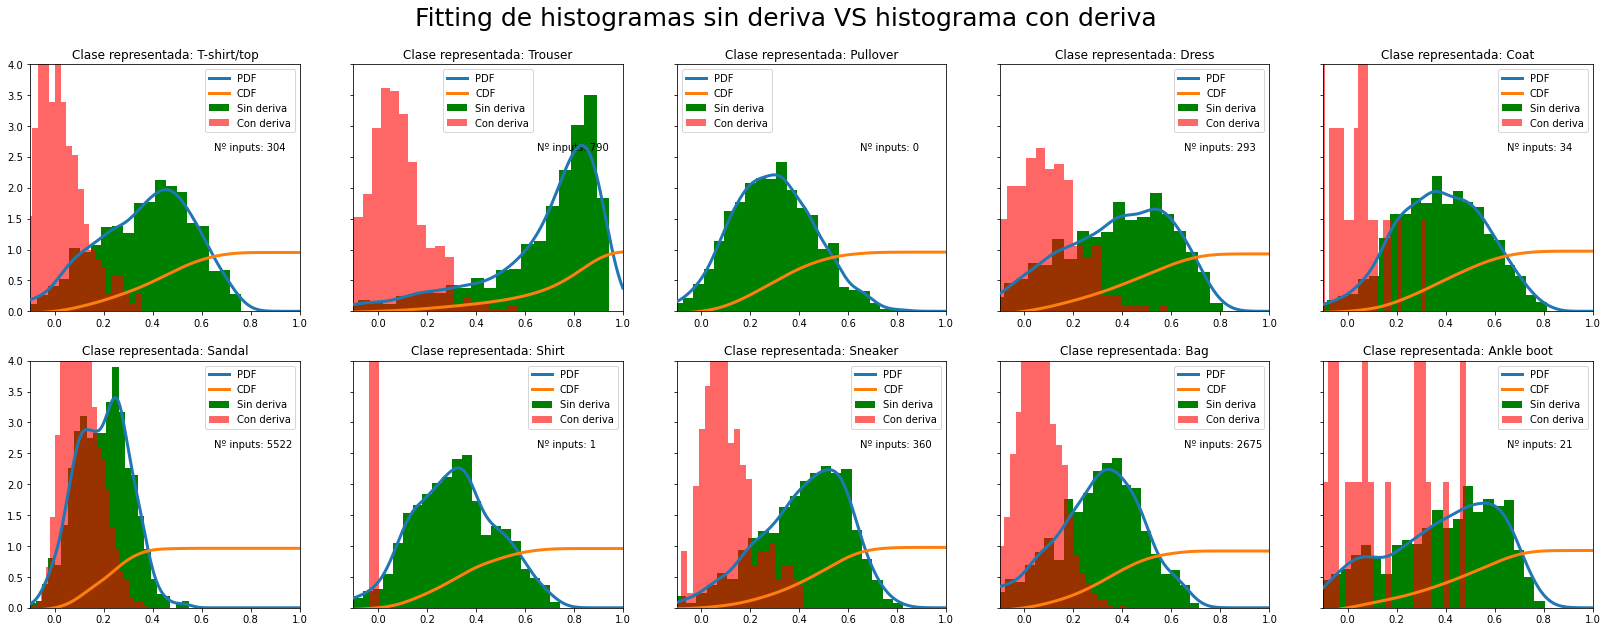

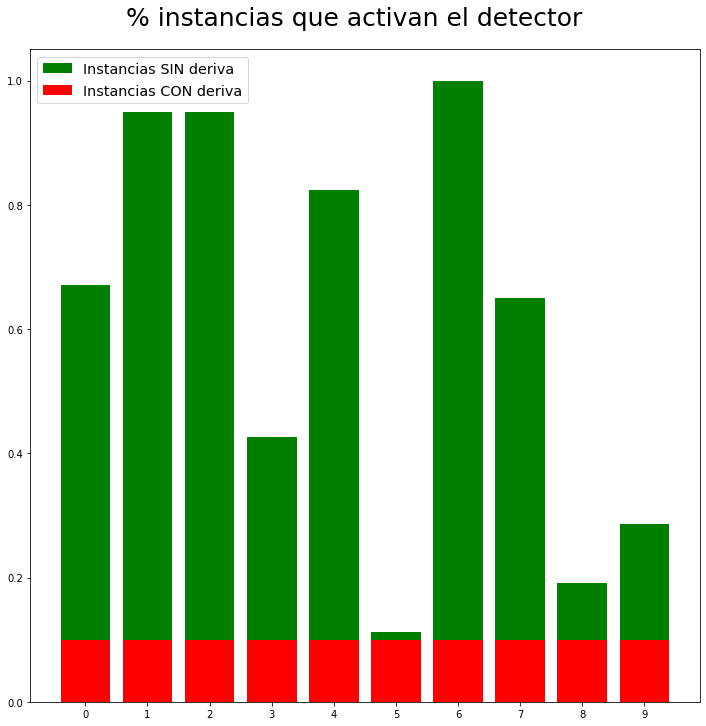

5.0    5522
8.0    2675
1.0     790
7.0     360
0.0     304
3.0     293
4.0      34
9.0      21
6.0       1
Name: Clase_pred, dtype: int64


In [ ]:
# Funcion que representa el % de instancias que SI activan el threshold tanto CON como SIN deriva
import scipy.stats as stats

percent = 0.90 # El TPR definido
lista_porcentajes_x_clase = []
x = np.linspace(-0.2,1,1000)

fig, ax = plt.subplots(2,5,sharey=True,figsize=(28,10))
fig.suptitle('Fitting de histogramas sin deriva VS histograma con deriva', fontsize=25,y=0.96)

for num in range(10):

  # KDE fitting
  kde_sci = stats.gaussian_kde(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==num]))
  cdf = []
  for i in x:
    cdf.append(kde_sci.integrate_box_1d(0,i))

  # Calculo del threshold
  serie = pd.Series(kde_sci.logpdf(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==num]))).sort_values(ascending=False,ignore_index=True)
  threshold = serie[int(len(serie)*percent)]

  # Calculo del porcentaje de instancias con deriva que no activan
  serie_g = pd.Series(kde_sci.logpdf(np.array(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==num]))).sort_values(ascending=False,ignore_index=True)
  for i,logpdf in enumerate(serie_g):
    if logpdf < threshold:
      percent_no_activ_g = i/len(serie_g)
      break    

  lista_porcentajes_x_clase.append([1-percent,1-percent_no_activ_g])
  '''
  # Prints 
  print('----------------------------------------------------------------------')
  print('Numero:',num)
  print('Porcentaje de instancias SIN deriva que SI activan el threshold (minimizar):',round(1-percent,2))
  print('Porcentaje de instancias CON deriva que SI activan el threshold (maximizar):',round(1-percent_no_activ_g,3))
  print('----------------------------------------------------------------------\n')
  '''
  i=0
  j=num
  if num >= 5:
    i = 1
    j = num-5

  # Plots de KDE
  ax[i,j].set_xlim((-0.1,1))
  ax[i,j].set_ylim((0,4))
  ax[i,j].hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==num], density=True,bins=25,color='green',label='Sin deriva')
  ax[i,j].hist(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==num], density=True,bins=25,color='red',alpha=0.6,label='Con deriva')
  ax[i,j].plot(x, kde_sci.pdf(x), lw=3, label='PDF', zorder=10)
  ax[i,j].plot(x, cdf, lw=3, label='CDF', zorder=10)
  ax[i,j].set_title('Clase representada: {}'.format(class_names[num]),fontsize=12)
  try:
    ax[i,j].text(0.65,2.6,'Nº inputs: {}'.format(df_comp_gir['Clase_pred'].value_counts()[num]))
  except:
    ax[i,j].text(0.65,2.6,'Nº inputs: 0')
  ax[i,j].legend()

fig.savefig('./graficoFitting_hist_Sin_VS_Con_deriva',dpi=200)

# Plot de % detectados
array_porcentajes = np.array(lista_porcentajes_x_clase)
fig = plt.figure(figsize=(12,12))
plt.bar(np.linspace(0,9,10),array_porcentajes[:,1], color='green')
plt.bar(np.linspace(0,9,10),array_porcentajes[:,0], color='red')
fig.suptitle('% instancias que activan el detector',fontsize=25,y=0.93)
plt.legend(['Instancias SIN deriva','Instancias CON deriva'],fontsize='x-large')
plt.xticks(np.linspace(0,9,10))
fig.savefig('./graficoPorcentaje_activan_detector_Sin_VS_Con_deriva',dpi=200)
plt.show()

print(df_comp_gir['Clase_pred'].value_counts())


# Detector de deriva


## Funciones (algunas copiadas directamente de apartados anteriores)

In [ ]:
import scipy.stats as stats

import pandas as pd
import seaborn as sb

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

from sklearn.utils import shuffle

import time 
import timeit

import progressbar
from time import sleep

In [ ]:
def htmaps_mediana(num_instancias,pos_inicio_busqueda=0):
  '''
  Funcion que devuelve una lista con el heatmap promedio de 
  tantas instancias como le indiques de numeros del 0 al 9
  '''
  # Inicializar la lista donde almacenaremos los arrays
  lista_heatmaps = []

  # Iteramos para cada numero del 0 al 9
  for numero in range(num_clases):

    # Buscamos los indices del numero correspondiente
    lista_indices = []
    lista_indices  = buscar_num(numero,num_instancias,train_labels[50000:],pos_inicio_busqueda)

    # Inicializar un array vacío para limpiar la suma del numero anterior
    htmap_append  = np.zeros((1,11,11),dtype='float32') 
    htmap_mediana = np.zeros((11,11),dtype='float32')

    # Sumamos todos los heatmaps del numero pixel a pixel
    for indice in lista_indices:
      htmap = np.expand_dims(grad_cam_plus(train_images[50000:][indice],model,'conv2d_1',category_id=numero),axis=0)

      #np.add(htmap_suma,np.square(htmap),out=htmap_suma)
      htmap_append = np.append(htmap_append,htmap,axis=0)


    # Calculamos la media pixel a pixel y añadimos a la lista
    #htmap_prom = np.power(htmap_suma,1/num_instancias)
    htmap_mediana = np.median(htmap_append,axis=0)
    lista_heatmaps.append(htmap_mediana)

  return  lista_heatmaps

In [ ]:
def htmaps_promedio(num_instancias,pos_inicio_busqueda=0):
  '''
  Funcion que calcula PIXEL a PIXEL la mediana de los pixeles de tantos heatmaps de 
  una clase como le indiques
  '''
  # Inicializar la lista donde almacenaremos los arrays
  lista_heatmaps = []

  # Iteramos para cada clase
  for numero in range(num_clases):

    # Buscamos los indices del numero correspondiente
    lista_indices = []
    lista_indices  = buscar_num(numero,num_instancias,train_labels[50000:],pos_inicio_busqueda)

    # Inicializar un array vacío para limpiar la suma del numero anterior
    htmap_suma = np.zeros((11,11),dtype='float32') 
    htmap_prom = np.zeros((11,11),dtype='float32')

    # Sumamos todos los heatmaps del numero pixel a pixel
    for indice in lista_indices:
      htmap = grad_cam_plus(train_images[50000:][indice],model,'conv2d_1',category_id=numero)

      #np.add(htmap_suma,np.square(htmap),out=htmap_suma)
      np.add(htmap_suma,htmap,out=htmap_suma)


    # Calculamos la media pixel a pixel y añadimos a la lista
    #htmap_prom = np.power(htmap_suma,1/num_instancias)
    htmap_prom = htmap_suma/num_instancias
    lista_heatmaps.append(htmap_prom)

  return  lista_heatmaps

In [ ]:
def lista_ssim_mse_clase_detector(lista_heatmaps_prom, imagenes, labels, usar_true_labels=False):
  '''
  Funcion que devuelve una lista con el ssim, el mse y la clase de cada una de las imagenes
  del vector de imagenes que pases, comparandolo contra la lista de htmaps del 0 al 9 proporcionada
  '''
  lista_ssim = []
  lista_mse = []
  lista_labels_true = []
  lista_labels_pred = []
  preds = model.predict(imagenes)

  if labels is not None:
    for i in range(len(labels)):
      lista_labels_true.append(np.argmax(labels[i]))
      lista_labels_pred.append(np.argmax(preds[i]))

  for i,imagen in enumerate(imagenes):

    # Calculo el htmap
    heatmap = grad_cam_plus(imagen, model,'conv2d_1',category_id=lista_labels_pred[i])
    
    # Comparo htmap con los promedios para su clase y los guardo directamente en la lista
    if usar_true_labels == False:
      lista_ssim.append(ssim(lista_heatmaps_prom[lista_labels_pred[i]], heatmap))
      lista_mse.append(mean_squared_error(lista_heatmaps_prom[lista_labels_pred[i]], heatmap))
    
    if usar_true_labels == True:
      lista_ssim.append(ssim(lista_heatmaps_prom[lista_labels_true[i]], heatmap))
      lista_mse.append(mean_squared_error(lista_heatmaps_prom[lista_labels_true[i]], heatmap))
  
  # Junto las listas en una sola y dependiendo de si tengo sus labels reales o no, hago
  if labels is not None:
    lista_total = [lista_ssim, lista_mse, lista_labels_true,lista_labels_pred]
    array_total = np.asarray(lista_total)
    df_total = pd.DataFrame(np.transpose(array_total),columns=['SSIM','MSE','Clase','Clase_pred'])

  else:
    lista_total = [lista_ssim, lista_mse, lista_labels_pred]
    array_total = np.asarray(lista_total)
    df_total = pd.DataFrame(np.transpose(array_total),columns=['SSIM','MSE','Clase_pred'])

  return lista_total, array_total, df_total

In [ ]:
def comprobacion_threshold(ssim,kde_thr,threshold_nuevo=None):
  '''
  A partir de un SSIM y el kde y el thr correspondiente a lo predicho 
  Devuelve True si hay deriva y False si no 
  '''
  if threshold_nuevo is None:

    if kde_thr[0].logpdf(ssim)[0] < kde_thr[1]: 
      deriva = True
    else:
      deriva = False

  else:
    if kde_thr[0].logpdf(ssim)[0] < threshold_nuevo: 
      deriva = True
    else:
      deriva = False

  return deriva

In [ ]:
def comprobacion_ventana_movil(vent_movil,porcentaje_deteccion):
  '''
  Función que recibe la lista con True o False en función de si se ha superado o no el threshold
  y el porcentaje de Trues necesario para declarar que hay deriva
  y devuelve:
  - True si se puede declarar deriva
  - False si no se puede declarar deriva
  '''
  sum = 0

  for i in vent_movil:
    sum = sum + i
  
  if sum/len(vent_movil) > porcentaje_deteccion:
    hay_deriva = True
  else:
    hay_deriva = False

  return hay_deriva,sum

In [ ]:
def calculo_kde_thresholds(tnr,df_train_ssim_clase):
  '''
  Devuelve el KDE fitting y el threshold para cada clase
  en función del TNR (True Negative Rate) indicado
  '''
  # Inicialización
  lista_kde_threshold = [] #Será de la forma: [ [kde,thr] , [kde,thr] , ...]

  for num in range(10):

    # KDE fitting
    kde_sci = stats.gaussian_kde(np.array(df_train_ssim_clase['SSIM'].loc[df_train_ssim_clase['Clase_pred']==num]))

    # Calculo del threshold
    serie = pd.Series(kde_sci.logpdf(np.array(df_train_ssim_clase['SSIM'].loc[df_train_ssim_clase['Clase_pred']==num]))).sort_values(ascending=False,ignore_index=True)
    threshold = serie[int(len(serie)*tnr)]

    # Calculo de KDE fitting y lo metemos en una lista
    lista_kde_threshold.append([stats.gaussian_kde(np.array(df_train_ssim_clase['SSIM'].loc[df_train_ssim_clase['Clase_pred']==num])),threshold])

  return lista_kde_threshold

## Programa main

### Fase entrenamiento

1) Creamos los heatmaps promedio o mediana de cada clase y los visualizamos





In [ ]:
# Creamos una lista con los heatmaps PROMEDIO de cada numero
'''
Hiperparámetros:
- n_instancias = numero de instancias de cada clase que quieres que se usen para generar el heatmap promedio
- pos_inicial = punto desde el que quieres que empiece a buscar en train_images
'''
n_instancias = 900
pos_inicial = 0

# Creación de la lista. Se utilizan los 10000 de entrenamiento que NO hemos usado para entrenar
lista_heatmaps_prom = htmaps_promedio(n_instancias,pos_inicial)


In [ ]:
# Creamos una lista con los heatmaps MEDIANA de cada numero
n_instancias = 900
pos_inicial = 0

# Creación de la lista. Se utilizan los 10000 de entrenamiento que NO hemos usado para entrenar
lista_heatmaps_prom = htmaps_mediana(n_instancias,pos_inicial)

In [ ]:
indices_0_9 = []
for i in range(10):
  indices_0_9.append(buscar_num(i,0,test_labels))

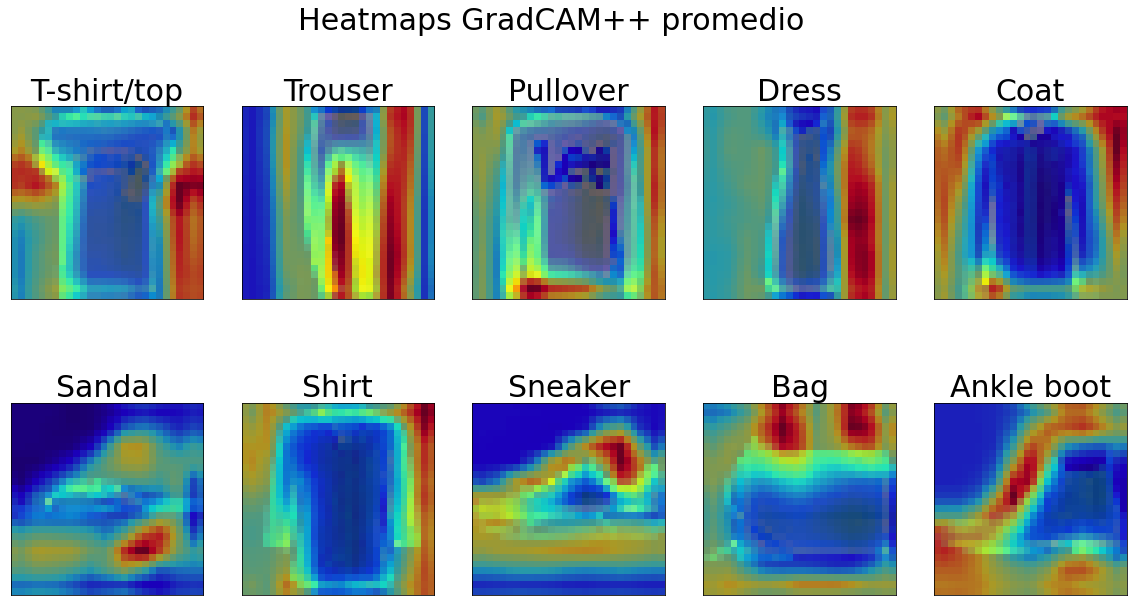

In [ ]:
# Codigo para visualizar los heatmaps promedio creados

# Definimos si queremos reescalar el heatmap o no y si queremos representar algun numero debajo o no
rescalar_img = False
htmap_superpuestos = True

# Representamos cada uno de los heatmaps en orden
fig, ax = plt.subplots(2, 5, clear=True, figsize=[20,10])
fig.suptitle('Heatmaps GradCAM++ promedio', fontsize=30)

for i in range(2):
  for j in range(5):  

    plot_heatmap(ax,i,j,lista_heatmaps_prom[j+i*(5)],rescalar_img,title=class_names[j+i*(5)], superimposed_img = htmap_superpuestos,imagen=test_images[indices_0_9[j+i*5],:,:,0])


2) Fitting de KDE al SSIM de cada instancia de entrenamiento frente a su clase correspondiente

In [ ]:
# Creamos la lista, el array y luego el DataFrame con el SSIM de todas las instancias de entrenamiento (tiempo de ejecución largo)
# Usamos los labels de entrenamiento para que calcule el SSIM contra la clase real, no la predicha (aunque predice bien el 98% luego apenas habría diferencia)
t3 = timeit.default_timer()
lista_train_ssim_clase, array_train_ssim_clase , df_train_ssim_clase  = lista_ssim_mse_clase_detector(lista_heatmaps_prom,train_images[50000:],train_labels[50000:],usar_true_labels=True)
t4 = timeit.default_timer() 
print('Construction time: {}'.format(t4 - t3))

Construction time: 252.4024433609993


3) Thresholds

In [ ]:
# Thresholds

# Hiperparámetro a definir:
tnr = 0.90 # True Negative Rate: Es el % de instancias de entramiento que quieres que NO sean detectadas por el filtro

lista_kde_threshold = calculo_kde_thresholds(tnr,df_train_ssim_clase)

4) Inicialización de la ventana móvil

In [ ]:
import collections

def inizializar_ventana_movil():
  # Hiperparámetros:
  long_ventana = 30
  percent_hay_deriva = 0.35 # Porcentaje de Trues a partir del cual vamos a suponer que hay deriva (True = se ha superado el threshold en esa instancia)

  # Inicialización
  ventana_movil = collections.deque(maxlen=long_ventana)
  for i in range(long_ventana):
    ventana_movil.appendleft(False)
  return ventana_movil,percent_hay_deriva, long_ventana

### Fase de inferencia

Inferencia para giro

In [ ]:
# Vamos comprobando a medida que hacemos inferencia si hay o no deriva

# Inicializamos el contador para saber cuando hemos detectado la deriva
contador = 0
ventana_movil,porcentaje_hay_deriva,longitud_ventana = inizializar_ventana_movil()

# Inicializamos un random_state de test
semilla_1 = 18
semilla_2 = 23
shuffle_test_images, shuffle_test_labels = shuffle(test_images,test_labels,random_state = semilla_1)
g_shuffle_test_images, g_shuffle_test_labels = shuffle(test_images,test_labels,random_state = semilla_2)

# Giramos el ángulo indicado
angulo=-15
girar_img(g_shuffle_test_images, angulo) 

# Concatenamos y decidimos donde en el array girado queremos que empiece
g_inicio = 2500
g_fin = 3500
test_images_mezclado = np.append(shuffle_test_images[0:100], g_shuffle_test_images[g_inicio:g_fin],axis=0)

model.evaluate(g_shuffle_test_images[g_inicio:g_fin],g_shuffle_test_labels[g_inicio:g_fin])

for imagen in test_images_mezclado:

  # Predecimos el número
  array_predicciones = model.predict(np.expand_dims(imagen,axis=0))
  num_predicho = np.argmax(array_predicciones)

  # Creamos htmap y calculamos SSIM
  htmap = grad_cam_plus(imagen,model,'conv2d_1',category_id = num_predicho)
  ssim_calculado = ssim(lista_heatmaps_prom[num_predicho],htmap) 

  # Comprobamos si el SSIM hace saltar el detector
  supera_threshold = comprobacion_threshold(ssim_calculado,lista_kde_threshold[num_predicho])
  #print(supera_threshold)

  # Añadimos ese valor a la ventana movil
  ventana_movil.appendleft(supera_threshold)
  existe_deriva = comprobacion_ventana_movil(ventana_movil,porcentaje_hay_deriva)

  # Si hemos declarado que hay deriva, salimos del bucle y damos el valor del contador para saber cuando hemos parado
  if existe_deriva == True:
    print('Se ha detectado deriva tras la instancia número',contador)
    break
  contador = contador + 1

if existe_deriva == False:
  print('No se ha detectado ninguna deriva')

Inferencia para DataAugmentations

In [ ]:
# Vamos comprobando a medida que hacemos inferencia si hay o no deriva

# Inicializamos el contador para saber cuando hemos detectado la deriva
contador = 0
ventana_movil,porcentaje_hay_deriva,longitud_ventana = inizializar_ventana_movil()

# Inicializamos un random_state de test
semilla_1 = None
semilla_2 = 23
shuffle_test_images, shuffle_test_labels = shuffle(test_images,test_labels,random_state = semilla_1)
g_shuffle_test_images, g_shuffle_test_labels = shuffle(test_images,test_labels,random_state = semilla_2)

# Data Augmentation
inicio_mod = 0
fin_mod    = 10000
data_augmentation   = DataAugmentations(test_images,test_labels)
tipo_augmentation = 'rotacion_escalado'

if tipo_augmentation == 'traslacion':
  horizontal  = [2,2]
  vertical    = [1,1]
  mod_img, mod_labels = data_augmentation.traslation(rango_horiz=horizontal,rango_vert=vertical,slicing=[inicio_mod,fin_mod])

if tipo_augmentation == 'rotacion_escalado':
  angulo = 45
  centro =  None  # Si dejamos None, se pone el centro de la imagen como centro de rotacion
  escala = 1     # A mayor escala, más grande se ve el número
  mod_img, mod_labels = data_augmentation.rotation_and_scale(angulo,escala,centro,slicing=[inicio_mod,fin_mod])

if tipo_augmentation == 'engorde':
  engorde = 1000 # Valores de [0.008,0.005] lo hacen fino, valores por encima de 10 gordo
  mod_img, mod_labels = data_augmentation.engordar(engorde,slicing=[inicio_mod,fin_mod])

if tipo_augmentation == 'perspectiva':
  matriz_afin = warp_mat
  encoger     = False
  expandir    = False
  mod_img, mod_labels = data_augmentation.perspective(matriz_afin,expandir,encoger,slicing=[inicio_mod,fin_mod])

# Concatenamos array normal con array aumentado
test_images_mezclado = np.append(shuffle_test_images[0:100], mod_img ,axis=0)

# Evaluamos para conocer la pérdida de rendimiento que estamos siendo capaces de detectar
model.evaluate(mod_img,mod_labels)

# Inicializamos la barra de visualizacion
print('\nEl limite para el cual decimos que hay deriva es el {}%, es decir, {} instancias\n'.format(porcentaje_hay_deriva*100,int(porcentaje_hay_deriva*longitud_ventana)))
bar = progressbar.ProgressBar(maxval=longitud_ventana,widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.SimpleProgress()])
#bar.start()

for imagen in test_images_mezclado:

  # Predecimos el número
  array_predicciones = model.predict(np.expand_dims(imagen,axis=0))
  num_predicho = np.argmax(array_predicciones)

  # Creamos htmap y calculamos SSIM
  htmap = grad_cam_plus(imagen,model,'conv2d_1',category_id = num_predicho)
  ssim_calculado = ssim(lista_heatmaps_prom[num_predicho],htmap) 

  # Comprobamos si el SSIM hace saltar el detector
  supera_threshold = comprobacion_threshold(ssim_calculado,lista_kde_threshold[num_predicho])
  #print(supera_threshold)

  # Añadimos ese valor a la ventana movil
  ventana_movil.appendleft(supera_threshold)
  existe_deriva,sum_true = comprobacion_ventana_movil(ventana_movil,porcentaje_hay_deriva)

  # Vamos actualizando la barra de progreso
  bar.update(sum_true)

  # Si hemos declarado que hay deriva, salimos del bucle y damos el valor del contador para saber cuando hemos parado
  if existe_deriva == True:
    print('\n\nSe ha detectado deriva tras la instancia número',contador)
    break
  contador = contador + 1

if existe_deriva == False:
  print('\n\nNo se ha detectado ninguna deriva')

313/313 [==============================] - 1s 2ms/step - loss: 3.0539 - accuracy: 0.1788

El limite para el cual decimos que hay deriva es el 35.0%, es decir, 10 instancias



[========================                                            ] 11 of 30



Se ha detectado deriva tras la instancia número 277


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2628 - accuracy: 0.9052


[0.26277849078178406, 0.9052000045776367]

In [ ]:
plt.imshow(mod_img[104,:,:,0],cmap='binary')
plt.savefig('./imagen')
print(np.argmax(mod_labels[10]))

0


8


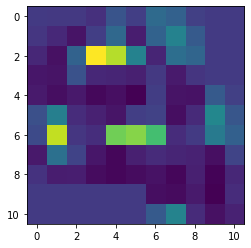

7


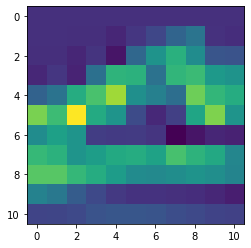

In [ ]:
imagen = grad_cam_plus(mod_img[104],model)
print(np.argmax(model.predict(np.expand_dims(mod_img[104],axis=0))))
plt.imshow(imagen)
plt.show()
imagen = grad_cam_plus(test_images[104],model)
print(np.argmax(model.predict(np.expand_dims(test_images[104],axis=0))))
plt.imshow(imagen)
plt.show()

### Curva ROC


Inferencia para distintos thresholds

In [ ]:
# Calculo de los thresholds que se van a emplear
array_tnr = np.linspace(0,0.99,100)
lista_thresholds = []

for true_negative_rate in array_tnr:

  lista_kde_threshold = calculo_kde_thresholds(true_negative_rate,df_train_ssim_clase)
  
  lista_thresholds_cols_to_rows = []
  for kde_thr in lista_kde_threshold:
    lista_thresholds_cols_to_rows.append(kde_thr[1])
  
  lista_thresholds.append(lista_thresholds_cols_to_rows)  

Carga de MNIST


In [ ]:
mnist = keras.datasets.mnist

(f_train_images, f_train_labels), (f_test_images, f_test_labels) = mnist.load_data()

#Reducimos el rango de los valores a entre 0 y 1
f_train_images = f_train_images/255
f_test_images = f_test_images/255

#Añadimos la informacion de que se trata de un solo canal (y no 3 como en el caso de RGB)
f_train_images = f_train_images.reshape(60000,28,28,1)
f_train_images = f_train_images.astype('float32')

f_test_images = f_test_images.reshape(10000,28,28,1)
f_test_images = f_test_images.astype('float32')

# One hot encoding
f_train_labels = to_categorical(f_train_labels)
f_test_labels = to_categorical(f_test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
f_test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Vamos comprobando a medida que hacemos inferencia si hay o no deriva

# Inicializacion listas

lista_ssim_calc             = []
n                           = 0   # Contador
'''
# Calculo de los thresholds que se van a emplear
array_tnr = np.linspace(0.7,0.99,30) # Elegimos los TNR para los que vamos a generar los thresholds
lista_thresholds            = []
for true_negative_rate in array_tnr:

  lista_kde_threshold = calculo_kde_thresholds(true_negative_rate,df_train_ssim_clase)

  lista_thresholds_cols_to_rows = []
  for kde_thr in lista_kde_threshold:
    lista_thresholds_cols_to_rows.append(kde_thr[1])
  
  lista_thresholds.append(lista_thresholds_cols_to_rows)  
'''
# Data Augmentation
inicio_mod = 0
fin_mod    = 10000
data_augmentation   = DataAugmentations(test_images,test_labels)
tipo_augmentation = 'fashion_mnist'

if tipo_augmentation == 'traslacion':
  horizontal  = [2,2]
  vertical    = [1,1]
  mod_img, mod_labels = data_augmentation.traslation(rango_horiz=horizontal,rango_vert=vertical,slicing=[inicio_mod,fin_mod])

if tipo_augmentation == 'rotacion_escalado':
  angulo = -20
  centro =  None  # Si dejamos None, se pone el centro de la imagen como centro de rotacion
  escala = 1      # A mayor escala, más grande se ve el número
  mod_img, mod_labels = data_augmentation.rotation_and_scale(angulo,escala,centro,slicing=[inicio_mod,fin_mod])

if tipo_augmentation == 'engorde':
  engorde = 1000 # Valores de [0.008,0.005] lo hacen fino, valores por encima de 10 gordo
  mod_img, mod_labels = data_augmentation.engordar(engorde,slicing=[inicio_mod,fin_mod])

if tipo_augmentation == 'perspectiva':
  matriz_afin = warp_mat
  encoger     = False
  expandir    = False
  mod_img, mod_labels = (test_images, test_labels)

if tipo_augmentation == 'fashion_mnist':
  mod_img, mod_labels = (f_test_images, f_test_labels)

# Evaluamos para conocer la pérdida de rendimiento que estamos siendo capaces de detectar
model.evaluate(mod_img,mod_labels)

test_images_grande = np.append(test_images, mod_img ,axis=0)

# Predecimos los números
array_softmax_preds = model.predict(test_images_grande)
numeros_predichos = np.argmax(array_softmax_preds,axis=1)

# Barra de progreso
bar = progressbar.ProgressBar(maxval=len(test_images_grande),widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.SimpleProgress()])
bar.start()

# Inicializamos el tiempo
t3 = timeit.default_timer() 

for i,imagen in enumerate(test_images_grande):

  # Creamos htmap y calculamos SSIM
  htmap = grad_cam_plus(imagen,model,'conv2d_1',category_id = numeros_predichos[i])
  lista_ssim_calc.append(ssim(lista_heatmaps_prom[numeros_predichos[i]],htmap)) 
  bar.update(i)

t4 = timeit.default_timer() 
print('\nSSIM time: {}'.format(t4 - t3))

313/313 [==============================] - 1s 2ms/step - loss: 6.9252 - accuracy: 0.1682


[============================================================= ] 19747 of 20000


SSIM time: 335.15826184399975


In [ ]:

lista_completa_x_threshold  = []
n = 0

bar = progressbar.ProgressBar(maxval=len(lista_thresholds),widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.SimpleProgress()])
bar.start()

# Inicializamos el tiempo
t3 = timeit.default_timer() 
for threshold in lista_thresholds:
  
  # Reiniciamos la lista
  lista_resultados_comprob = []

  for i,ssim_calc in enumerate(lista_ssim_calc):
    lista_resultados_comprob.append(comprobacion_threshold(ssim_calc,lista_kde_threshold[numeros_predichos[i]],threshold[numeros_predichos[i]]))

  lista_completa_x_threshold.append(lista_resultados_comprob)
  bar.update(n)
  n = n+1

t4 = timeit.default_timer() 
print('\nThresholds time: {}'.format(t4 - t3))

print('Fin')

[================================================================== ] 99 of 100


Thresholds time: 178.40673335700012
Fin


In [ ]:
len(lista_completa_x_threshold[0])

In [ ]:
array_completo_x_threshold = np.array(lista_completa_x_threshold)
df_completo_x_threshold = pd.DataFrame(array_completo_x_threshold)
df_completo_x_threshold_transposed = df_completo_x_threshold.transpose()
df_completo_x_threshold.to_csv('/content/drive/MyDrive/Colab_Notebooks/df_threshold_variando_TNR_000_a_099_10000_imgs_fashion_vs_mnist')

In [ ]:
df_completo_x_threshold_transposed

0     1     2     3      4   ...     95     96     97     98     99
0      True  True  True  True   True  ...  False  False  False  False  False
1      True  True  True  True   True  ...  False  False  False  False  False
2      True  True  True  True   True  ...  False  False  False  False  False
3      True  True  True  True   True  ...  False  False  False  False  False
4      True  True  True  True  False  ...  False  False  False  False  False
...     ...   ...   ...   ...    ...  ...    ...    ...    ...    ...    ...
19995  True  True  True  True   True  ...  False  False  False  False  False
19996  True  True  True  True   True  ...  False  False  False  False  False
19997  True  True  True  True   True  ...  False  False  False  False  False
19998  True  True  True  True   True  ...  False  False  False  False  False
19999  True  True  True  True   True  ...  False  False  False  False  False

[20000 rows x 100 columns]

In [ ]:
TPR_num=95
print(df_completo_x_threshold_transposed[TPR_num][:10000].value_counts())
print()
print(df_completo_x_threshold_transposed[TPR_num][10000:].value_counts())


False    9548
True      452
Name: 95, dtype: int64

False    9058
True      942
Name: 95, dtype: int64


In [ ]:
lista_TPR_FPR_x_threshold =[]

for col in df_completo_x_threshold_transposed.columns:
  values_sin_deriva = df_completo_x_threshold_transposed[col][:10000].value_counts()
  values_con_deriva = df_completo_x_threshold_transposed[col][10000:].value_counts()

  tp  = values_con_deriva[True]
  try:
    fn  = values_con_deriva[False]
  except:
    fn = 0
  tpr = tp/(tp+fn)

  fp = values_sin_deriva[True]
  tn = values_sin_deriva[False]
  fpr = fp/(fp+tn)

  #print((tp+fn),(fp+tn))
  lista_TPR_FPR_x_threshold.append([tpr,fpr])

lista_TPR_FPR_x_threshold.append([0,0]) # He añadido para cerrar la curva

array_TPR_FPR_x_threshold = np.array(lista_TPR_FPR_x_threshold)

In [ ]:
array_TPR_FPR_x_threshold

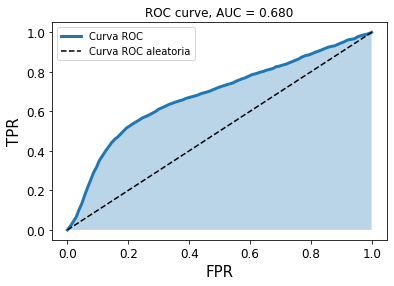

In [ ]:
# Calculo del AUC
auc = -1 * np.trapz(array_TPR_FPR_x_threshold[:,0], array_TPR_FPR_x_threshold[:,1])

# Plot
plt.plot(array_TPR_FPR_x_threshold[:,1],array_TPR_FPR_x_threshold[:,0],label='Curva ROC',lw=3)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),'k--',label='Curva ROC aleatoria')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('ROC curve, AUC = %.3f'%auc)
plt.fill_between(array_TPR_FPR_x_threshold[:,1],array_TPR_FPR_x_threshold[:,0],alpha=0.3)
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Curva_ROC_fashion_vs_mnist')

In [ ]:
lista_Prec_Recall_x_threshold = []
lista_Prec_Recall_x_threshold.append([0,1])

for col in df_completo_x_threshold_transposed.columns:
  values_sin_deriva = df_completo_x_threshold_transposed[col][:10000].value_counts()
  values_con_deriva = df_completo_x_threshold_transposed[col][10000:].value_counts()

  tp  = values_con_deriva[True]
  fp  = values_sin_deriva[True]
  prec = tp/(tp+fp)

  try:
    fn = values_con_deriva[False]
  except:
    fn = 0
  recal_tpr = tp/(tp+fn)

  lista_Prec_Recall_x_threshold.append([prec,recal_tpr])
lista_Prec_Recall_x_threshold.append([1,0])
array_Prec_Recall_x_threshold = np.array(lista_Prec_Recall_x_threshold)

In [ ]:
array_Prec_Recall_x_threshold

array([[0.        , 1.        ],
       [0.50020022, 0.9993    ],
       [0.50146081, 0.9955    ],
       [0.50301954, 0.9912    ],
       [0.50339962, 0.9847    ],
       [0.50496578, 0.9813    ],
       [0.50639797, 0.9775    ],
       [0.50777824, 0.9727    ],
       [0.50999264, 0.9697    ],
       [0.51148148, 0.9667    ],
       [0.51326585, 0.9634    ],
       [0.51470352, 0.9609    ],
       [0.51557187, 0.9552    ],
       [0.51687167, 0.9497    ],
       [0.51957451, 0.9476    ],
       [0.52141712, 0.9434    ],
       [0.52278566, 0.9361    ],
       [0.52514785, 0.9324    ],
       [0.52673357, 0.929     ],
       [0.52853796, 0.9251    ],
       [0.53078031, 0.9217    ],
       [0.53227587, 0.9161    ],
       [0.53479789, 0.9129    ],
       [0.53678989, 0.909     ],
       [0.53946113, 0.905     ],
       [0.54106832, 0.9005    ],
       [0.54337013, 0.8958    ],
       [0.54604418, 0.8924    ],
       [0.54810837, 0.8881    ],
       [0.55052265, 0.8848    ],
       [0.

In [ ]:
# Calculo del AUPR
aupr = -1 * np.trapz(array_Prec_Recall_x_threshold[:,0], array_Prec_Recall_x_threshold[:,1])

# Plot
plt.plot(array_Prec_Recall_x_threshold[:,1],array_Prec_Recall_x_threshold[:,0],label='Curva PR',lw=3)
#plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),'k--',label='Curva ROC aleatoria')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.title('Precision-Recall curve, AUPR = %.3f'%aupr)
plt.fill_between(array_Prec_Recall_x_threshold[:,1],array_Prec_Recall_x_threshold[:,0],alpha=0.3)
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Curva_AUPR_fashion_vs_mnist')

In [ ]:
values_sin_deriva = df_completo_x_threshold_transposed[90][:10000].value_counts()
values_con_deriva = df_completo_x_threshold_transposed[90][10000:].value_counts()
confusion_matrix = np.empty((2,2))
confusion_matrix[0,0] = values_con_deriva[True]
confusion_matrix[0,1] = values_sin_deriva[True]
confusion_matrix[1,0] = values_con_deriva[False]
confusion_matrix[1,1] = values_sin_deriva[False]

sb.heatmap(confusion_matrix,)

In [ ]:
confusion_matrix

array([[1713.,  985.],
       [8287., 9015.]])

In [ ]:
values_con_deriva

False    8287
True     1713
Name: 90, dtype: int64

### Data Augmentations


Clase DataAugmentations


In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import cv2 as cv

class DataAugmentations():
  
  imagenes = np.zeros((1,1,1,1))
  labels = np.zeros((1,1,1,1))

  def __init__(self,imagenes,labels):
    self.imagenes = imagenes
    self.labels = labels

  def traslation(self,rango_horiz=[0,0],rango_vert=[0,0],slicing=None):
    '''
    Funcion que traslada la imagen en el rango de pixeles que indiques en horizontal y vertical
    [desde,hasta]
    Si incluyes slicing en una lista de dos valores, solo se realizará la DataAugmentation sobre ese trozo
    '''
    if slicing is not None:
      imgs = self.imagenes[slicing[0]:slicing[1]]
      lbls = self.labels[slicing[0]:slicing[1]]
    else:
      imgs = self.imagenes
      lbls = self.labels

    # Create image data augmentation generator
    datagen = ImageDataGenerator(width_shift_range=rango_horiz,height_shift_range=rango_vert,fill_mode='constant',cval=0)
    # Prepare iterator and generate the images
    it = datagen.flow(imgs,lbls, batch_size=len(imgs),shuffle=False)
    return it.next() # Devuelve una tupla con (imagenes, labels)

  def rotation_and_scale(self,angle=0,scale=1,center=None,slicing=None):
    '''
    Funcion que rota y/o escala las imagenes
    Si no especificas centro, toma el centro de la imagen como centro de rotacion
    Scale > 1 aumenta el tamaño, hace zoom
    '''
    if center is None:
      center = (self.imagenes.shape[2]//2, self.imagenes.shape[1]//2)

    if slicing is not None:
      imgs = self.imagenes[slicing[0]:slicing[1]]
      lbls = self.labels[slicing[0]:slicing[1]]
    else:
      imgs = self.imagenes
      lbls = self.labels

    # Construimos la matriz de rotacion
    rot_mat             = cv.getRotationMatrix2D( center, angle, scale )
    lista_imagenes_mod  = []
    for img in imgs:
      lista_imagenes_mod.append(cv.warpAffine(img, rot_mat, (img.shape[1], img.shape[0])))

    return np.expand_dims(np.array(lista_imagenes_mod),axis=3), lbls

  def perspective(self,affine_matrix=None,expansion_predet=False,encogimiento_predet=False,slicing=None):

    '''
    Funcion que mueve la tercera dimension, la perspectiva
    Si no especificas centro, toma el centro de la imagen como centro de rotacion
    Scale > 1 aumenta el tamaño, hace zoom
    '''
    if slicing is not None:
      imgs = self.imagenes[slicing[0]:slicing[1]]
      lbls = self.labels[slicing[0]:slicing[1]]
    else:
      imgs = self.imagenes
      lbls = self.labels

    if affine_matrix is None:
      if expansion_predet     == True:
        source_points  = np.array( [[4, 0], [24, 0], [4, 28]] ).astype(np.float32)
        dest_points    = np.array( [[0, 0], [28, 0], [0, 28]] ).astype(np.float32)
        
      if encogimiento_predet  == True:
        source_points  = np.array( [[0, 0], [28, 0], [0, 28]] ).astype(np.float32)
        dest_points    = np.array( [[4, 0], [24, 0], [4, 28]] ).astype(np.float32)

      else: # Si no indicas cambio, no hace nada
        source_points  = np.array( [[0, 0], [28, 0], [0, 28]] ).astype(np.float32)
        dest_points    = np.array( [[0, 0], [28, 0], [0, 28]] ).astype(np.float32)
      # Construimos la affine matrix
      affine_matrix = cv.getAffineTransform(source_points, dest_points) 

    

    lista_imagenes_mod  = []
    for img in imgs:
      lista_imagenes_mod.append(cv.warpAffine(img, affine_matrix, (img.shape[1], img.shape[0])))

    return np.expand_dims(np.array(lista_imagenes_mod),axis=3), lbls


  def engordar(self,engorde=1,slicing=None):
  
      
    '''
    Funcion que engorda o hace mas finos los numeros
    engorde = 0.005 -> Hace muy finos los numeros, limite inferior
    engorde > 10    -> Ya consigue el engorde maximo
    '''
    if slicing is not None:
      imgs = self.imagenes[slicing[0]:slicing[1]]
      lbls = self.labels[slicing[0]:slicing[1]]
    else:
      imgs = self.imagenes
      lbls = self.labels

    # Create image data augmentation generator
    datagen = ImageDataGenerator(brightness_range=(engorde,engorde),fill_mode='constant',cval=0)
    # Prepare iterator and generate the images
    it = datagen.flow(imgs,lbls, batch_size=len(imgs),shuffle=False)
    return it.next() # Devuelve una tupla con (imagenes, labels)

  def zoom(self,zoom=[0,0],slicing=None):
      '''
      Funcion que hace zoom a la imagen. 
      valor > 1 = zoom out
      valor < 1 = zoom in
      '''
      if slicing is not None:
        imgs = self.imagenes[slicing[0]:slicing[1]]
        lbls = self.labels[slicing[0]:slicing[1]]
      else:
        imgs = self.imagenes
        lbls = self.labels
      # Create image data augmentation generator
      datagen = ImageDataGenerator(zoom_range=zoom,fill_mode='constant',cval=0)
      # Prepare iterator and generate the images
      it = datagen.flow(self.imagenes,self.labels, batch_size=len(self.imagenes),shuffle=False)
      return it.next() # Devuelve una tupla con (imagenes, labels)

  def random_rotation(self,rotation,slicing=None):

    if slicing is not None:
      imgs = self.imagenes[slicing[0]:slicing[1]]
      lbls = self.labels[slicing[0]:slicing[1]]
    else:
      imgs = self.imagenes
      lbls = self.labels

    # Create image data augmentation generator
    datagen = ImageDataGenerator(rotation_range=rotation,fill_mode='constant',cval=0)
    # Prepare iterator and generate the images
    it = datagen.flow(self.imagenes,self.labels, batch_size=len(self.imagenes),shuffle=False)

    return it.next() # Devuelve una tupla con (imagenes, labels)


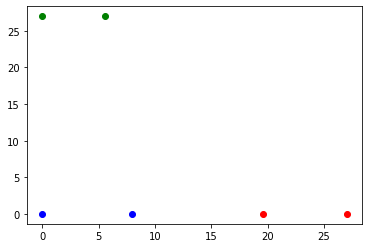

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np


src = test_images[0]

srcTri = np.array( [[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0+8, src.shape[1]*0], [src.shape[1]*0.7, src.shape[0]*0], [src.shape[1]*0.2, src.shape[0]-1]] ).astype(np.float32)

col = ['blue','red','green']
for i in range(len(srcTri)):
  plt.scatter(srcTri[i,0],srcTri[i,1],c = col[i])
  plt.scatter(dstTri[i,0],dstTri[i,1],c = col[i])

warp_mat = cv.getAffineTransform(srcTri, dstTri)
warp_dst = cv.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))
warp_dst = np.expand_dims(warp_dst,axis=2) # Para que tenga canal de gris

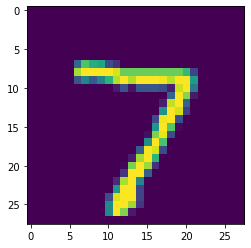

In [ ]:
src = test_images[0]
center = (src.shape[1]//2, src.shape[0]//2)
angle = -90
scale = 1.5
rot_mat = cv.getRotationMatrix2D( center, angle, scale )
warp_rotate_dst = cv.warpAffine(src, rot_mat, (src.shape[1], src.shape[0]))
g_test_images = test_images.copy()
girar_img(g_test_images, angle)

plt.imshow(warp_rotate_dst)
plt.show()
plt.imshow(test_images[0,:,:,0])
plt.show()
plt.imshow(g_test_images[0,:,:,0])

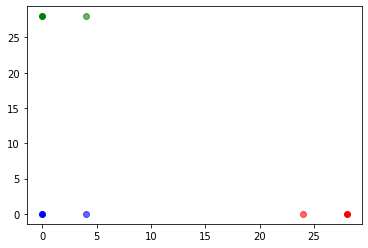

In [ ]:
src = test_images[0]

srcTri = np.array( [[4, 0], [24, 0], [4, 28]] ).astype(np.float32)
dstTri = np.array( [[0, 0], [28, 0], [0, 28]] ).astype(np.float32)

col = ['blue','red','green']
for i in range(len(srcTri)):
  plt.scatter(srcTri[i,0],srcTri[i,1],c = col[i], alpha=0.6)
  plt.scatter(dstTri[i,0],dstTri[i,1],c = col[i])

warp_mat = cv.getAffineTransform(srcTri, dstTri)
warp_dst = cv.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))
warp_dst = np.expand_dims(warp_dst,axis=2) # Para que tenga canal de gris

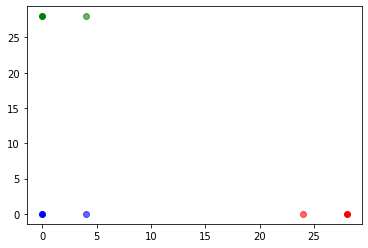

In [ ]:
src = test_images[104]

srcTri = np.array( [[4,0], [24, 0], [4, 28]] ).astype(np.float32)
dstTri = np.array( [[0,0], [28, 0], [0, 28]] ).astype(np.float32)

col = ['blue','red','green']
for i in range(len(srcTri)):
  plt.scatter(srcTri[i,0],srcTri[i,1],c = col[i], alpha=0.6)
  plt.scatter(dstTri[i,0],dstTri[i,1],c = col[i])

warp_mat = cv.getAffineTransform(srcTri, dstTri)
warp_dst = cv.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))
warp_dst = np.expand_dims(warp_dst,axis=2) # Para que tenga canal de gris

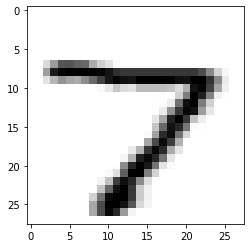

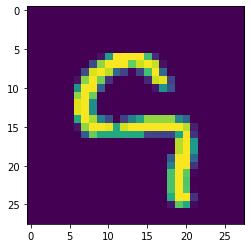

In [ ]:
plt.imshow(warp_dst[:,:,0],cmap='binary')
plt.savefig('./imagen')
plt.show()
plt.imshow(test_images[104,:,:,0])

In [ ]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

def dt_aug_traslacion(imagenes):
  '''
  Funcion que devuelve 
  '''
  # create image data augmentation generator
  datagen = ImageDataGenerator(width_shift_range=[10,11],fill_mode='constant',cval=0)
  # prepare iterator
  it = datagen.flow(data,labels, batch_size=len(imagenes))


  return it.next()

7
7
7
7
7
7
7
7
7


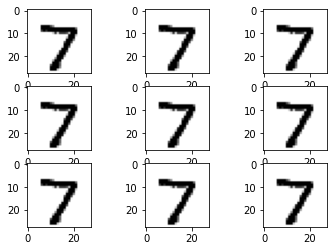

In [ ]:
# convert to numpy array
data = test_images[0]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=(3,3),fill_mode='constant',cval=0)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot

for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0]
  # plot raw pixel data
  plt.imshow(image[:,:,0],cmap='binary')
  print(np.argmax(model.predict(np.expand_dims(image,0))))
  # show the figu


In [ ]:
it.next()[1].shape

(50, 10)

In [ ]:
# convert to numpy array
data = test_images[0]
# expand dimension to one sample
samples = expand_dims(data, 0)
samples.shape

(1, 28, 28, 1)

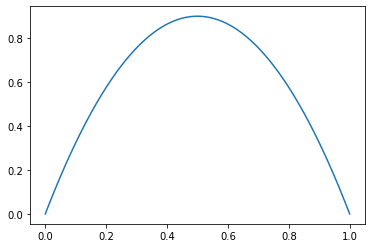

In [ ]:
x = np.linspace(0,1,100)
r = 3.6
funcion = lambda f: r*f*(1-f)
plt.plot(x,funcion(x))

# OOD Detection


## Kmeans

In [ ]:
def k_search_viejo(a_heatmaps,k_max=12):

  '''
  Devuelve arrays de la forma (k_max-1) con la inercia y el silhouette score
  '''
  # Inicializar los arrays donde se van a guardar los scores para cada K
  a_inercias          = np.empty(k_max-1)
  a_silhoutte         = np.empty(k_max-1)
  reshaped_train_htmaps = a_heatmaps.reshape((a_heatmaps.shape[0],a_heatmaps.shape[1]*a_heatmaps.shape[2]))

  for k in range(2,k_max+1):

    # Entrenar para cada K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reshaped_train_htmaps)

    # Calculo y guardar para cada K los valores de inercia y silueta
    a_inercias[k-2]   = kmeans.inertia_
    a_silhoutte[k-2]  = silhouette_score(reshaped_train_htmaps,kmeans.labels_)
    
  return a_inercias, a_silhoutte

def array_train_clase(clase,n_inst,train_instances,train_labels):
  '''
  Devuelve un array de la forma (batch,height,width,color_channel) con 
  solo instancias de la clase elegida
  '''
  
  indices         = buscar_num(clase,n_inst-1,train_labels)
  train_instances = np.empty((n_inst,28,28,1))

  for i,indice in enumerate(indices):
    train_instances[i] = train_images[indice]

  return train_instances

def k_search_x_clase_viejo(a_heatmaps,k_max=12):
  '''
  Funcion que devuelve la inercia y el silhouette score para cada clase
  '''
  a_inercias  = np.empty((num_clases,k_max-1))
  a_silhoutte = np.empty((num_clases,k_max-1))

  for clase in range(num_clases):

    # Calculo de array con las inercias de 2 a k_max para la clase correspondiente
    a_incercias_x_clase, a_silhoutte_x_clase = k_search(a_heatmaps[clase],k_max)

    # Añadir a array total
    a_inercias[clase]   = a_incercias_x_clase
    a_silhoutte[clase]  = a_silhoutte_x_clase

  return a_inercias, a_silhoutte  

def kmeans_x_clase(train_htmaps,k_optimos=None):
  '''
  Funcion que crea una lista con instancias Kmeans con el array de imagenes que 
  se proporcione y en caso de no proporcionar valores K se pondra todos a 6
  '''
  l_kmeans = []
  if k_optimos is None:
    k_optimos = np.full((10),fill_value=6)

  for clase in range(num_clases):
    
    # Reshape array htmaps para K-means
    reshaped_train_htmaps = train_htmaps[clase].reshape((train_htmaps.shape[1],train_htmaps.shape[2]*train_htmaps.shape[3]))

    # Entrenar para cada K
    kmeans = KMeans(n_clusters = k_optimos[clase])
    kmeans.fit(reshaped_train_htmaps)

    l_kmeans.append(kmeans)
  
  return l_kmeans

def calculo_array_htmaps(a_imagenes,a_preds=None):
  '''
  Funcion que devuelve los heatmaps del array que se proporcione
  contra la clase predicha por el modelo
  '''
  # Inicializar con la shape adecuada
  a_htmaps = np.empty((len(a_imagenes),model.get_layer(last_conv).output.shape[1],model.get_layer(last_conv).output.shape[2]))

  if a_preds is None:
    a_preds = np.argmax(model.predict(a_imagenes),axis=1)

  for i,img in enumerate(a_imagenes):

    a_htmaps[i] = grad_cam_plus(img,model,last_conv,category_id=a_preds[i])

  return a_htmaps


def calculo_ssim_mse_kmeans(l_kmeans,a_htmap_test,preds):
  '''
  Función que devuelve una array con el SSIM del array de imagenes proporcionado
  a partir de los kmeans proporcionados
  '''
  h_dim                      = a_htmap_test.shape[1]
  w_dim                      = a_htmap_test.shape[2]
  flat_dim                   = h_dim*w_dim
  a_ssim_mse_clasepred       = np.empty((len(a_htmap_test),3))
  a_ssim_mse_clasepred[:,2]  = preds

  for i,htmap in enumerate(a_htmap_test):

    # Encontrar centroide más cercano de la clase predicha y obtener su centroide
    centroide       = np.argmin(lista_kmeans[preds[i]].transform(htmap.reshape(1,flat_dim)))
    htmap_centroide = kmeans.cluster_centers_[centroide].reshape(h_dim,w_dim)

    # SSIM y MSE
    a_ssim_mse_clasepred[i,0] = ssim(htmap,htmap_centroide)
    a_ssim_mse_clasepred[i,1] = mean_squared_error(htmap,htmap_centroide)

  return a_ssim_mse_clasepred

def k_search_viejo(m_ssim,k_max=12):

  '''
  Devuelve arrays de la forma (k_max-1) con la inercia y el silhouette score
  '''
  # Inicializar los arrays donde se van a guardar los scores para cada K
  a_inercias          = np.empty(k_max-1)
  a_silhoutte         = np.empty(k_max-1)
  reshaped_train_htmaps = a_heatmaps.reshape((a_heatmaps.shape[0],a_heatmaps.shape[1]*a_heatmaps.shape[2]))

  for k in range(2,k_max+1):

    # Entrenar para cada K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reshaped_train_htmaps)

    # Calculo y guardar para cada K los valores de inercia y silueta
    a_inercias[k-2]   = kmeans.inertia_
    a_silhoutte[k-2]  = silhouette_score(reshaped_train_htmaps,kmeans.labels_)
    
  return a_inercias, a_silhoutte


Algoritmo viejo con Kmeans

In [ ]:
k = 8
kmeans = KMeans(n_clusters=k)
kmeans.fit(matriz_ssim_completa[4])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Creación de array con INERCIA y la SILHOUETTE SCORE del K-Means hasta el K_max elegido (20s para 900 htmaps por clase y k=8)
k_max = 8
array_inercias, array_siluetas = k_search_x_clase(array_heatmaps_train_x_clase,k_max)

In [ ]:
# Calculo del K a usar en cada clase
k_optimos = np.argmin(array_siluetas,axis=1)+2
k_optimos

array([7, 8, 8, 8, 8, 8, 8, 8, 8, 6])

In [ ]:
# Creacion de instancias K-Means para cada clase (6 segs para 10000 htmaps)
lista_kmeans = kmeans_x_clase(array_heatmaps_train_x_clase,k_optimos)

In [ ]:
lista_kmeans[9].cluster_centers_.shape

(6, 121)

Nearest neightbours


In [ ]:

neigh = NearestNeighbors(n_neighbors=5,metric='precomputed')
nbrs = neigh.fit(matriz_ssim_completa[2])
distances, indices = nbrs.kneighbors(matriz_ssim_completa[2])

In [ ]:
distances

array([[0.        , 0.14524442, 0.17032329, 0.1723598 , 0.17606197],
       [0.        , 0.1172191 , 0.12420024, 0.12788127, 0.14504539],
       [0.        , 0.22255504, 0.24137137, 0.26037677, 0.27409816],
       ...,
       [0.        , 0.20594415, 0.22637516, 0.25329395, 0.2576047 ],
       [0.        , 0.1376082 , 0.14051209, 0.14978629, 0.17258731],
       [0.        , 0.19102647, 0.22492659, 0.22598212, 0.2268396 ]])

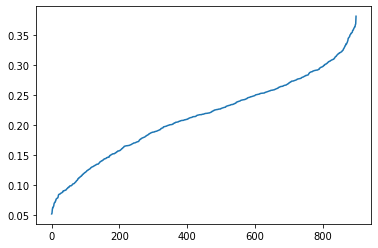

In [ ]:
distances2 = np.sort(distances, axis=0)
distances2 = distances2[:,3]
plt.plot(distances2)

In [ ]:
df_d_ssim = pd.DataFrame(matriz_ssim_completa[0])

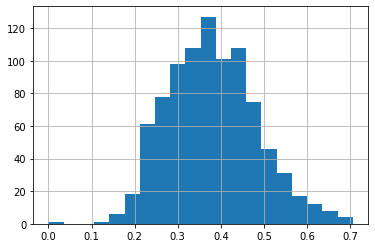

In [ ]:
df_d_ssim[1].hist(bins=20)

(array([4.05451e+05, 7.30000e+01, 4.50000e+02, 1.61000e+03, 4.21300e+03,
        8.71800e+03, 1.58510e+04, 2.60810e+04, 3.89380e+04, 5.38140e+04,
        6.55400e+04, 7.18910e+04, 6.35550e+04, 3.23470e+04, 1.40800e+04,
        5.22300e+03, 1.65300e+03, 4.20000e+02, 8.40000e+01, 8.00000e+00]),
 array([0.        , 0.03920801, 0.07841602, 0.11762403, 0.15683204,
        0.19604005, 0.23524806, 0.27445607, 0.31366407, 0.35287208,
        0.39208009, 0.4312881 , 0.47049611, 0.50970412, 0.54891213,
        0.58812014, 0.62732815, 0.66653616, 0.70574417, 0.74495218,
        0.78416019]),
 <a list of 20 Patch objects>)

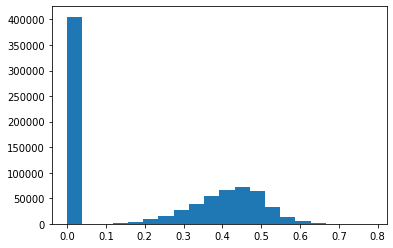

In [ ]:
plt.hist(matriz_ssim_completa_copia[0].flatten(),bins=20)

Comprobación de mejor valor Epsilon

In [ ]:
# Creación de lista para hacer los nearest neightbours
lista_dist_x_clase = []
n_neighbors = 5
for clase in range(num_clases):
  neigh = NearestNeighbors(n_neighbors=n_neighbors,metric='precomputed')
  nbrs = neigh.fit(matriz_ssim_completa[clase])
  distances, indices = nbrs.kneighbors(matriz_ssim_completa[clase])
  lista_dist_x_clase.append(distances)

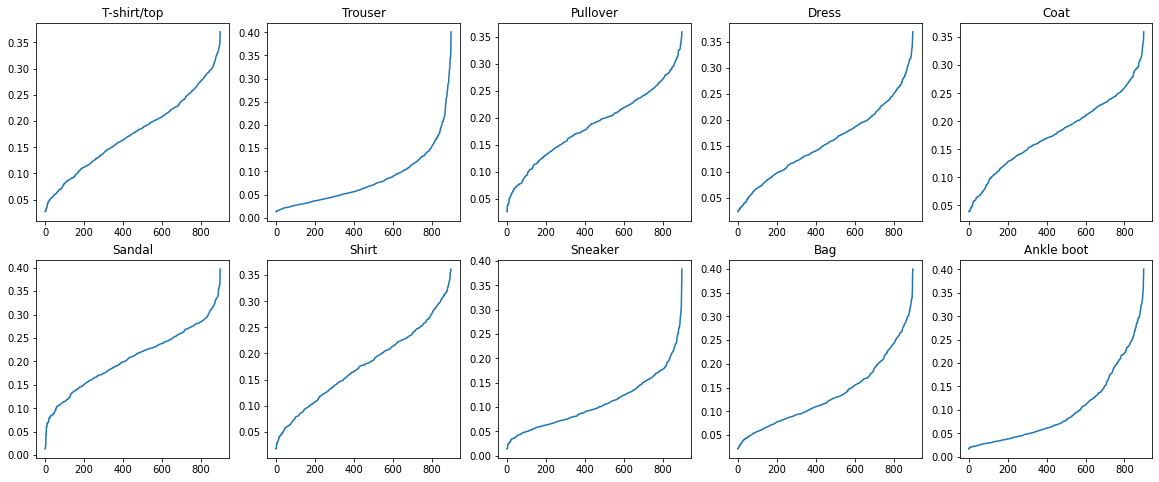

In [ ]:
# Representación de la distancia al vecino definido 
fig, axs = plt.subplots(nrows=2,ncols=5,figsize=(20,8))
vecino   = 1
for j in range(5):

    distances = np.sort(lista_dist_x_clase[j], axis=0)
    distances = distances[:,vecino]
    axs[0,j].plot(distances)
    axs[0,j].set_title(class_names[j])

    distances = np.sort(lista_dist_x_clase[j+5], axis=0)
    distances = distances[:,vecino]
    axs[1,j].plot(distances)
    axs[1,j].set_title(class_names[j+5])

plt.savefig('./distancia_al_tercer_vecino_de_cada_punto_para_cada_clase')

### K optimo


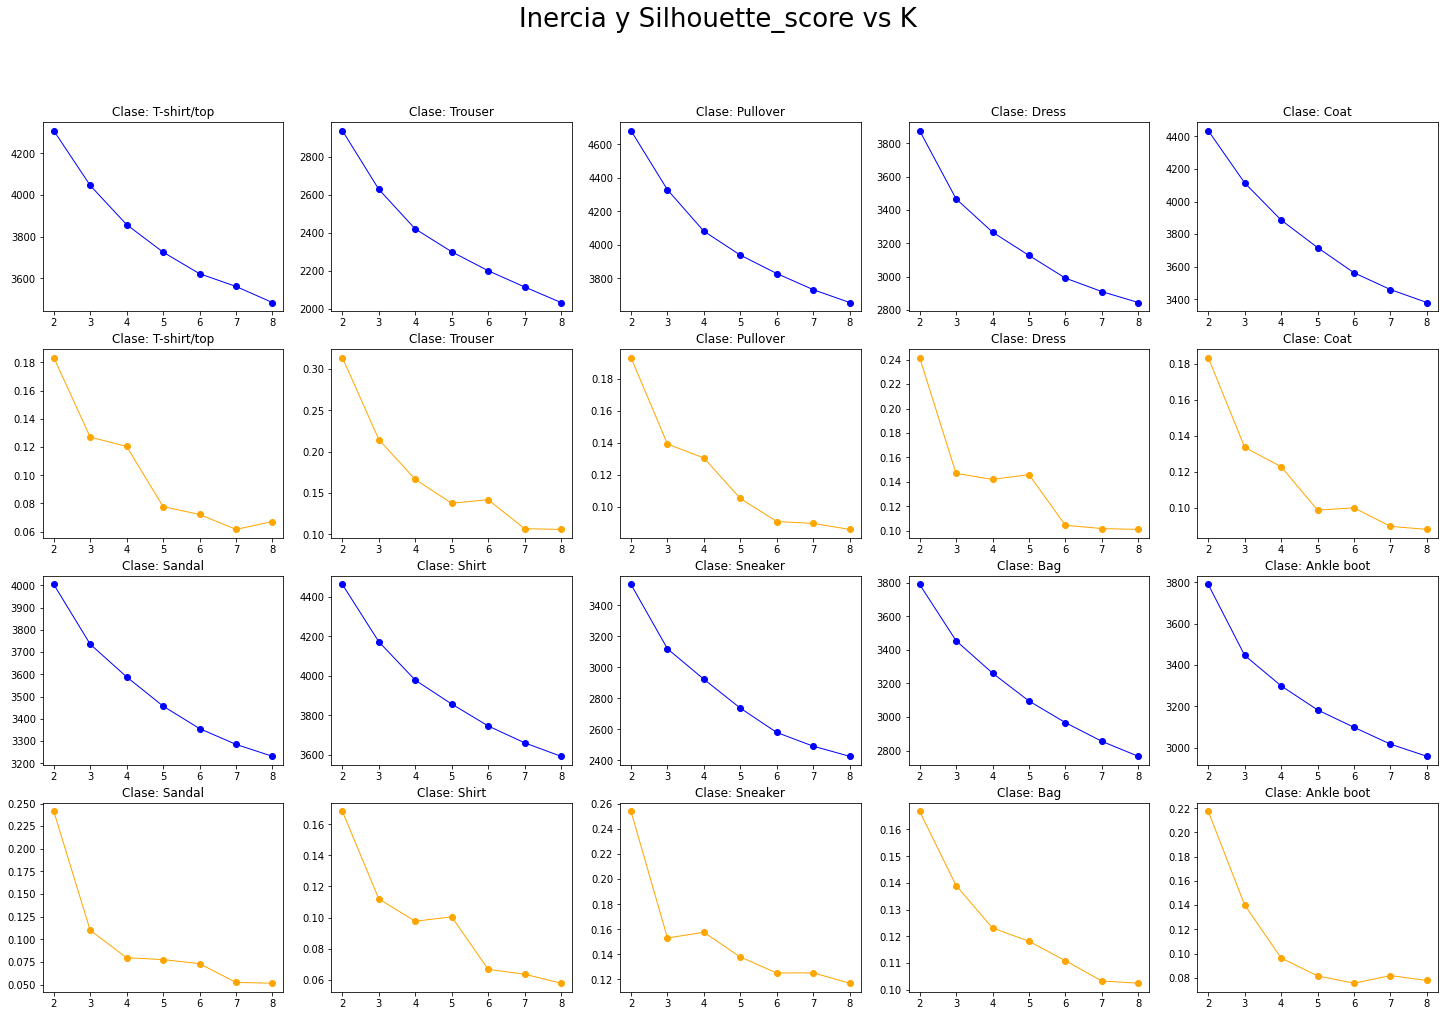

In [ ]:
# PLOT de la curva de la INERCIA y la SILHOUETTE SCORE del K-Means

# Inicializar el eje X
x = np.linspace(2,k_max,k_max-1)

# Creacion de la figura
fig, ax = plt.subplots(nrows=4,ncols=int(num_clases/2),figsize=(25,16))
fig.suptitle('Inercia y Silhouette_score vs K',fontsize=26)

i=0
for j in range(int(num_clases/2)):

    ax[i,j].plot(   x, array_inercias[i+j],'bo', color='blue', linestyle='-',linewidth=1)
    ax[i,j].set_xticks( x)
    ax[i,j].set_title(  'Clase: {}'.format(class_names[2*i+j]))

    ax[i+1,j].plot(   x, array_siluetas[i+j],'bo', color='orange',linestyle='-',linewidth=1)
    ax[i+1,j].set_xticks(   x)
    ax[i+1,j].set_title(    'Clase: {}'.format(class_names[2*i+j]))

    ax[i+2,j].plot(   x, array_inercias[i+j+5],'bo', color='blue', linestyle='-',linewidth=1)
    ax[i+2,j].set_xticks( x)
    ax[i+2,j].set_title(  'Clase: {}'.format(class_names[i+j+5]))

    ax[i+3,j].plot(   x, array_siluetas[i+j+5],'bo', color='orange',linestyle='-',linewidth=1)
    ax[i+3,j].set_xticks(   x)
    ax[i+3,j].set_title(    'Clase: {}'.format(class_names[i+j+5]))

plt.savefig('./Inercia_y_Silhouette_score_vs_K')


### Varios

In [ ]:
# Calculo de las predicciones directamente con la clase predicha
test_preds = np.argmax(model.predict(test_images),axis=1)

array([9, 2, 1, ..., 8, 1, 7])

In [ ]:
# Calculo de los heatmaps de imagenes de test (4 min para 10000 imgs)
array_heatmaps_train_x_clase_test = calculo_array_htmaps(test_images,test_preds)

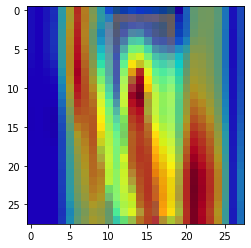

In [ ]:
n=2
plt.imshow(test_images[n,:,:,0])
plt.imshow(resize(array_heatmaps_train_x_clase[1,n],(28,28)),alpha=0.6,cmap='jet')
plt.show()

In [ ]:
# Calculo del array con SSIM,MSE y preds
array_ssim_mse_preds = calculo_ssim_mse_kmeans(lista_kmeans,array_heatmaps_train_x_clase_test,test_preds)

In [ ]:
df_ssim_mse_preds = pd.DataFrame(array_ssim_mse_preds,columns=['SSIM','MSE','Clase_pred'])

In [ ]:
df_ssim_mse_preds

In [ ]:
i = 1132
clase = np.argmax(model.predict(np.expand_dims(test_images[i],0)))
print(class_names[clase])
x = grad_cam_plus(test_images[i],model,label_name=class_names)
print('Array distancias:',np.round(kmeans.transform(x.reshape(1,121)),4))
print('''                       0      1     2      3       4      5      6      7''')
centroid = np.argmin(kmeans.transform(x.reshape(1,121)))
print('-'*30)
print('Centroide mas cercano:',centroid,lista_kmeans[clase].predict(x.reshape(-1,121)))
print('-'*30)
plt.subplots(1,4,figsize=(15,10))
plt.subplot(1,4,1).imshow(kmeans.cluster_centers_[1].reshape(11,11))
plt.subplot(1,4,2).imshow(kmeans.cluster_centers_[centroid].reshape(11,11))
plt.subplot(1,4,3).imshow(x)
plt.subplot(1,4,4).imshow(test_images[i,:,:,0],cmap='binary')
print('''      SSIM      /   MSE''')
for i in range(len(kmeans.cluster_centers_)):
  print(i,'/',round(ssim(kmeans.cluster_centers_[i].reshape(11,11).astype('float32'),x),5),'\t/',round(mean_squared_error(kmeans.cluster_centers_[i].reshape(11,11),x),3))
print('-'*30)

In [ ]:
i = 1132
clase = np.argmax(model.predict(np.expand_dims(test_images[i],0)))
print(class_names[clase])
x = grad_cam_plus(test_images[i],model,label_name=class_names)
print('Array distancias:',np.round(lista_kmeans[clase].transform(x.reshape(1,121)),4))
print('''                       0      1     2      3       4      5      6      7''')
centroid = np.argmin(lista_kmeans[clase].transform(x.reshape(1,121)))
print('-'*30)
print('Centroide mas cercano:',centroid,lista_kmeans[clase].predict(x.reshape(-1,121)))
print('-'*30)
plt.subplots(1,4,figsize=(15,10))
plt.subplot(1,4,1).imshow(lista_kmeans[clase].cluster_centers_[1].reshape(11,11))
plt.subplot(1,4,2).imshow(lista_kmeans[clase].cluster_centers_[centroid].reshape(11,11))
plt.subplot(1,4,3).imshow(x)
plt.subplot(1,4,4).imshow(test_images[i,:,:,0],cmap='binary')
print('''      SSIM      /   MSE''')
for i in range(len(lista_kmeans[clase].cluster_centers_)):
  print(i,'/',round(ssim(lista_kmeans[clase].cluster_centers_[i].reshape(11,11).astype('float32'),x),5),'\t/',round(mean_squared_error(lista_kmeans[clase].cluster_centers_[i].reshape(11,11),x),3))
print('-'*30)

In [ ]:
df = pd.DataFrame(lista_kmeans[clase].labels_.reshape(-1,1),columns=['Label'])
df['Label'].value_counts()

3    145
5    143
0    120
6    116
1    115
7     90
4     90
2     81
Name: Label, dtype: int64

In [ ]:
# Calculo de las predicciones directamente con la clase predicha
f_test_preds = np.argmax(model.predict(f_test_images),axis=1)

In [ ]:
# Calculo de los heatmaps de imagenes de test (4 min para 10000 imgs)
f_array_heatmaps_train_x_clase_test = calculo_array_htmaps(f_test_images,f_test_preds)

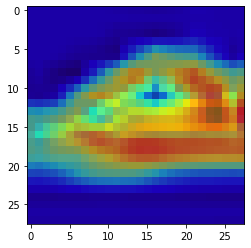

In [ ]:
n=251
plt.imshow(test_images[n,:,:,0])
plt.imshow(resize(array_heatmaps_train_x_clase_test[n],(28,28)),alpha=0.6,cmap='jet')
plt.show()

In [ ]:
# Calculo del array con SSIM,MSE y preds
f_array_ssim_mse_preds = calculo_ssim_mse_kmeans(lista_kmeans,f_array_heatmaps_train_x_clase_test,test_preds)

In [ ]:
df_ssim_mse_preds = pd.DataFrame(array_ssim_mse_preds,columns=['SSIM','MSE','Clase_pred'])

In [ ]:
# Generar las imagenes de las figuras
for i in range(10):
  a = sb.pairplot(df_concatenado.loc[df_concatenado['Clase_pred']==i,['SSIM','MSE','Deriva']],hue='Deriva')
  a.axes[0,0].get_figure().suptitle('Clase: {}  \\ Nº inputs: {}'.format(class_names[i],df_comp_gir['Clase_pred'].value_counts()[i]), fontsize=16)
  plt.savefig('./grafico{}'.format(i),dpi=200)

In [ ]:
from skimage import io
fig, axs = plt.subplots(2,5,sharex=True,sharey=True,figsize=(50,20),tight_layout=True)
fig.suptitle('Analisis estadístico del SSIM y MSE de cuando no hay deriva VS cuando hay', fontsize=35)
for i in range(2):
  for j in range(5):
    image=io.imread("./grafico{}.png".format(j+5*i))/255.0
    axs[i,j].imshow(image,vmin=0,vmax=1)
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/graficoSSIM_MSE_NoDeriva_VS_Deriva'.format(i),dpi=200)

## Imports y funciones

In [ ]:
import time 
import timeit
import progressbar
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.optimize import minimize_scalar
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage import io
from time import sleep
from operator import itemgetter
from sklearn.utils import shuffle

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import OPTICS
from sklearn.metrics import pairwise_distances


import scipy.stats as stats
from scipy.sparse import csr_matrix
from scipy.optimize import minimize
from scipy.spatial import distance

from matplotlib import cm,colors
import seaborn as sb

import pandas as pd



Creacion Heatmaps y clusters



In [ ]:
def calculo_htmaps_promedio_mediana(a_heatmaps,modo='mediana'):
  '''
  Funcion que devuelve una lista con el heatmap promedio
  del array de heatmaps proporcionado
  '''
  
  
  if modo == 'mediana':

    htmap_prom_med = np.median(a_heatmaps,axis=0)

  if modo == 'promedio':

    # Inicializamos un heatmap que contendrá la suma y otr
    htmap_suma = np.zeros((11,11),dtype='float32') 
    htmap_prom_med = np.zeros((11,11),dtype='float32')

    # Sumamos todos los heatmaps del numero pixel a pixel
    for htmap in a_heatmaps:
      np.add(htmap_suma,htmap,out=htmap_suma)

    # Calculamos la media pixel a pixel 
    htmap_prom_med = htmap_suma/len(a_heatmaps)

  return  htmap_prom_med


def n_heatmaps_x_clase(n_htmaps,instances,labels):
  '''
  Funcion que genera N heatmaps para cada clase del dataset que le proporciones

  '''
  a_heatmaps = np.empty((num_clases,n_htmaps,model.get_layer(last_conv).output.shape[1],model.get_layer(last_conv).output.shape[2]))

  for num_clase in range(num_clases):

    # Creas una lista con los indices del numero
    i_nums = buscar_num(num_clase,n_htmaps-1,labels)
    
    for i,indice_num in enumerate(i_nums):

      # Rellenas el array con los heatmaps
      a_heatmaps[num_clase,i] = grad_cam_plus(instances[indice_num],model,category_id=np.argmax(labels[indice_num]))

  return a_heatmaps


def buscar_num_bien_predicho(clase,n_heatmaps,labels,preds):
  '''
  Funcion que encuentra un num las n_veces que quieras en 
  un conjunto de imagenes de numeros (empezando a buscar desde la pos que indiques) 
  develve una lista con los indices de los números
  '''
  lista_indices = []
  n=0
  i=0
  while n < n_heatmaps:
    if clase == np.argmax(labels[i]):
      if clase == preds[i]:
        lista_indices.append(i)
        n = n+1
    i = i+1

  return lista_indices



def n_heatmaps_x_clase_bien_predichos(n_htmaps,instances,labels,predicciones):
  '''
  Funcion que genera N heatmaps para cada clase del dataset que le proporciones SOLO SI ESTAN BIEN PREDICHOS POR EL MODELO

  '''
  a_heatmaps = np.empty((num_clases,n_htmaps,model.get_layer(last_conv).output.shape[1],model.get_layer(last_conv).output.shape[2]))

  for num_clase in range(num_clases):

    # Creas una lista con los indices del numero
    print(num_clase)
    i_nums = buscar_num_bien_predicho(num_clase,n_htmaps,labels,predicciones)
    
    for i,indice_num in enumerate(i_nums):

      # Rellenas el array con los heatmaps
      a_heatmaps[num_clase,i] = grad_cam_plus(instances[indice_num],model,category_id=np.argmax(labels[indice_num]))

  return a_heatmaps


def htmap_promedio(a_heatmaps):

  # Inicializar un array vacío 
  htmap_suma = np.zeros((a_heatmaps.shape[1],a_heatmaps.shape[2]),dtype='float32') 
  htmap_prom = np.zeros((a_heatmaps.shape[1],a_heatmaps.shape[2]),dtype='float32')

  # Sumamos todos los heatmaps del numero pixel a pixel
  for htmap in a_heatmaps:
    np.add(htmap_suma,htmap,out=htmap_suma)

  # Calculamos la media pixel a pixel
  htmap_prom = htmap_suma/a_heatmaps.shape[0]

  return htmap_prom


def htmap_mediana(a_heatmaps):

  return np.median(a_heatmaps,axis=0)


def reescalar_img_a_rango(img,rango):
  '''
  Funcion que recibe una imagen y un rango [min,max] y reescala dicha imagen al rango indicado
  '''
  img_reescalada = np.zeros(img.shape)
  a = np.min(rango)
  b = max(rango)
  img_reescalada = a + (img-np.min(img)*(rango[1]-rango[0]))/(np.max(img)-np.min(img))

  return img_reescalada


Funciones SSIM y Thresholding de heatmaps

In [ ]:
def calculo_ssim_prom_med(a_htmap_imagenes,preds,l_htmaps_prom_x_clase):
  '''
  Calcula el SSIM de los heatmaps contra el promedio o mediana de la clase predicha
  '''
  # Inicializar el array que tendra los ssim y prediciones de cada imagen
  a_ssim_x_imagen = np.empty((len(a_htmap_imagenes),2))
  # Para cada predicción
  for indice,label_pred in enumerate(preds):
   
    a_ssim_x_imagen[indice,0] = ssim(l_htmaps_prom_x_clase[label_pred],a_htmap_imagenes[indice])
    a_ssim_x_imagen[indice,1] = label_pred 

  return a_ssim_x_imagen


def matriz_ssim_x_pares(a_heatmaps):
  '''
  Crea una matriz triangular superior con las distancias a pares de entre cada heatmap del array proporcionado
  '''
  m_ssim = np.zeros((len(a_heatmaps),len(a_heatmaps)))

  # Para cada heatmap en el array 
  for i,htmap in enumerate(a_heatmaps):
    
    # Recorremos todas las columnas NO OCUPADAS(de ahi el j+1) para dicha fila y comparamos el
    # heatmap de la fila contra cada uno de los htmaps correspodondiente a cada columna
    for j in range(i+1,len(a_heatmaps)):
      
      m_ssim[i,j] = dist_ssim(htmap,a_heatmaps[j])
      #m_ssim[j,i] = m_ssim[i,j]


  return m_ssim

def dist_ssim(img1,img2):
  
  return (1-ssim(img1,img2))/2


def calculo_ssim(a_htmap_imagenes,preds,l_htmaps_prom_x_clase_cluster):
  '''
  Calcula el ssim de un array de imagenes contra las predicciones de dichas imagenes, 
  en base a los heatmaps promedio por cluster proporcionados
  '''
  # Inicializar el array que tendra los ssim y prediciones de cada imagen
  a_ssim_x_imagen = np.empty((len(a_htmap_imagenes),2))

  # Para cada predicción
  for indice,label_pred in enumerate(preds):
    
    # Inicilizar el array que contiene los ssim para cada cluster
    a_ssim_para_cada_htmap_cluster = np.zeros((l_htmaps_prom_x_clase_cluster[label_pred].shape[0]))

    # Para cada htmap promedio de la clase predicha
    for i_htmap_cluster in range(l_htmaps_prom_x_clase_cluster[label_pred].shape[0]):
      a_ssim_para_cada_htmap_cluster[i_htmap_cluster] = ssim(l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster],a_htmap_imagenes[indice])
    
    a_ssim_x_imagen[indice,0] = np.max(a_ssim_para_cada_htmap_cluster) 
    a_ssim_x_imagen[indice,1] = label_pred 

  return a_ssim_x_imagen


def calculo_ssim_reescalado(a_htmap_imagenes,preds,l_htmaps_prom_x_clase_cluster):
  '''
  Input:
  - Array con heatmaps de las imagenes
  - Predicciones de dichas imagenes
  - Lista con los heatmaps de cada clase y cluster
  Output:
  - SSIM de todos los heatmaps contra el heatmap reescalado de su cluster que más se parezca
  '''
  # Inicializar el array que tendra los ssim y prediciones de cada imagen
  a_ssim_x_imagen = np.empty((len(a_htmap_imagenes),2))

  # Para cada predicción
  for indice,label_pred in enumerate(preds):
    
    # Inicilizar el array que contiene los ssim para cada cluster
    a_ssim_para_cada_htmap_cluster = np.zeros((l_htmaps_prom_x_clase_cluster[label_pred].shape[0]))

    # Rango del reescalado
    rango_reesc = [np.min(a_htmap_imagenes[indice]),np.max(a_htmap_imagenes[indice])]

    # Para cada htmap promedio de la clase predicha
    for i_htmap_cluster in range(l_htmaps_prom_x_clase_cluster[label_pred].shape[0]):

      # Calculo del SSIM contra el heatmap REESCALADO
      htmap_cluster_reescalado = np.interp(l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster],
                                           (l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster].min(), 
                                            l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster].max()),
                                            (rango_reesc))
      a_ssim_para_cada_htmap_cluster[i_htmap_cluster] = ssim(htmap_cluster_reescalado,a_htmap_imagenes[indice])
      #print(a_ssim_para_cada_htmap_cluster[i_htmap_cluster]-ssim(l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster],a_htmap_imagenes[indice]))
    
    a_ssim_x_imagen[indice,0] = np.max(a_ssim_para_cada_htmap_cluster) 
    a_ssim_x_imagen[indice,1] = label_pred 

  return a_ssim_x_imagen


def calculo_ssim_reescalado_a_input(a_htmap_imagenes,preds,l_htmaps_prom_x_clase_cluster):
  '''
  Input:
  - Array con heatmaps de las imagenes
  - Predicciones de dichas imagenes
  - Lista con los heatmaps de cada clase y cluster
  Output:
  - SSIM de todos los heatmaps contra el heatmap reescalado de su cluster que más se parezca
  '''
  # Inicializar el array que tendra los ssim y prediciones de cada imagen
  a_ssim_x_imagen = np.empty((len(a_htmap_imagenes),2))

  # Inicializar los heatmaps reescalados
  a_htmap_imagenes_reesc = np.zeros(a_htmap_imagenes.shape)

  # Para cada predicción
  for indice,label_pred in enumerate(preds):
    
    # Inicilizar el array que contiene los ssim para cada cluster
    a_ssim_para_cada_htmap_cluster = np.zeros((l_htmaps_prom_x_clase_cluster[label_pred].shape[0]))    

    # Para cada htmap promedio de la clase predicha
    for i_htmap_cluster in range(l_htmaps_prom_x_clase_cluster[label_pred].shape[0]):
      
      # Rango del reescalado
      rango_reesc = [np.min(l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster]),np.max(l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster])]

      # Calculo del SSIM contra el heatmap input REESCALADO
      htmap_imagen_reescalado = np.interp(a_htmap_imagenes[indice], (a_htmap_imagenes[indice].min(), a_htmap_imagenes[indice].max()), (rango_reesc))
      a_ssim_para_cada_htmap_cluster[i_htmap_cluster] = ssim(l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster],htmap_imagen_reescalado)
      #print(a_ssim_para_cada_htmap_cluster[i_htmap_cluster]-ssim(l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster],a_htmap_imagenes[indice]))
    
    a_ssim_x_imagen[indice,0] = np.max(a_ssim_para_cada_htmap_cluster) 
    a_ssim_x_imagen[indice,1] = label_pred

    # Creamos el array con los heatmaps de las imagenes en el rango del cluster mas cercano de su correspondiente clase
    rango_reesc_htmap = [np.min(l_htmaps_prom_x_clase_cluster[label_pred][np.argmax(a_ssim_para_cada_htmap_cluster)]),np.max(l_htmaps_prom_x_clase_cluster[label_pred][np.argmax(a_ssim_para_cada_htmap_cluster)])]
    a_htmap_imagenes_reesc[indice] = np.interp(a_htmap_imagenes[indice], (a_htmap_imagenes[indice].min(), a_htmap_imagenes[indice].max()), (rango_reesc_htmap))

  return a_ssim_x_imagen,a_htmap_imagenes_reesc


def calculo_distancia_htmap_cercano(a_htmap_imagenes,preds,l_htmaps_prom_x_clase_cluster,a_heatmaps_x_clase,a_labels_cluster,metodo='ssim'):
  '''
  Calcula el ssim de un array de imagenes contra las predicciones de dichas imagenes, 
  calculando el cluster más cercano de la clase predicha y despues cogiendo el htmap 
  más cercano de dicho cluster (medido con SSIM)
  '''
  # Inicializar el array que tendra las distancias y prediciones de cada imagen
  a_dist_x_imagen = np.empty((len(a_htmap_imagenes),2))

  # Para cada predicción
  for indice,clase_pred in enumerate(preds):
    
    # Inicilizar el array que contiene la distancia para cada cluster
    a_dist_para_cada_htmap_cluster = np.zeros((l_htmaps_prom_x_clase_cluster[clase_pred].shape[0]))

    if metodo == 'ssim':
      # Para cada htmap promedio de la clase predicha
      for i_htmap_cluster in range(l_htmaps_prom_x_clase_cluster[clase_pred].shape[0]):

        # Calculamos cual las distancias a cada cluster y nos quedamos con el heatmap mas cercano del cluster mas cercano
        a_dist_para_cada_htmap_cluster[i_htmap_cluster] = ssim(a_htmap_imagenes[indice],l_htmaps_prom_x_clase_cluster[clase_pred][i_htmap_cluster])
        cluster_mas_cercano                             = np.argmax(a_dist_para_cada_htmap_cluster)

      # Obtengo los indices de los heatmaps que pertenecen al cluster mas cercano
      a_indices_htmaps_cluster_cercano = np.asarray(np.asarray(a_labels_cluster[clase_pred] == cluster_mas_cercano).nonzero()[0])

      # Computamos las distancias a cada heatmap del cluster más cercano
      # Primero inicializamos el array que contendrá todas las distancias a los heatmaps del cluster más cercano
      a_dist_para_cada_htmap_cluster_cercano = np.zeros((len(a_indices_htmaps_cluster_cercano)))
      
      for i,i_label_cercano in enumerate(a_indices_htmaps_cluster_cercano):
        a_dist_para_cada_htmap_cluster_cercano[i] = ssim(a_htmap_imagenes[indice],a_heatmaps_x_clase[clase_pred,i_label_cercano])

      # Finalmente, la similaridad es la mayor de todas las calculadas. También adjuntamos en el array el label predicho.
      a_dist_x_imagen[indice,0] = np.max(a_dist_para_cada_htmap_cluster_cercano) 
      a_dist_x_imagen[indice,1] = clase_pred 

  return a_dist_x_imagen


def calculo_distancia_htmap_cuantiles(a_htmap_imagenes,preds,l_htmaps_prom_x_clase_cluster_cuantil,metodo='ssim'):
  '''
  Calcula el ssim de un array de imagenes contra las predicciones de dichas imagenes, 
  calculando el cluster más cercano de la clase predicha y despues cogiendo los heatmaps 
  de los cuantiles que se indiquen en la lista cuantiles
  '''
  # Inicializar el array que tendra las distancias y prediciones de cada imagen
  a_dist_x_imagen = np.empty((len(a_htmap_imagenes),2))

  # Indice del cuantil que es la mediana. La idea es que SIEMPRE venga como el PRIMERO, luego es 0
  i_cuantil_mediana = 0

  # Para cada predicción
  for indice,clase_pred in enumerate(preds):
    
    # Inicilizar el array que contiene la distancia para cada cluster
    a_dist_para_cada_htmap_cluster = np.zeros((l_htmaps_prom_x_clase_cluster_cuantil[clase_pred].shape[0]))

    if metodo == 'ssim':
      # Para cada grupo de htmaps de cada cluster de la clase predicha
      for i_htmap_cluster in range(l_htmaps_prom_x_clase_cluster_cuantil[clase_pred].shape[0]):

        # Calculamos cuales son las distancias a cada cluster y nos quedamos con el heatmap mas cercano del cluster mas cercano
        a_dist_para_cada_htmap_cluster[i_htmap_cluster] = ssim(a_htmap_imagenes[indice],l_htmaps_prom_x_clase_cluster_cuantil[clase_pred][i_htmap_cluster,i_cuantil_mediana])
        cluster_mas_cercano                             = np.argmax(a_dist_para_cada_htmap_cluster)

      # Computamos las distancias a cada heatmap cuantil del cluster más cercano
      # Primero inicializamos el array que contendrá todas las distancias a los heatmaps cuantiles cluster más cercano
      a_dist_para_cada_cuantil_htmap_cluster_cercano = np.zeros((l_htmaps_prom_x_clase_cluster_cuantil[clase_pred].shape[1]))
      
      for i,htmap_cuantil_cercano in enumerate(l_htmaps_prom_x_clase_cluster_cuantil[clase_pred][cluster_mas_cercano]):
        a_dist_para_cada_cuantil_htmap_cluster_cercano[i] = ssim(a_htmap_imagenes[indice],htmap_cuantil_cercano)

      # Finalmente, la similaridad es la mayor de todas las calculadas. También adjuntamos en el array el label predicho.
      a_dist_x_imagen[indice,0] = np.max(a_dist_para_cada_cuantil_htmap_cluster_cercano) 
      a_dist_x_imagen[indice,1] = clase_pred 

  return a_dist_x_imagen


def calculo_mse(a_htmap_imagenes,preds,l_htmaps_prom_x_clase_cluster):
  '''
  Calcula el ssim de un array de imagenes contra las predicciones de dichas imagenes, 
  en base a los heatmaps promedio por cluster proporcionados
  '''
  # Inicializar el array que tendra los ssim y prediciones de cada imagen
  a_mse_x_imagen = np.empty((len(a_htmap_imagenes),2))

  # Para cada predicción
  for indice,label_pred in enumerate(preds):
    
    # Inicilizar el array que contiene los ssim para cada cluster
    a_mse_para_cada_htmap_cluster = np.zeros((l_htmaps_prom_x_clase_cluster[label_pred].shape[0]))

    # Para cada htmap promedio de la clase predicha
    for i_htmap_cluster in range(l_htmaps_prom_x_clase_cluster[label_pred].shape[0]):
      a_mse_para_cada_htmap_cluster[i_htmap_cluster] = mean_squared_error(l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster],a_htmap_imagenes[indice])
    
    a_mse_x_imagen[indice,0] = np.max(a_mse_para_cada_htmap_cluster) 
    a_mse_x_imagen[indice,1] = label_pred 

  return a_mse_x_imagen


def calculo_ssim_vmin_vmax(a_htmap_imagenes,preds,l_htmaps_prom_x_clase_cluster):
  '''
  Calcula SSIM contra el más cercano de los clusters pero definiendo vmin y vmax para el SSIM
  '''
  # Inicializar el array que tendra los ssim y prediciones de cada imagen
  a_ssim_x_imagen = np.empty((len(a_htmap_imagenes),2))

  # Para cada predicción
  for indice,label_pred in enumerate(preds):
    
    # Inicilizar el array que contiene los ssim para cada cluster
    a_ssim_para_cada_htmap_cluster = np.zeros((l_htmaps_prom_x_clase_cluster[label_pred].shape[0]))

    # Para cada htmap promedio de la clase predicha
    for i_htmap_cluster in range(l_htmaps_prom_x_clase_cluster[label_pred].shape[0]):
      a_ssim_para_cada_htmap_cluster[i_htmap_cluster] = ssim(l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster],a_htmap_imagenes[indice],
                                                             data_range=l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster].max() - l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster].min())
    
    a_ssim_x_imagen[indice,0] = np.max(a_ssim_para_cada_htmap_cluster) 
    a_ssim_x_imagen[indice,1] = label_pred 

  return a_ssim_x_imagen


def calculo_ssim_threshold(a_htmap_imagenes_orig,preds,l_htmaps_prom_x_clase_cluster,a_thresholds):
  '''
  Calcula el ssim de un array de imagenes contra las predicciones de dichas imagenes, 
  en base a los heatmaps promedio por cluster proporcionados
  '''

  # Copia para no sobreescribir el array con heatmaps
  a_htmap_imagenes = a_htmap_imagenes_orig.copy()

  # Inicializar el array que tendra los ssim y prediciones de cada imagen
  a_ssim_x_imagen = np.empty((len(a_htmap_imagenes),2))

  # Para cada predicción
  for indice,label_pred in enumerate(preds):
    
    # Aplicar el threshold correspondiente a su clase
    a_htmap_imagenes[indice] = aplicar_threshold_a_htmap(a_htmap_imagenes[indice],a_thresholds[label_pred])

    # Inicilizar el array que contiene los ssim para cada cluster
    a_ssim_para_cada_htmap_cluster = np.zeros((l_htmaps_prom_x_clase_cluster[label_pred].shape[0]))

    # Para cada htmap promedio de la clase predicha
    for i_htmap_cluster in range(l_htmaps_prom_x_clase_cluster[label_pred].shape[0]):
     
      # Calcular el ssim 
      a_ssim_para_cada_htmap_cluster[i_htmap_cluster] = ssim(l_htmaps_prom_x_clase_cluster[label_pred][i_htmap_cluster],a_htmap_imagenes[indice])
    
    # Seleccionar solo el mejor SSIM de todos, la mayor similaridad o menor distancia
    a_ssim_x_imagen[indice,0] = np.max(a_ssim_para_cada_htmap_cluster) 
    a_ssim_x_imagen[indice,1] = label_pred 

  return a_ssim_x_imagen


def calculo_htmaps(a_imagenes,preds):
  '''
  Calcula los heatmaps de un array de imagenes contra la neurona predicha
  '''
  a_htmaps = np.zeros((a_imagenes.shape[0],model.get_layer(last_conv).output.shape[1],model.get_layer(last_conv).output.shape[2]))

  # Para cada imagen
  for i,imagen in enumerate(a_imagenes):
    
    # Calculamos htmap
    a_htmaps[i] = grad_cam_plus(imagen,model,last_conv,category_id=preds[i])

  return a_htmaps


def aplicar_threshold_a_htmap(heatmap_introducido,thr):
  '''
  Funcion que devuelve el heatmap proporcionado pero valiendo 1 los pixeles mayores 
  que el threshold y 0 los menores que el threshold
  '''
  heatmap = heatmap_introducido.copy()
  for j in range(heatmap.shape[1]):
    for i in range(heatmap.shape[0]):
      if heatmap[i,j] > thr:
        heatmap[i,j] = 1
      else:
        heatmap[i,j] = 0

  return heatmap


def similaridad(thr,clusters_htmap_orig,method='hamming'):
  '''
  Función a la que le proporcionas un cluster de htmaps y un threshold y aplica el threshold a los heatmaps
  y calcula su SIMILARIDAD o su -DIFERENCIA para poder ser minimizado 
  '''
  clusters_htmaps = clusters_htmap_orig.copy()
  if clusters_htmaps.shape[0] == 1:
    m_simitlarity = np.zeros((1,1))

  # Primero aplicar el threshold definido a los heatmaps
  for indice in range(clusters_htmaps.shape[0]):

    clusters_htmaps[indice] = aplicar_threshold_a_htmap(clusters_htmaps[indice],thr)

  # En función del método realizamos una diferencia u otra
  if method == 'ssim':

    # Segundo, calculamos la diferencia de cada uno con el resto. Vamos a rellenar una matriz triangular superior
    m_simitlarity = np.zeros((clusters_htmaps.shape[0],clusters_htmaps.shape[0]))
    for i in range(clusters_htmaps.shape[0]):
      for j in range(i+1,clusters_htmaps.shape[0]):
        
        m_simitlarity[i,j] = ssim(clusters_htmaps[i],clusters_htmaps[j])

  if method == 'hamming':

    # Segundo, calculamos la diferencia de cada uno con el resto. Vamos a rellenar una matriz triangular superior
    m_simitlarity = np.zeros((clusters_htmaps.shape[0],clusters_htmaps.shape[0]))
    for i in range(clusters_htmaps.shape[0]):
      for j in range(i+1,clusters_htmaps.shape[0]):
        
        m_simitlarity[i,j] = -distance.hamming(clusters_htmaps[i].flatten(),clusters_htmaps[j].flatten())

  if clusters_htmaps.shape[0] == 1:
    m_simitlarity = np.zeros((1,1))

  return np.sum(m_simitlarity)


def distancia_hamming(a_htmaps_imagenes_thr,preds,l_htmaps_prom_x_clase_cluster_threshold):
  '''
  Funcion que calcula la distancia hamming entre los arrays cluster thresholdeados y
  el array de heatmaps thresholdeado proporcionado
  '''
  # Inicializar el array donde irán las distancias hamming y la clas predicha
  a_hamming_x_imagen = np.empty((a_htmaps_imagenes_thr.shape[0],2))

  for indice,label_pred in enumerate(preds):

    # Inicilizar el array que contiene las distancias para cada cluster
    a_hamming_para_cada_htmap_cluster = np.zeros((l_htmaps_prom_x_clase_cluster_threshold[label_pred].shape[0]))

    # Para cada htmap promedio de la clase predicha
    for i_htmap_cluster in range(l_htmaps_prom_x_clase_cluster_threshold[label_pred].shape[0]):
     
      # Calcular la distancia hamming 
      a_hamming_para_cada_htmap_cluster[i_htmap_cluster] = distance.hamming(l_htmaps_prom_x_clase_cluster_threshold[label_pred][i_htmap_cluster].flatten(),a_htmaps_imagenes_thr[indice].flatten())
    
    # Seleccionar solo la menor distancia
    a_hamming_x_imagen[indice,0] = np.min(a_hamming_para_cada_htmap_cluster) 
    a_hamming_x_imagen[indice,1] = label_pred 

  return a_hamming_x_imagen


def calculo_htmaps_x_cluster_ACTUALIZADA_JUSTO_DEBAJO(a_indice_clust, a_heatmaps,modo='promedio',cuantiles=[0,25,50,75,100]):
  '''
  Funcion que recibe:
  - Array con indices de cluster de una clase. Si indice es -1, no se usa ese htmap
  - Array con htmaps
  - Lista con los cuantiles (opcional)
  Devuelve:
  - Htmaps promedio o mediana por cada cluster de cada clase. Lista de 10 arrays con cada array siendo (x,11,11), siendo X el nº de clusters
  - Si modo = 'cuantiles', entonces se devuelven los cuantiles de cada cluster -> lista de 10 arrays de la forma (x,y,11,11) x=nº clusters, y=nº cuantiles
  '''

  
  # Capturamos los valores unicos y cuantos de cada
  unique, counts = np.unique(a_indice_clust, return_counts=True)

  # Eliminamos el indice -1 ya que no vamos a utilizar los outliers si los hay
  if -1 in unique:
    unique = np.delete(unique,0) # Unique contiene cuantos valores unicos hay en el array
    counts = np.delete(counts,0) # Counts contiene el numero de veces que se repite cada valor unico

  a_htmaps_prom_x_cluster = np.empty((len(unique),a_heatmaps.shape[1],a_heatmaps.shape[2]))

  # Para cada cluster
  for i_unique,cluster in enumerate(unique):

    # Inicializamos un array para contener los indices de los heatmaps que pertenecen a cada cluster
    a_indices_un_cluster = np.zeros((counts[i_unique]))
    contador = 0
    # Hacemos que para cada posición de los indices de cluster de su clase
    for indice,i_cluster in enumerate(a_indice_clust):
      
      # Copiamos a un array todos los indices del array que coincidan con el cluster
      if i_cluster == cluster:
        a_indices_un_cluster[contador] = indice
        contador = contador + 1  

    # Creamos un array con los heatmaps correspondientes a esos indices (a ese cluster)
    a_aux_htmaps = np.zeros((len(a_indices_un_cluster),a_heatmaps.shape[1],a_heatmaps.shape[2]))
    for i,i_un_cluster in enumerate(a_indices_un_cluster):
      a_aux_htmaps[i] = a_heatmaps[int(i_un_cluster)]

    # En función del modo hacemos promedio o mediana
    if modo == 'promedio':
      htmap_prom_un_cluster = htmap_promedio(a_aux_htmaps)
    elif modo == 'mediana':
      htmap_prom_un_cluster = htmap_mediana(a_aux_htmaps)

    # Por cada cluster añadimos un htmap promedio o mediana
    a_htmaps_prom_x_cluster[i_unique] = htmap_prom_un_cluster

  return a_htmaps_prom_x_cluster


def calculo_htmaps_x_cluster(a_indice_clust, a_heatmaps,modo='promedio',cuantiles=[0,0.25,0.50,0.75,1]):
  '''
  Funcion que recibe:
  - Array con indices de cluster de una clase. Si indice es -1, no se usa ese htmap
  - Array con htmaps
  - Lista con los cuantiles (opcional)
  Devuelve:
  - Htmaps promedio o mediana por cada cluster de cada clase. Lista de 10 arrays con cada array siendo (x,11,11), siendo X el nº de clusters
  - Si modo = 'cuantiles', entonces se devuelven los cuantiles de cada cluster -> lista de 10 arrays de la forma (x,y,11,11) x=nº clusters, y=nº cuantiles
  ''' 
  # Capturamos los valores unicos y cuantos de cada
  unique, counts = np.unique(a_indice_clust, return_counts=True)

  # Eliminamos el indice -1 ya que no vamos a utilizar los outliers si los hay
  if -1 in unique:
    unique = np.delete(unique,0) # Unique contiene cuantos valores unicos hay en el array
    counts = np.delete(counts,0) # Counts contiene el numero de veces que se repite cada valor unico

  if modo == 'cuantiles':
    a_htmaps_prom_x_cluster = np.empty((len(unique),len(cuantiles),a_heatmaps.shape[1],a_heatmaps.shape[2]))
  else:
    a_htmaps_prom_x_cluster = np.empty((len(unique),a_heatmaps.shape[1],a_heatmaps.shape[2]))

  # Para cada cluster
  for i_unique,cluster in enumerate(unique):

    # Capturamos los indices de los heatmaps que pertenecen a ese cluster
    a_indices_un_cluster = np.asarray(np.asarray(a_indice_clust == cluster).nonzero()[0])

    # Creamos un array con los heatmaps correspondientes a esos indices (a ese cluster)
    a_aux_htmaps = np.zeros((len(a_indices_un_cluster),a_heatmaps.shape[1],a_heatmaps.shape[2]))
    for i,i_un_cluster in enumerate(a_indices_un_cluster):
      a_aux_htmaps[i] = a_heatmaps[int(i_un_cluster)]

    # En función del modo hacemos promedio o mediana
    if modo == 'promedio':
      htmap_prom_un_cluster = htmap_promedio(a_aux_htmaps)

    elif modo == 'mediana':
      htmap_prom_un_cluster = htmap_mediana(a_aux_htmaps)

    elif modo == 'cuantiles':
      '''
      # Reinicializamos el array, para que sea de la forma (n_clusters,n_cuantiles,h,w)
      a_htmaps_prom_x_cluster = np.zeros((len(unique),len(cuantiles),a_heatmaps.shape[1],a_heatmaps.shape[2]))
      '''
      # Calculamos la mediana 
      htmap_mediana_cluster = htmap_mediana(a_aux_htmaps)
      
      # Creamos una lista que contendrá los heatmaps y su distancia a la mediana de su cluster
      l_todos_htmaps_y_dist_a_mediana = []
      l_htmaps_y_dist_a_mediana       = []

      # Hacemos SSIM de todos los demas contra la mediana y nos quedamos con los valores de los cuantiles
      for htmap in a_aux_htmaps:
        l_htmaps_y_dist_a_mediana = []
        l_htmaps_y_dist_a_mediana.append(ssim(htmap_mediana_cluster, htmap))
        l_htmaps_y_dist_a_mediana.append(htmap)
        l_todos_htmaps_y_dist_a_mediana.append(l_htmaps_y_dist_a_mediana)

      # Ordenamos la lista para poder coger sus cuantiles
      l_todos_htmaps_y_dist_a_mediana = sorted(l_todos_htmaps_y_dist_a_mediana,reverse=True, key=itemgetter(0))
      
      # Creamos el array con la mediana y los cuantiles de distancia respecto de la mediana
      htmap_prom_un_cluster = np.zeros((len(cuantiles),a_heatmaps.shape[1],a_heatmaps.shape[2]))
      for j in range(len(cuantiles)):

        if j == 0:
          htmap_prom_un_cluster[j] = htmap_mediana_cluster
          
        else:
          indice_c = int(cuantiles[j]*len(l_todos_htmaps_y_dist_a_mediana))-1
          htmap_prom_un_cluster[j] = l_todos_htmaps_y_dist_a_mediana[indice_c][1]
          '''
          plt.imshow(htmap_prom_un_cluster[j],vmin=0,vmax=1)
          plt.show() 
          '''


    # Por cada cluster añadimos un htmap promedio o mediana
    a_htmaps_prom_x_cluster[i_unique] = htmap_prom_un_cluster
    
  return a_htmaps_prom_x_cluster   


Thresholding para clasificacion de OOD


In [ ]:
def calculo_kde_thresholds(tpr,df_calc_thr,modo='SSIM'):
  '''
  Devuelve el KDE fitting y el threshold para cada clase
  en función del TPR (True Positive Rate) indicado
  usando el LogPDF
  '''
  # Inicialización
  l_kde_threshold = [] #Será de la forma: [ [kde,thr] , [kde,thr] , ...]

  for num in range(10):
    
    if modo == 'LogPDF' or modo == 'PDF':
    # KDE fitting
      kde_sci = stats.gaussian_kde(np.array(df_calc_thr['SSIM'].loc[df_calc_thr['Clase_pred']==num]))

      if modo =='LogPDF':
        # Calculo del threshold
        serie = pd.Series(kde_sci.logpdf(np.array(df_calc_thr['SSIM'].loc[df_calc_thr['Clase_pred']==num]))).sort_values(ascending=False,ignore_index=True)
        threshold = serie[int(len(serie)*tpr)]

      if modo == 'PDF':
        serie = pd.Series(kde_sci.pdf(np.array(df_calc_thr['SSIM'].loc[df_calc_thr['Clase_pred']==num]))).sort_values(ascending=False,ignore_index=True)
        threshold = serie[int(len(serie)*tpr)]
      

    elif modo == 'SSIM':

      # Hago una serie con todos los valores y los ordeno en función del SSIM
      serie = pd.Series(np.array(df_calc_thr['SSIM'].loc[df_calc_thr['Clase_pred']==num])).sort_values(ascending=False,ignore_index=True)
      threshold = serie[int(len(serie)*tpr)]

    else:
      print('ERROR, MODO MAL INTRODUCIDO')

    # Calculo de KDE fitting y lo metemos en una lista
    l_kde_threshold.append([stats.gaussian_kde(np.array(df_calc_thr['SSIM'].loc[df_calc_thr['Clase_pred']==num])),threshold])

  return l_kde_threshold

def comprobacion_OOD(ssim,kde_thr,threshold,modo='SSIM'):
  '''
 
  A partir de un SSIM y el kde y el thr correspondiente a lo predicho 
  Devuelve True si hay deriva y False si no
  '''

  if modo == 'SSIM':
    if ssim < threshold: 
      in_dist_sample = False
    else:
      in_dist_sample = True

  elif modo =='LogPDF':
    if kde_thr[0].logpdf(ssim)[0] < threshold: 
      in_dist_sample = False
    else:
      in_dist_sample = True

  elif modo =='PDF':
    if kde_thr[0].pdf(ssim)[0] < threshold: 
      in_dist_sample = False
    else:
      in_dist_sample = True

  else:
    print('MODO MAL INTRODUCIDO')

  return in_dist_sample

## Fase entrenamiento


### Creacion Htmaps por clase

In [ ]:
# Creamos una copiar de train pero shuffleada, y aquí será donde busquemos las 1000 imagenes por clase para 
seed = 8
train_images_shuffled, train_labels_shuffled = shuffle(train_images,train_labels,random_state=seed)

In [ ]:
# Creación de array con N heatmaps por clase, para realizar clusterización sobre ellos (3-4 mins). Shape = (clases,num_heatmaps,height,width)
n_instancias = 1000
array_heatmaps_train_x_clase = n_heatmaps_x_clase(n_instancias,train_images_shuffled,train_labels_shuffled) 
cop_seg_array_heatmaps_train_x_clase = array_heatmaps_train_x_clase.copy()

In [ ]:
# Creación de array con N heatmaps por clase, para realizar clusterización sobre ellos SOLO SI ESTAN BIEN PREDICHOS (3-4 mins)
n_instancias = 1000
predicciones_train_shuffled = np.argmax(model.predict(train_images_shuffled,train_labels_shuffled),axis=1)
array_heatmaps_train_x_clase_preds_buenas = n_heatmaps_x_clase_bien_predichos(n_instancias,train_images_shuffled,train_labels_shuffled,predicciones_train_shuffled) 

### Calculo y plot de heatmaps promedio/mediana por clase

In [ ]:
# Creamos una lista con los heatmaps PROMEDIO o MEDIANA de cada clase

lista_htmaps_prom_x_clase  = []
modo_prom_med              = 'mediana'
for clase in range(num_clases):
  lista_htmaps_prom_x_clase.append(calculo_htmaps_promedio_mediana(array_heatmaps_train_x_clase[clase],modo=modo_prom_med))

In [ ]:
# Definimos si queremos reescalar el heatmap o no y si queremos representar algun numero debajo o no
rescalar_img = False
htmap_superpuestos = True

# Representamos cada uno de los heatmaps en orden
fig, ax = plt.subplots(2, 5, clear=True, figsize=[20,10])
fig.suptitle('Heatmaps {}'.format(modo_prom_med), fontsize=25)

for i in range(2):
  for j in range(5):  
    indice_num = buscar_num(j+i*(5),0,train_labels_shuffled)
    img = plot_heatmap(ax,i,j,lista_htmaps_prom_x_clase[j+i*(5)],rescalar_img,title=class_names[j+i*(5)], superimposed_img = htmap_superpuestos,imagen=train_images_shuffled[indice_num,:,:,0])

'''
cbar_ax = fig.add_axes([0.85, 0.35, 0.05, 0.4])
fig.colorbar(iamsdk, cax=cbar_ax)
'''
plt.savefig('./Heatmaps_{}_x_clase'.format(modo_prom_med))

### Creacion de matriz de distancias para clustering

In [ ]:
# Creación de la matriz con los valores de SSIM por pares. Creamos matriz triangular superior (15 mins aprox)
matriz_ssim_completa = np.zeros((num_clases,array_heatmaps_train_x_clase.shape[1],array_heatmaps_train_x_clase.shape[1])) 
for clase in range(num_clases):
  matriz_ssim_completa[clase] = matriz_ssim_x_pares(array_heatmaps_train_x_clase[clase])
  print('Clase {} terminada'.format(class_names[clase]))

Clase T-shirt/top terminada
Clase Trouser terminada
Clase Pullover terminada
Clase Dress terminada
Clase Coat terminada
Clase Sandal terminada
Clase Shirt terminada
Clase Sneaker terminada
Clase Bag terminada
Clase Ankle boot terminada


In [ ]:
# Creamos matriz completa
matriz_ssim_completa_triang_sup = matriz_ssim_completa.copy()
for clase in range(num_clases):
  for i in range(matriz_ssim_completa[clase].shape[0]):

    for j in range(i+1,matriz_ssim_completa[clase].shape[0]):
      matriz_ssim_completa[clase,j,i] = matriz_ssim_completa[clase,i,j]

  print('Clase {} terminada'.format(class_names[clase]))

Clase T-shirt/top terminada
Clase Trouser terminada
Clase Pullover terminada
Clase Dress terminada
Clase Coat terminada
Clase Sandal terminada
Clase Shirt terminada
Clase Sneaker terminada
Clase Bag terminada
Clase Ankle boot terminada


In [ ]:
# Comprobacion
print(matriz_ssim_completa[5]-np.transpose(matriz_ssim_completa[5]))
matriz_ssim_completa_triang_sup[1,25]

### Clusterización DBSCAN Y OPTICS



In [ ]:
epsilons                     = [0.25,0.13,0.3,0.28,0.3,0.26,0.3,0.18,0.2,0.2]
epsilons                     = np.full((10),0.3)
min_samples                  = 5
array_labels_cluster_x_clase = np.empty((num_clases,matriz_ssim_completa.shape[1]))

for clase in range(num_clases):
  cluster = DBSCAN(eps=epsilons[clase],min_samples=min_samples,metric='precomputed')
  cluster.fit(matriz_ssim_completa[clase])
  array_labels_cluster_x_clase[clase] = cluster.labels_
  

In [ ]:
for i,clust in enumerate(array_labels_cluster_x_clase[5]):
  if clust == -1:
    plt.imshow(array_heatmaps_train_x_clase[5,i])
    plt.show()

In [ ]:
array_heatmaps_train_x_clase[5,1]

In [ ]:
for clase in range(num_clases):  
  a = array_labels_cluster_x_clase[clase]
  unique, counts = np.unique(a, return_counts=True)
  print('Clase',class_names[clase].ljust(15),'\t',dict(zip(unique, counts)))
  print('-'*50)

Clase T-shirt/top     	 {0.0: 865, 1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1, 5.0: 1, 6.0: 1, 7.0: 1, 8.0: 1, 9.0: 1, 10.0: 1, 11.0: 1, 12.0: 1, 13.0: 1, 14.0: 1, 15.0: 1, 16.0: 1, 17.0: 1, 18.0: 1, 19.0: 1, 20.0: 1, 21.0: 1, 22.0: 1, 23.0: 1, 24.0: 1, 25.0: 1, 26.0: 1, 27.0: 1, 28.0: 1, 29.0: 1, 30.0: 1, 31.0: 1, 32.0: 1, 33.0: 1, 34.0: 1, 35.0: 1}
--------------------------------------------------
Clase Trouser         	 {0.0: 899, 1.0: 1}
--------------------------------------------------
Clase Pullover        	 {0.0: 899, 1.0: 1}
--------------------------------------------------
Clase Dress           	 {0.0: 5, 1.0: 1, 2.0: 892, 3.0: 1, 4.0: 1}
--------------------------------------------------
Clase Coat            	 {0.0: 887, 1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1, 5.0: 1, 6.0: 1, 7.0: 1, 8.0: 1, 9.0: 1, 10.0: 1, 11.0: 1, 12.0: 1, 13.0: 1}
--------------------------------------------------
Clase Sandal          	 {0.0: 5, 1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1, 5.0: 1, 6.0: 1, 7.0: 1, 8.0: 1, 9.0: 1, 10.

Prueba con OPTICS

In [ ]:
array_labels_optics_x_clase = np.empty((num_clases,matriz_ssim_completa.shape[1]))

for clase in range(num_clases):
  cluster = OPTICS(metric='precomputed',cluster_method='dbscan',min_samples=5,max_eps=0.25)
  cluster.fit(matriz_ssim_completa[clase])
  array_labels_optics_x_clase[clase] = cluster.labels_

In [ ]:
for clase in range(num_clases):
  a = array_labels_optics_x_clase[clase]
  unique, counts = np.unique(a, return_counts=True)
  print('Clase',class_names[clase].ljust(15),'\t',dict(zip(unique, counts)))
  print('-'*75)

Clase T-shirt/top     	 {-1.0: 203, 0.0: 697}
---------------------------------------------------------------------------
Clase Trouser         	 {-1.0: 26, 0.0: 874}
---------------------------------------------------------------------------
Clase Pullover        	 {-1.0: 201, 0.0: 699}
---------------------------------------------------------------------------
Clase Dress           	 {-1.0: 114, 0.0: 786}
---------------------------------------------------------------------------
Clase Coat            	 {-1.0: 159, 0.0: 741}
---------------------------------------------------------------------------
Clase Sandal          	 {-1.0: 296, 0.0: 604}
---------------------------------------------------------------------------
Clase Shirt           	 {-1.0: 185, 0.0: 715}
---------------------------------------------------------------------------
Clase Sneaker         	 {-1.0: 23, 0.0: 877}
---------------------------------------------------------------------------
Clase Bag             	 {-

Prueba sobre una clase con varios epsilons

In [ ]:
array_labels_cluster = np.empty((15,900))
min_samples = 5
for i,epsilon in enumerate(range(20,35,1)):

  cluster = DBSCAN(eps=epsilon/100,min_samples=min_samples,metric='precomputed')
  cluster.fit(matriz_ssim_completa[5])
  print(i,epsilon/100)
  array_labels_cluster[i] = cluster.labels_

0 0.2
1 0.21
2 0.22
3 0.23
4 0.24
5 0.25
6 0.26
7 0.27
8 0.28
9 0.29
10 0.3
11 0.31
12 0.32
13 0.33
14 0.34


In [ ]:
for i in range(len(array_labels_cluster)):
  a = array_labels_cluster[i]
  unique, counts = np.unique(a, return_counts=True)
  print('eps =',(i+20)/100,dict(zip(unique, counts)))
  print('-'*25)

eps = 0.2 {-1.0: 579, 0.0: 249, 1.0: 49, 2.0: 9, 3.0: 5, 4.0: 5, 5.0: 4}
-------------------------
eps = 0.21 {-1.0: 529, 0.0: 303, 1.0: 61, 2.0: 7}
-------------------------
eps = 0.22 {-1.0: 478, 0.0: 332, 1.0: 72, 2.0: 5, 3.0: 7, 4.0: 6}
-------------------------
eps = 0.23 {-1.0: 410, 0.0: 392, 1.0: 83, 2.0: 6, 3.0: 9}
-------------------------
eps = 0.24 {-1.0: 344, 0.0: 552, 1.0: 4}
-------------------------
eps = 0.25 {-1.0: 296, 0.0: 604}
-------------------------
eps = 0.26 {-1.0: 239, 0.0: 657, 1.0: 4}
-------------------------
eps = 0.27 {-1.0: 196, 0.0: 704}
-------------------------
eps = 0.28 {-1.0: 146, 0.0: 754}
-------------------------
eps = 0.29 {-1.0: 106, 0.0: 794}
-------------------------
eps = 0.3 {-1.0: 74, 0.0: 826}
-------------------------
eps = 0.31 {-1.0: 55, 0.0: 845}
-------------------------
eps = 0.32 {-1.0: 39, 0.0: 861}
-------------------------
eps = 0.33 {-1.0: 31, 0.0: 869}
-------------------------
eps = 0.34 {-1.0: 15, 0.0: 885}
----------------

### Hierarchical clustering

In [ ]:
array_labels_agg_x_clase = np.zeros((num_clases,matriz_ssim_completa.shape[1]))

for clase in range(num_clases):
  cluster = AgglomerativeClustering(n_clusters=None,affinity='precomputed',linkage='complete',distance_threshold=0.75)
  cluster.fit(matriz_ssim_completa_triang_sup[clase])
  array_labels_agg_x_clase[clase] = cluster.labels_

In [ ]:
for clase in range(num_clases):
  a = array_labels_agg_x_clase[clase]
  unique, counts = np.unique(a, return_counts=True)
  print('Clase',class_names[clase].ljust(15),'\t',dict(zip(unique, counts)))
  print('-'*75)

Clase T-shirt/top     	 {0.0: 287, 1.0: 713}
---------------------------------------------------------------------------
Clase Trouser         	 {0.0: 212, 1.0: 75, 2.0: 713}
---------------------------------------------------------------------------
Clase Pullover        	 {0.0: 293, 1.0: 573, 2.0: 134}
---------------------------------------------------------------------------
Clase Dress           	 {0.0: 437, 1.0: 101, 2.0: 139, 3.0: 323}
---------------------------------------------------------------------------
Clase Coat            	 {0.0: 332, 1.0: 668}
---------------------------------------------------------------------------
Clase Sandal          	 {0.0: 443, 1.0: 380, 2.0: 177}
---------------------------------------------------------------------------
Clase Shirt           	 {0.0: 952, 1.0: 48}
---------------------------------------------------------------------------
Clase Sneaker         	 {0.0: 282, 1.0: 572, 2.0: 104, 3.0: 42}
-----------------------------------------

In [ ]:
cluster.distances_

### Calculo y plot de Heatmap por cada clase y cluster 

In [ ]:
# Calculo de los heatmaps por cada cluster (0 segundos)
array_labels_de_cada_cluster  = array_labels_agg_x_clase
lista_htmaps_prom_x_clase_cluster = []
modo_heatmaps                     = 'mediana'
for clase in range(num_clases):
  lista_htmaps_prom_x_clase_cluster.append(calculo_htmaps_x_cluster(array_labels_de_cada_cluster[clase],array_heatmaps_train_x_clase[clase],modo=modo_heatmaps))

In [ ]:
clase   = 0
cluster = 0
for clase in range(num_clases):
  for cluster in range(len(lista_htmaps_prom_x_clase_cluster[clase])):
    print('Clase',clase,'Cluster',cluster,':',round(lista_htmaps_prom_x_clase_cluster[clase][cluster].max(),3),'/',round(lista_htmaps_prom_x_clase_cluster[clase][cluster].min(),3))


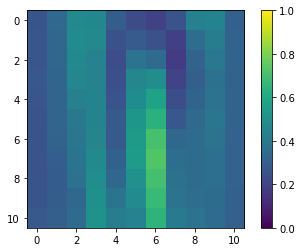

In [ ]:
plt.imshow(lista_htmaps_prom_x_clase_cluster[1][1],vmin=0,vmax=1)
plt.colorbar()

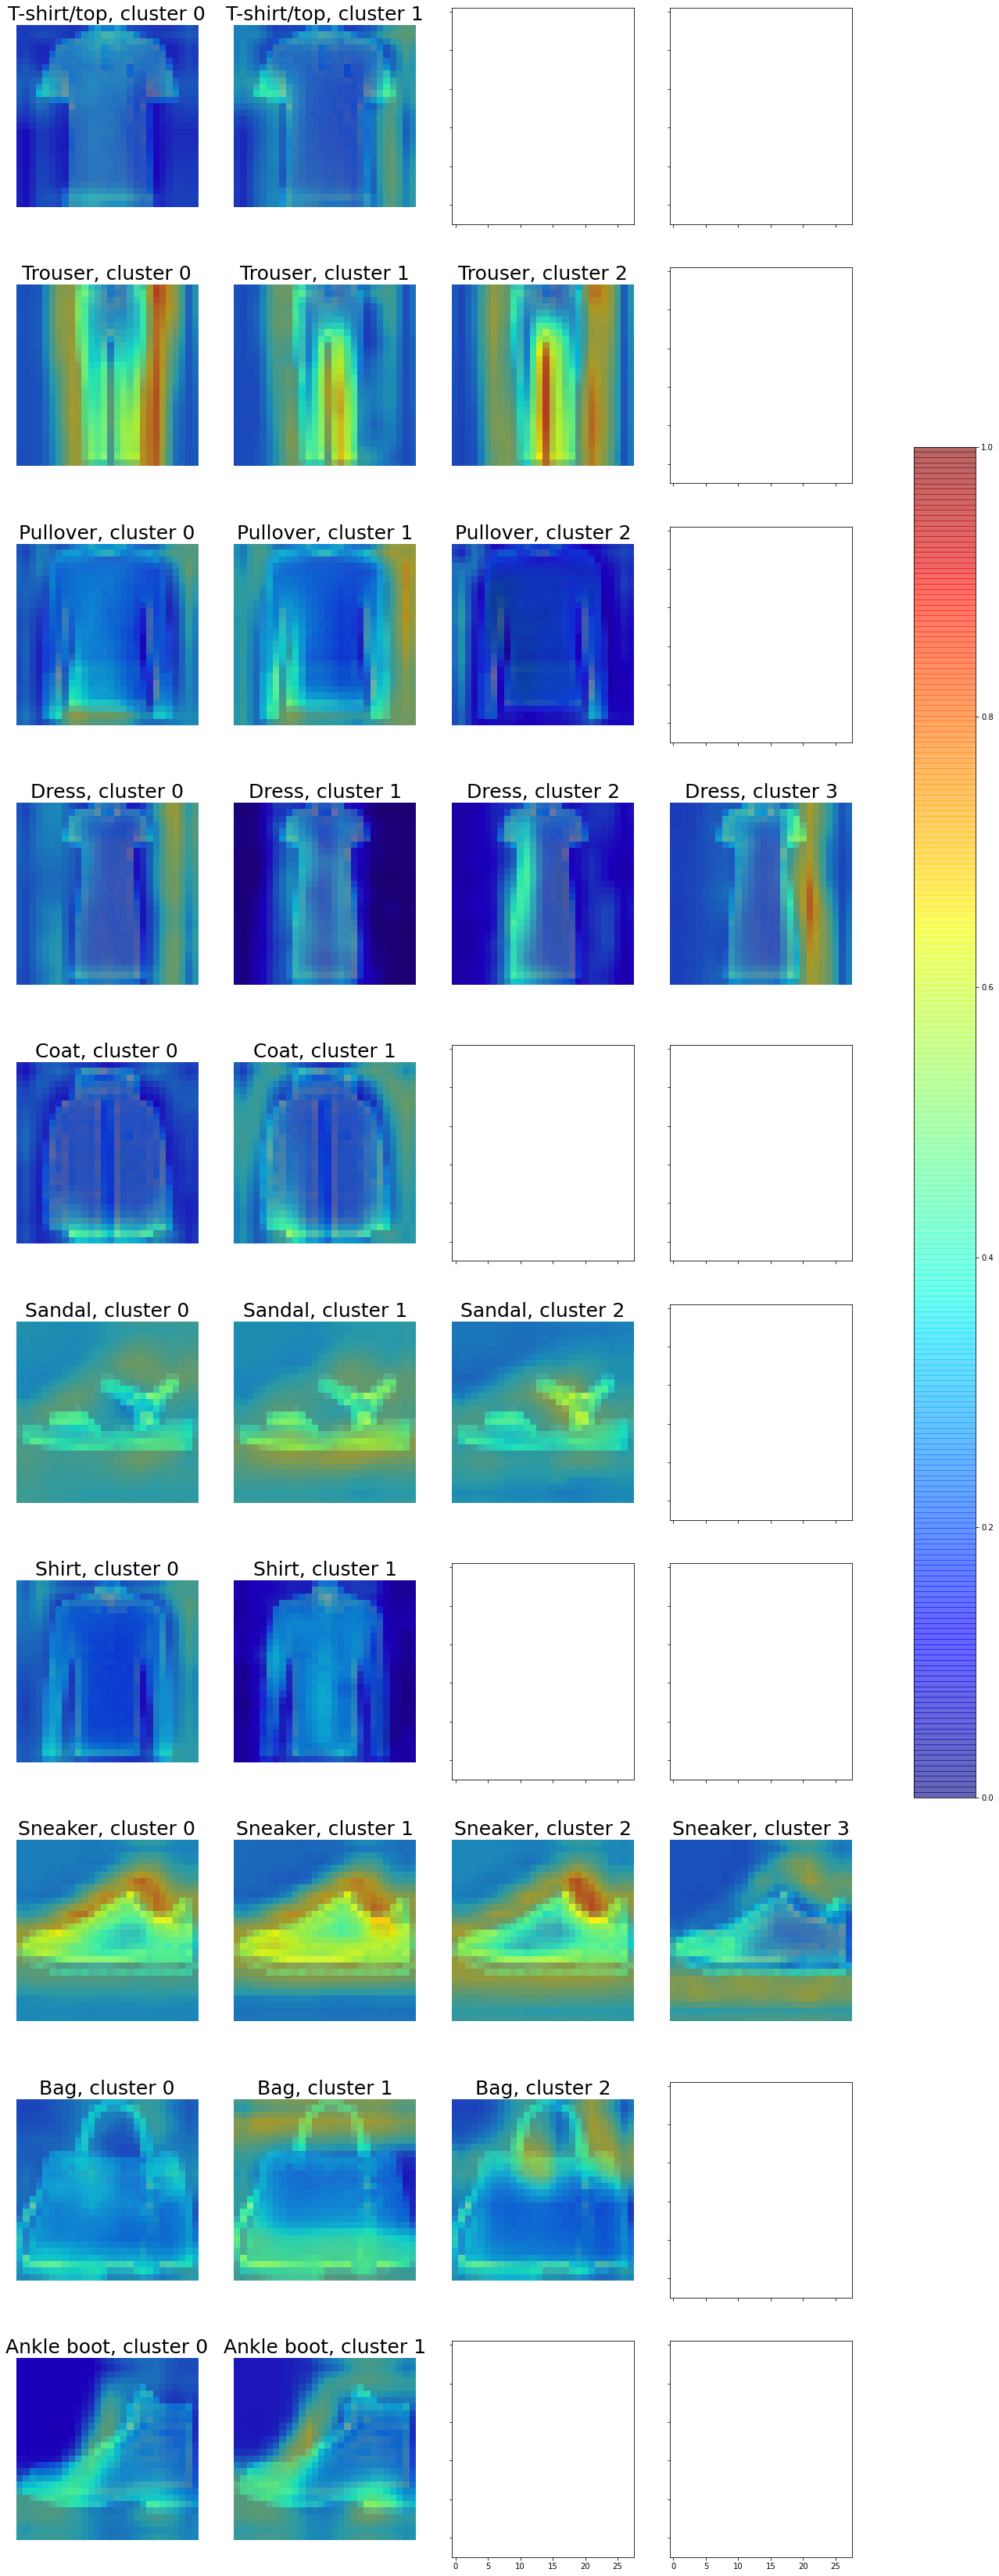

In [ ]:
# Plot de los heatmaps de cada clase
superpuesto = True

# Calculo del nº max de columnas
l_max_cols = []
for htmap_prom_cluster in lista_htmaps_prom_x_clase_cluster:
  l_max_cols.append(len(htmap_prom_cluster))
max_cols= max(l_max_cols)

# Plots
fig, ax = plt.subplots(nrows=num_clases,ncols=max_cols, figsize = (22,15*max_cols),sharex=True,sharey=True)
for clase in range(num_clases):

  for cluster in range(len(lista_htmaps_prom_x_clase_cluster[clase])):
    
    if superpuesto == False:
      ax[clase,cluster].imshow(lista_htmaps_prom_x_clase_cluster[clase][cluster])
      ax[clase,cluster].set_title('{}, cluster {}'.format(class_names[clase],cluster),fontsize=25)
      ax[clase,cluster].axis('off')

    elif superpuesto == True:
      indice_num = buscar_num(clase,0,train_labels[50000:])
      ax[clase,cluster].imshow(train_images[50000:][indice_num[0],:,:,0])
      im = ax[clase,cluster].imshow(resize(lista_htmaps_prom_x_clase_cluster[clase][cluster],(28,28)),alpha = 0.6,cmap='jet',vmin=0,vmax=1) # Guardo la AxesImage para tener el colorbar
      ax[clase,cluster].set_title('{}, cluster {}'.format(class_names[clase],cluster),fontsize=25)
      ax[clase,cluster].axis('off')

fig.subplots_adjust(right=0.80)
cbar_ax = fig.add_axes([0.85, 0.35, 0.05, 0.4])
fig.colorbar(im, cax=cbar_ax)
# fig.colorbar(cm.ScalarMappable(norm= colors.Normalize(vmin=0, vmax=1), cmap='jet'), cax=cbar_ax) con esto pones tu la escala de colores

#fig.colorbar(cm.ScalarMappable(norm=None, cmap='jet'), ax=ax[0,0])


plt.savefig('./Heatmaps_x_clase_y_cluster_{}'.format(modo_heatmaps))

### Calculo y plot de Heatmaps por cuantil

In [ ]:
# Calculo de los heatmaps por cada cluster con CUANTILES (2 segundos)
array_labels_de_cada_cluster                = array_labels_agg_x_clase
lista_htmaps_prom_x_clase_cluster_cuantiles = []
modo                                        = 'cuantiles'
cuantiles                                   = [0,0.25,0.5,0.75,0.99] # SIEMPRE incluir 0 al inicio, que será la propia mediana
for clase in range(num_clases):
  lista_htmaps_prom_x_clase_cluster_cuantiles.append(calculo_htmaps_x_cluster(array_labels_de_cada_cluster[clase],array_heatmaps_train_x_clase[clase],modo=modo,cuantiles=cuantiles))

In [ ]:
# Plot de los heatmaps de cada clase
superpuesto = True

# Calculo del nº max de columnas

n_clusters     = lista_htmaps_prom_x_clase_cluster_cuantiles[clase].shape[0]
n_cuantiles    = lista_htmaps_prom_x_clase_cluster_cuantiles[clase].shape[1]


# Plots
for clase in range(num_clases):

  fig, ax = plt.subplots(nrows=n_clusters,ncols=n_cuantiles, figsize = (25,10),sharex=True,sharey=True)
  for cluster in range(n_clusters):
    for cuantil in range(n_cuantiles):
        
      if superpuesto == False:
        ax[cluster,cuantil].imshow(lista_htmaps_prom_x_clase_cluster_cuantiles[clase][cluster,cuantil])
        ax[cluster,cuantil].set_title('cuantil {}'.format(cuantiles[cuantil]),fontsize=25)

      elif superpuesto == True:
        indice_num = buscar_num(clase,0,train_labels[50000:])
        ax[cluster,cuantil].imshow(train_images[50000:][indice_num[0],:,:,0])
        im = ax[cluster,cuantil].imshow(resize(lista_htmaps_prom_x_clase_cluster_cuantiles[clase][cluster,cuantil],(28,28)),alpha = 0.6,cmap='jet',vmin=0,vmax=1) # Guardo la AxesImage para tener el colorbar
        if cuantil==0:
          ax[cluster,cuantil].set_title('Mediana'.format(cuantiles[cuantil]),fontsize=25)
        else:
          ax[cluster,cuantil].set_title('Cuantil {}'.format(cuantiles[cuantil]),fontsize=25)

  fig.suptitle('Clase {}'.format(class_names[clase]),x=0.1,y=0.55,rotation=90,fontsize=20)
  fig.subplots_adjust(right=0.80)
  cbar_ax = fig.add_axes([0.85, 0.35, 0.05, 0.4])
  fig.colorbar(im, cax=cbar_ax)


  # fig.colorbar(cm.ScalarMappable(norm= colors.Normalize(vmin=0, vmax=1), cmap='jet'), cax=cbar_ax) con esto pones tu la escala de colores

  #fig.colorbar(cm.ScalarMappable(norm=None, cmap='jet'), ax=ax[0,0])

  plt.savefig('./Heatmaps_x_Cuantil_y_Cluster_{}'.format(clase))
  plt.close(fig)

fig , axs = plt.subplots(nrows=num_clases,ncols=1,constrained_layout=True, figsize=(25, 85))
fig.suptitle('Plot de cada cuantil de cada cluster de cada clase',y=0.995,fontsize=20)
for i_fig in range(num_clases):

  plot = io.imread('./Heatmaps_x_Cuantil_y_Cluster_{}.png'.format(i_fig))/255.0
  axs[i_fig].imshow(plot,vmin=0,vmax=1)
  axs[i_fig].axis("off")

plt.savefig('./Heatmaps_x_Cuantil_y_Cluster_Completo')

Output hidden; open in https://colab.research.google.com to view.

### Thresholding de htmaps

In [ ]:
# Funcion que minimiza la similaridad entre los heatmaps de una clase para obtener asi el threshold adecuado

# Definimos los minimos y maximos posibles del threshold
min_thr = np.max(np.min(np.min(lista_htmaps_prom_x_clase_cluster[0],axis=2),axis=1))
max_thr = np.min(np.max(np.max(lista_htmaps_prom_x_clase_cluster[0],axis=2),axis=1))
thr_ini = (np.mean(lista_htmaps_prom_x_clase_cluster[0][0]))
bounds = (min_thr,max_thr)

res = minimize_scalar(similaridad, thr_ini ,args=(lista_htmaps_prom_x_clase_cluster[2]), bounds=bounds, method='bounded')
res.x

0.1880962117490695

In [ ]:
# Creamos el array con los thresholds
array_thresholds = np.zeros((num_clases))

for clase in range(num_clases):
  # Definimos los minimos y maximos posibles del threshold, la aproximacion inicial y el limite del valor de threshold
  min_thr = np.max(np.min(np.min(lista_htmaps_prom_x_clase_cluster[clase],axis=2),axis=1))
  max_thr = np.min(np.max(np.max(lista_htmaps_prom_x_clase_cluster[clase],axis=2),axis=1))
  thr_ini = (np.median(lista_htmaps_prom_x_clase_cluster[clase][0]))
  bounds = (min_thr,max_thr)
  

  res = minimize_scalar(similaridad, thr_ini ,args=(lista_htmaps_prom_x_clase_cluster[clase]), bounds=bounds, method='bounded')
  array_thresholds[clase] = res.x

  # Si solo hay un cluster, he cogido el valor mediana
  if lista_htmaps_prom_x_clase_cluster[clase].shape[0] == 1:
    array_thresholds[clase] = thr_ini

In [ ]:
# Aplicamos el threshold a cada clase

# Copiamos a una nueva lista los arrays para no modificarlos
lista_htmaps_prom_x_clase_cluster_threshold = []
for i,clusters in enumerate(lista_htmaps_prom_x_clase_cluster):
  lista_htmaps_prom_x_clase_cluster_threshold.append(clusters.copy())

for clase in range(num_clases):
  for i in range(len(lista_htmaps_prom_x_clase_cluster_threshold[clase])):
    
    # Aplicamos el threshold a cada centroide
    lista_htmaps_prom_x_clase_cluster_threshold[clase][i] = aplicar_threshold_a_htmap(np.copy(lista_htmaps_prom_x_clase_cluster_threshold[clase][i].copy()),array_thresholds[clase])


### Plot heatmaps thresholdeados por cluster

In [ ]:
plt.imshow(lista_htmaps_prom_x_clase_cluster_threshold[5][0])

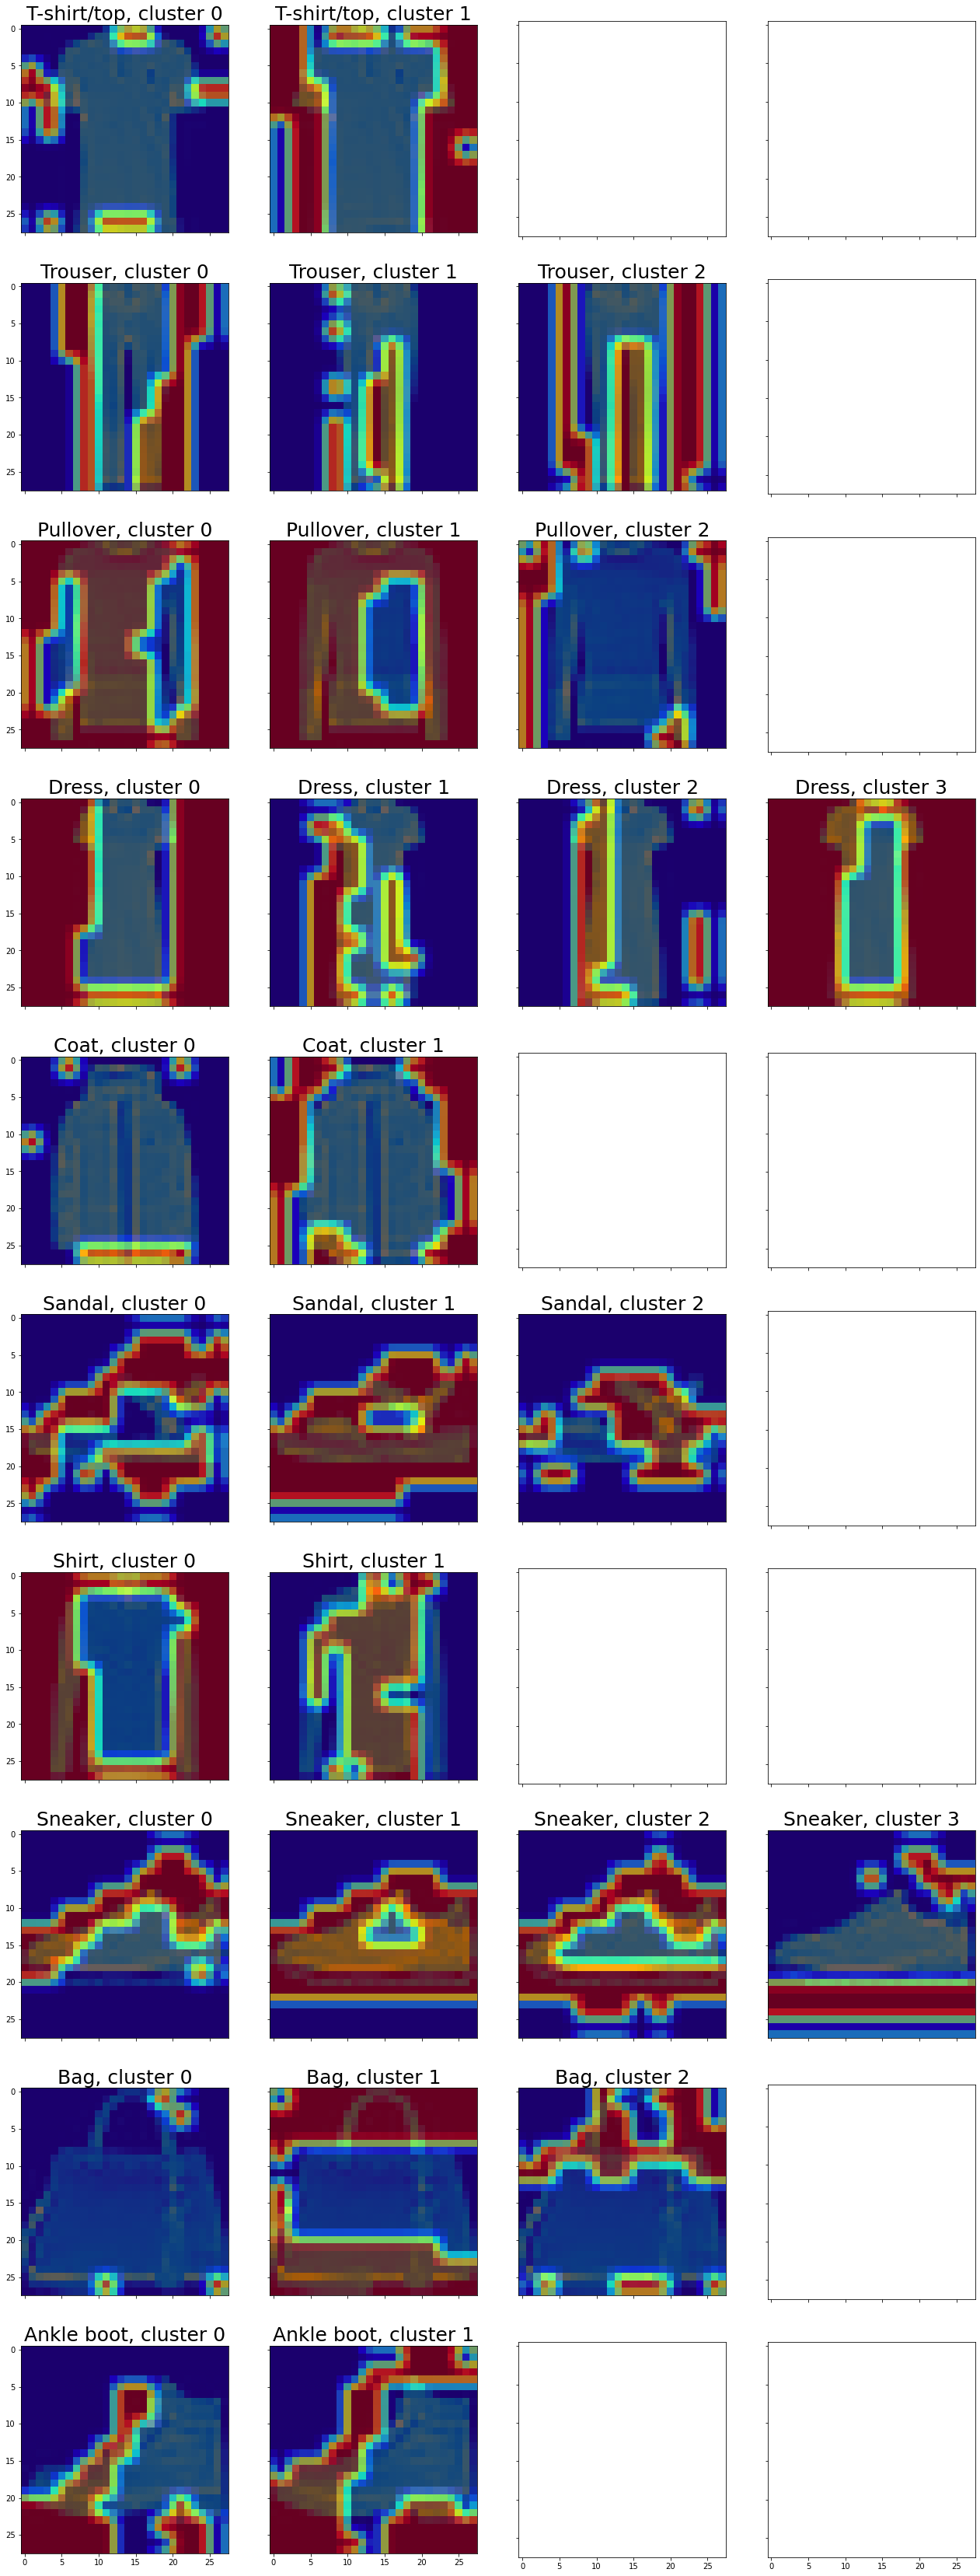

In [ ]:
# Plot de los heatmaps de cada clase

superpuesto = True

# Calculo del nº max de columnas
l_max_cols = []
for htmap_prom_cluster in lista_htmaps_prom_x_clase_cluster_threshold:
  l_max_cols.append(len(htmap_prom_cluster))
max_cols= max(l_max_cols)

# Plots
fig, ax = plt.subplots(nrows=num_clases,ncols=max_cols, figsize = (22,60),sharex=True,sharey=True)
for clase in range(num_clases):

  for cluster in range(len(lista_htmaps_prom_x_clase_cluster_threshold[clase])):
    
    if superpuesto == False:
      ax[clase,cluster].imshow(lista_htmaps_prom_x_clase_cluster_threshold[clase][cluster])
      ax[clase,cluster].set_title('{}, cluster {}'.format(class_names[clase],cluster),fontsize=25)
    elif superpuesto == True:
      indice_num = buscar_num(clase,0,train_labels[50000:])
      ax[clase,cluster].imshow(train_images[50000:][indice_num[0],:,:,0])
      ax[clase,cluster].imshow(resize(lista_htmaps_prom_x_clase_cluster_threshold[clase][cluster],(28,28)),alpha = 0.6,cmap='jet',vmin=0,vmax=1)
      ax[clase,cluster].set_title('{}, cluster {}'.format(class_names[clase],cluster),fontsize=25)
    
plt.savefig('./htmaps_x_clase_x_cluster_para_AgglomerativeClustering_linkageComplete,distance_threshold_0-75_thresholdeados')

## Fase de inferencia


### Calculo SSIM o MSE para imagenes con los diferentes métodos

In [ ]:
# Calculamos los heatmaps de imagenes de test (3 mins aprox)
predicciones_train = np.argmax(model.predict(train_images_shuffled[50000:]),axis=1)
array_htmaps_train = calculo_htmaps(train_images_shuffled[50000:],predicciones_train)

In [ ]:
# Calculo del SSIM contra el htmap prom o mediana de su clase predicha
array_ssim_x_imagen_train = calculo_ssim_prom_med(array_htmaps_train,predicciones_train,lista_htmaps_prom_x_clase)

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente CLUSTER
array_ssim_x_imagen_train = calculo_ssim(array_htmaps_train,predicciones_train,lista_htmaps_prom_x_clase_cluster)

In [ ]:
# MSE
array_ssim_x_imagen_train = calculo_mse(array_htmaps_train,predicciones_train,lista_htmaps_prom_x_clase_cluster)

In [ ]:
# SSIM o MSE para el heatmap más cercano del cluster más cercano (17 mins aprox para 10.000 imagenes)
array_labels_de_cada_cluster = array_labels_agg_x_clase
metodo = 'ssim'
array_ssim_x_imagen_train = calculo_distancia_htmap_cercano(array_htmaps_train,predicciones_train,lista_htmaps_prom_x_clase_cluster,array_heatmaps_train_x_clase,array_labels_de_cada_cluster,metodo=metodo)
array_copia_seg_train = array_ssim_x_imagen_train.copy()

In [ ]:
# SSIM o MSE para los CUANTILES definidos del cluster más cercano (25s)
metodo = 'ssim'
array_ssim_x_imagen_train = calculo_distancia_htmap_cuantiles(array_htmaps_train,predicciones_train,lista_htmaps_prom_x_clase_cluster_cuantiles,metodo=metodo)

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente con REESCALADO (10s)
array_ssim_x_imagen_train = calculo_ssim_reescalado(array_htmaps_train,predicciones_train,lista_htmaps_prom_x_clase_cluster)

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente con REESCALADO (10s) pero se reescala el input
array_ssim_x_imagen_train,array_htmaps_train_reesc = calculo_ssim_reescalado_a_input(array_htmaps_train,predicciones_train,lista_htmaps_prom_x_clase_cluster)

In [ ]:
df_ssim_x_imagen_train = pd.DataFrame(array_ssim_x_imagen_train,columns=['SSIM','Clase_pred'])

Calculo de SSIM para imagenes test

In [ ]:
# Calculamos los heatmaps de imagenes de test (3 mins aprox)
predicciones_test = np.argmax(model.predict(test_images),axis=1)
array_htmaps_test = calculo_htmaps(test_images,predicciones_test)

In [ ]:
# Calculo del SSIM contra el htmap prom o mediana de su clase predicha
array_ssim_x_imagen_test = calculo_ssim_prom_med(array_htmaps_test,predicciones_test,lista_htmaps_prom_x_clase)

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente CLUSTER
array_ssim_x_imagen_test = calculo_ssim(array_htmaps_test,predicciones_test,lista_htmaps_prom_x_clase_cluster)

In [ ]:
# MSE
array_ssim_x_imagen_test = calculo_mse(array_htmaps_test,predicciones,lista_htmaps_prom_x_clase_cluster)

In [ ]:
# SSIM o MSE para el heatmap más cercano del cluster más cercano (17 mins aprox para 10.000 imagenes)
array_labels_de_cada_cluster = array_labels_agg_x_clase
metodo = 'ssim'
array_ssim_x_imagen_test = calculo_distancia_htmap_cercano(array_htmaps_test,predicciones_test,lista_htmaps_prom_x_clase_cluster,array_heatmaps_train_x_clase,array_labels_de_cada_cluster,metodo=metodo)
array_copia_seg_test = array_ssim_x_imagen_test.copy()

In [ ]:
# SSIM o MSE para los CUANTILES definidos del cluster más cercano (25s)
metodo = 'ssim'
array_ssim_x_imagen_test = calculo_distancia_htmap_cuantiles(array_htmaps_test,predicciones_test,lista_htmaps_prom_x_clase_cluster_cuantiles,metodo=metodo)

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente con REESCALADO
array_ssim_x_imagen_test = calculo_ssim_reescalado(array_htmaps_test,predicciones_test,lista_htmaps_prom_x_clase_cluster)

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente con REESCALADO pero se reescala el input
array_ssim_x_imagen_test,array_htmaps_test_reesc = calculo_ssim_reescalado_a_input(array_htmaps_test,predicciones_test,lista_htmaps_prom_x_clase_cluster)

In [ ]:
df_ssim_x_imagen_test = pd.DataFrame(array_ssim_x_imagen_test,columns=['SSIM','Clase_pred'])

Calculo para MNIST como Out-Distribution


In [ ]:
mnist = keras.datasets.mnist

(f_train_images, f_train_labels), (f_test_images, f_test_labels) = mnist.load_data()

#Reducimos el rango de los valores a entre 0 y 1
f_train_images = f_train_images/255
f_test_images = f_test_images/255

#Añadimos la informacion de que se trata de un solo canal (y no 3 como en el caso de RGB)
f_train_images = f_train_images.reshape(60000,28,28,1)
f_train_images = f_train_images.astype('float32')

f_test_images = f_test_images.reshape(10000,28,28,1)
f_test_images = f_test_images.astype('float32')

# One hot encoding
f_train_labels = to_categorical(f_train_labels)
f_test_labels = to_categorical(f_test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Calculamos los heatmaps de imagenes de test (3 mins aprox para 10.000 imagenes)
predicciones_mnist = np.argmax(model.predict(f_test_images),axis=1)
array_htmaps_mnist = calculo_htmaps(f_test_images,predicciones_mnist)

In [ ]:
# Calculo del SSIM contra el htmap prom o mediana de su clase predicha
array_ssim_x_imagen_mnist = calculo_ssim_prom_med(array_htmaps_mnist,predicciones_mnist,lista_htmaps_prom_x_clase)

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente CLUSTER
array_ssim_x_imagen_mnist = calculo_ssim(array_htmaps_mnist,predicciones_mnist,lista_htmaps_prom_x_clase_cluster)

In [ ]:
# MSE
array_ssim_x_imagen_mnist = calculo_mse(array_htmaps_mnist,predicciones_mnist,lista_htmaps_prom_x_clase_cluster)

In [ ]:
# SSIM o MSE para el heatmap más cercano del cluster más cercano (17 mins aprox para 10.000 imagenes)
array_labels_de_cada_cluster = array_labels_agg_x_clase
metodo = 'ssim'
array_ssim_x_imagen_mnist = calculo_distancia_htmap_cercano(array_htmaps_mnist,predicciones_mnist,lista_htmaps_prom_x_clase_cluster,array_heatmaps_train_x_clase,array_labels_de_cada_cluster,metodo=metodo)
array_copia_seg_mnist = array_ssim_x_imagen_mnist.copy()

In [ ]:
# SSIM o MSE para los CUANTILES definidos del cluster más cercano (25s)
metodo = 'ssim'
array_ssim_x_imagen_mnist = calculo_distancia_htmap_cuantiles(array_htmaps_mnist,predicciones_mnist,lista_htmaps_prom_x_clase_cluster_cuantiles,metodo=metodo)

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente con REESCALADO
array_ssim_x_imagen_mnist = calculo_ssim_reescalado(array_htmaps_mnist,predicciones_mnist,lista_htmaps_prom_x_clase_cluster)

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente con REESCALADO pero se reescala el input
array_ssim_x_imagen_mnist,array_htmaps_mnist_reesc = calculo_ssim_reescalado_a_input(array_htmaps_mnist,predicciones_mnist,lista_htmaps_prom_x_clase_cluster)

In [ ]:
df_ssim_x_imagen_mnist = pd.DataFrame(array_ssim_x_imagen_mnist,columns=['SSIM','Clase_pred'])

### Calculo SSIM o Hamming para imagenes con thresholds


In [ ]:
# Calculamos los heatmaps de imagenes de test (3 mins aprox)
predicciones_train = np.argmax(model.predict(train_images[50000:]),axis=1)
array_htmaps_train = calculo_htmaps(train_images[50000:],predicciones_train)

In [ ]:
# Calculamos los heatmaps thresholdeados
array_htmaps_train_thr = array_htmaps_train.copy()
for i in range(array_htmaps_train_thr.shape[0]):
  array_htmaps_train_thr[i] = aplicar_threshold_a_htmap(array_htmaps_train_thr[i],array_thresholds[predicciones_train[i]])

In [ ]:
# Calculo de distancia Hamming en vez de ssim
array_hamming_x_imagen_train = distancia_hamming(array_htmaps_train_thr,predicciones_train,lista_htmaps_prom_x_clase_cluster_threshold)
df_ssim_x_imagen_train = pd.DataFrame(array_hamming_x_imagen_train,columns=['SSIM','Clase_pred'])

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente (6 segs)
array_ssim_x_imagen_train_thr = calculo_ssim_threshold(array_htmaps_train,predicciones_train,lista_htmaps_prom_x_clase_cluster_threshold,array_thresholds)

In [ ]:
df_ssim_x_imagen_train = pd.DataFrame(array_ssim_x_imagen_train_thr,columns=['SSIM','Clase_pred'])

Calculo de SSIM para imagenes test

In [ ]:
# Calculamos los heatmaps de imagenes de test (3 mins aprox)
predicciones_test = np.argmax(model.predict(test_images),axis=1)
array_htmaps_test = calculo_htmaps(test_images,predicciones_test)

In [ ]:
# Calculamos los heatmaps thresholdeados
array_htmaps_test_thr = array_htmaps_test.copy()
for i in range(array_htmaps_test_thr.shape[0]):
  array_htmaps_test_thr[i] = aplicar_threshold_a_htmap(array_htmaps_test_thr[i],array_thresholds[predicciones_test[i]])

In [ ]:
# Calculo de distancia Hamming en vez de ssim
array_hamming_x_imagen_test = distancia_hamming(array_htmaps_test_thr,predicciones_test,lista_htmaps_prom_x_clase_cluster_threshold)
df_ssim_x_imagen_test = pd.DataFrame(array_hamming_x_imagen_test,columns=['SSIM','Clase_pred'])

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente
array_ssim_x_imagen_test_thr = calculo_ssim_threshold(array_htmaps_test,predicciones_test,lista_htmaps_prom_x_clase_cluster_threshold,array_thresholds)

In [ ]:
df_ssim_x_imagen_test = pd.DataFrame(array_ssim_x_imagen_test_thr,columns=['SSIM','Clase_pred'])

Calculo para MNIST como Out-Distribution


In [ ]:
mnist = keras.datasets.mnist

(f_train_images, f_train_labels), (f_test_images, f_test_labels) = mnist.load_data()

#Reducimos el rango de los valores a entre 0 y 1
f_train_images = f_train_images/255
f_test_images = f_test_images/255

#Añadimos la informacion de que se trata de un solo canal (y no 3 como en el caso de RGB)
f_train_images = f_train_images.reshape(60000,28,28,1)
f_train_images = f_train_images.astype('float32')

f_test_images = f_test_images.reshape(10000,28,28,1)
f_test_images = f_test_images.astype('float32')

# One hot encoding
f_train_labels = to_categorical(f_train_labels)
f_test_labels = to_categorical(f_test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Calculamos los heatmaps de imagenes de test (3 mins aprox para 10.000 imagenes)
predicciones_mnist = np.argmax(model.predict(f_test_images),axis=1)
array_htmaps_mnist = calculo_htmaps(f_test_images,predicciones_mnist)

In [ ]:
# Calculamos los heatmaps thresholdeados
array_htmaps_mnist_thr = array_htmaps_mnist.copy()
for i in range(array_htmaps_mnist_thr.shape[0]):
  array_htmaps_mnist_thr[i] = aplicar_threshold_a_htmap(array_htmaps_mnist_thr[i],array_thresholds[predicciones_mnist[i]])

In [ ]:
# Calculo de distancia Hamming en vez de ssim
array_hamming_x_imagen_mnist = distancia_hamming(array_htmaps_mnist_thr,predicciones_mnist,lista_htmaps_prom_x_clase_cluster_threshold)
df_ssim_x_imagen_mnist = pd.DataFrame(array_hamming_x_imagen_mnist,columns=['SSIM','Clase_pred'])

In [ ]:
# Calculamos el SSIM de cada htmap contra su correspondiente
array_ssim_x_imagen_mnist_thr = calculo_ssim_threshold(array_htmaps_mnist_thr,predicciones_mnist,lista_htmaps_prom_x_clase_cluster_threshold,array_thresholds)

In [ ]:
df_ssim_x_imagen_mnist = pd.DataFrame(array_ssim_x_imagen_mnist_thr,columns=['SSIM','Clase_pred'])

### Generacion de thresholds y  comprobación de OOD


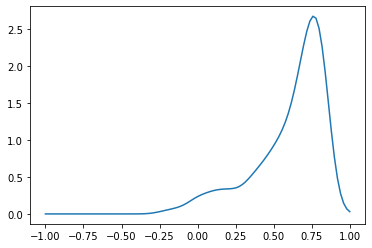

In [ ]:
kde_sci_pruebas = stats.gaussian_kde(np.array(df_ssim_x_imagen_train['SSIM'].loc[df_ssim_x_imagen_train['Clase_pred']==1]))
x = np.linspace(-1,1,100)
array_pdf_logpdf = np.zeros((x.shape))
for i,x_0 in enumerate(x):
  array_pdf_logpdf[i] = (kde_sci_pruebas.pdf(x_0))

plt.plot(x,array_pdf_logpdf)

In [ ]:
# Genera el threshold adecuado para cada clase en funcion de un TPR (True Positive Rate) que queramos conseguir.
# El TPR es el porcentaje de imagenes de la In-Distribution que se clasificarán como True (que efectivamente son de la In-D)

tpr_ini         = 0.95
modo_de_calculo = 'SSIM'
lista_kde_thr_x_clase = calculo_kde_thresholds(tpr,df_ssim_x_imagen_train,modo=modo_de_calculo)

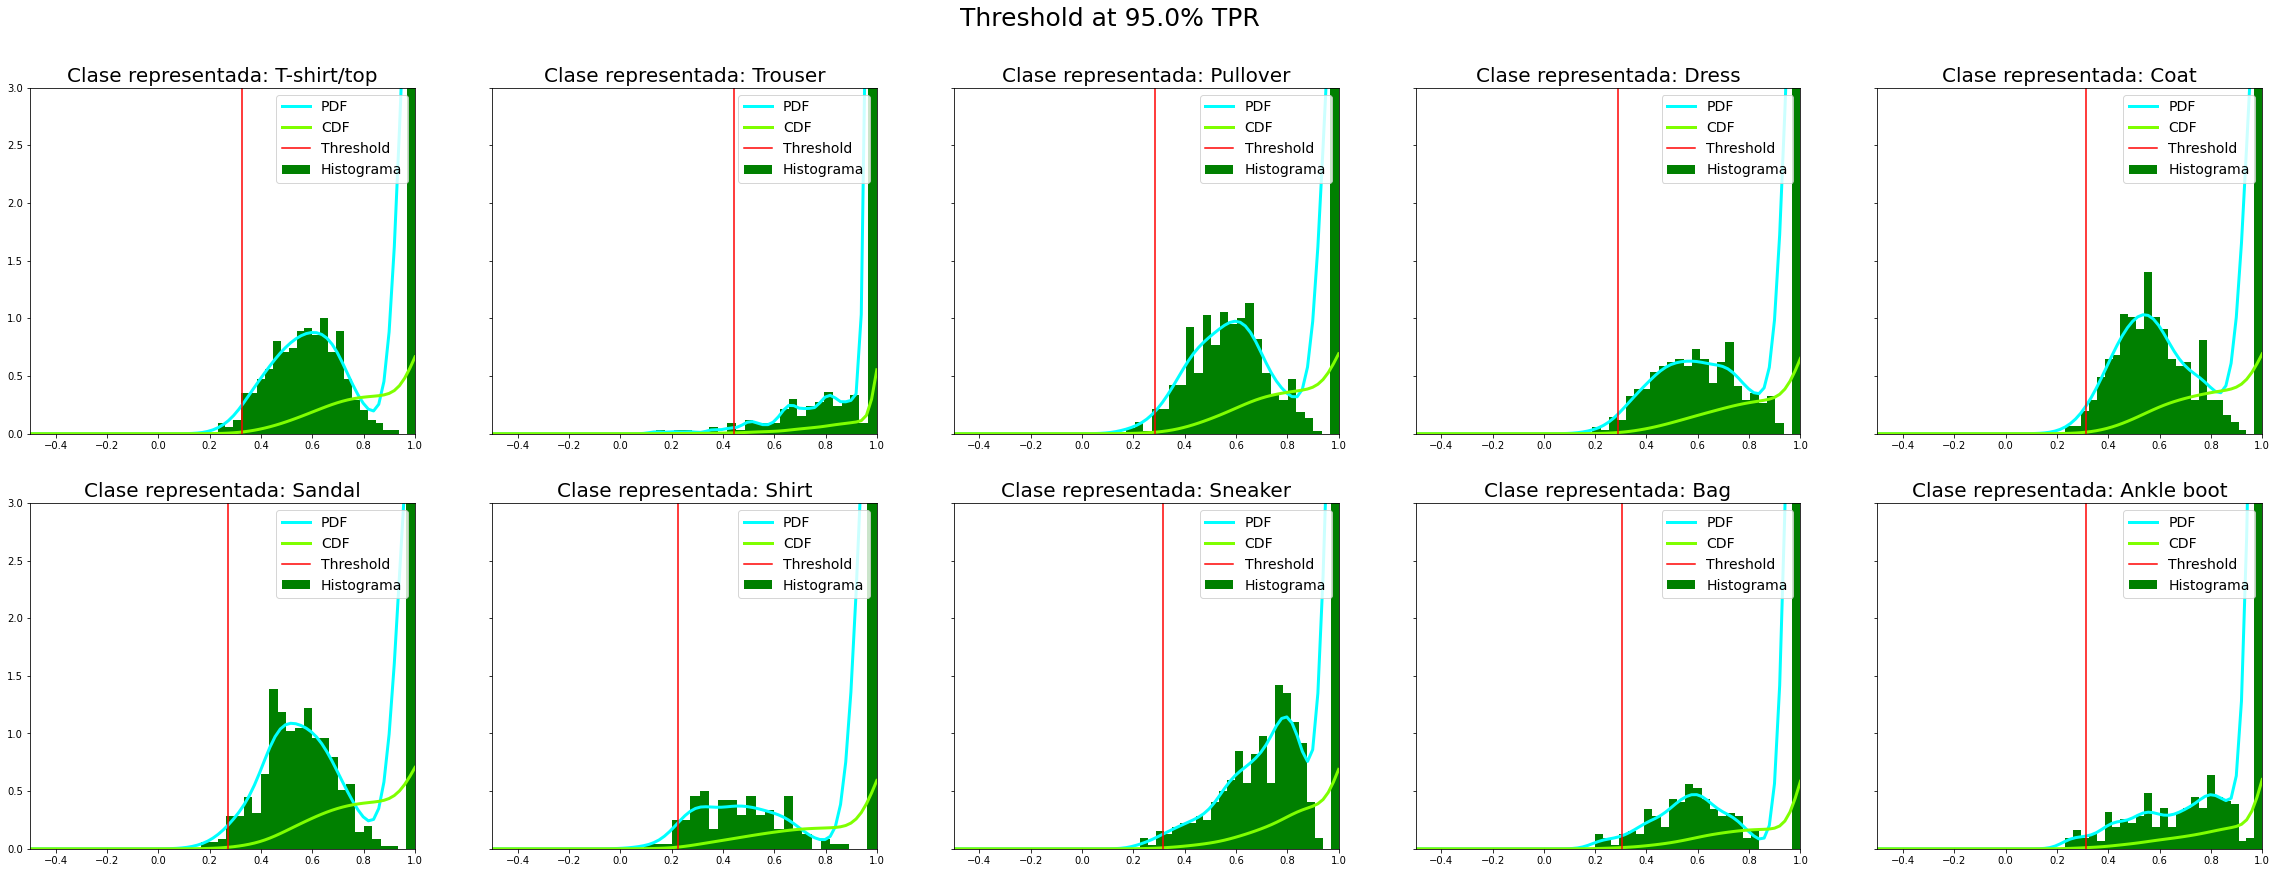

In [ ]:
# Funcion que representa el threshold 

# Elegimos
df_plot = df_ssim_x_imagen_train

x = np.linspace(-1,1,100)
y = np.linspace(1,-1,100)

fig, ax = plt.subplots(2,5,sharey=True,figsize=(40,14))
fig.suptitle('Threshold at {}% TPR'.format(tpr_ini*100), fontsize=25,y=0.96)

for num in range(10):

  # KDE fitting
  kde_sci = lista_kde_thr_x_clase[num][0]
  cdf = []
  for i in x:
    cdf.append(kde_sci.integrate_box_1d(-1,i))
  
  # Definicion de i y j para plotear bien
  i=0
  j=num
  if num >= 5:
    i = 1
    j = num-5

  # Plots de KDE
  ax[i,j].set_xlim((-0.5,1))
  ax[i,j].set_ylim((0,3))
  ax[i,j].hist(df_plot['SSIM'].loc[df_plot['Clase_pred']==num], density=True,bins=25,color='green',label='Histograma')
  
  ax[i,j].plot(x, kde_sci.pdf(x), lw=3, label='PDF', color='cyan',zorder=1)
  ax[i,j].plot(x, cdf, lw=3, label='CDF', color='chartreuse',zorder=2)
  ax[i,j].set_title('Clase representada: {}'.format(class_names[num]),fontsize=20)
  ax[i,j].axvline(x=lista_kde_thr_x_clase[num][1], ymin=0, ymax=1,color='red',label='Threshold')

  ax[i,j].legend(fontsize=14, loc='upper right')


## Metricas

### Generacion de datos necesarios para las metricas independientes del threshold (Test_images VS Out-Distribution)

In [ ]:
# Calculo de los thresholds que se van a emplear para las metricas independientes del threshold (50s)

# Eleccion del DataFrame que se va a usar para generar los KDEs (DEBE SER TRAIN)
df_kde = df_ssim_x_imagen_train

# Inicializar array con todos los tprs y la lista con los thresholds 
array_full_tpr                = np.linspace(0,0.99,100)
array_full_thresholds         = np.zeros((len(array_full_tpr),num_clases))
array_thresholds_cols_to_rows = np.zeros(())

for ind,true_positive_rate in enumerate(array_full_tpr):

  lista_kde_threshold_variando = calculo_kde_thresholds(true_positive_rate,df_kde,modo_de_calculo)
  
  array_thresholds_cols_to_rows = np.zeros((num_clases))
  for i,kde_thr in enumerate(lista_kde_threshold_variando):
    array_thresholds_cols_to_rows[i] = kde_thr[1]
  
  array_full_thresholds[ind] = array_thresholds_cols_to_rows

In [ ]:
# Generacion de array sobre la In-Distribution con valores True o False sobre si son (True) o no (False) parte de la distribucion 
# Inicializaciones
array_InD              = array_ssim_x_imagen_test
preds_InD              = predicciones_test
array_InD_x_threshold  = np.empty((len(array_InD),len(array_full_tpr)),dtype=bool)

# Progress bar
bar = progressbar.ProgressBar(maxval=len(lista_thresholds),widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.SimpleProgress()])
bar.start()
n = 0

# Inicializamos el tiempo
t3 = timeit.default_timer() 
for i_thr,threshold in enumerate(array_full_thresholds):

  for i_imagen,ssim_calculado in enumerate(array_InD):
    array_InD_x_threshold[i_imagen,i_thr] = comprobacion_OOD(ssim_calculado[0],lista_kde_threshold[preds_InD[i_imagen]],threshold[preds_InD[i_imagen]])

  bar.update(n)
  n = n+1

df_InD = pd.DataFrame(array_InD_x_threshold)

t4 = timeit.default_timer() 
print('\nThresholds time: {}'.format(t4 - t3))
print('Fin')

[================================================================   ] 97 of 100


Thresholds time: 1.2394895839970559
Fin


In [ ]:
# Generacion de array sobre la Out-Distribution con valores True o False sobre si son (True) o no (False) parte de la distribucion ( s aprox)

# Inicializaciones
array_OutD              = array_ssim_x_imagen_mnist
preds_OutD              = predicciones_mnist
array_OutD_x_threshold  = np.zeros((len(array_OutD),len(array_full_tpr)),dtype=bool)

# Progress bar
bar = progressbar.ProgressBar(maxval=len(lista_thresholds),widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.SimpleProgress()])
bar.start()
n = 0

# Inicializamos el tiempo
t3 = timeit.default_timer() 
for i_thr,threshold in enumerate(array_full_thresholds):

  for i_imagen,ssim_calculado in enumerate(array_OutD):
    array_OutD_x_threshold[i_imagen,i_thr] = comprobacion_OOD(ssim_calculado[0],lista_kde_threshold[preds_OutD[i_imagen]],threshold[preds_OutD[i_imagen]])

  bar.update(n)
  n = n+1

df_OutD = pd.DataFrame(array_OutD_x_threshold)

t4 = timeit.default_timer() 
print('\nThresholds time: {}'.format(t4 - t3))
print('Fin')

[================================================================== ] 99 of 100


Thresholds time: 1.2385778719981317
Fin


### AUROC

In [ ]:
# Creacion de un array con el TPR y el FPR

# Inicializar array
array_TPR_FPR_x_threshold = np.empty((len(df_InD.columns),2))

for i,thr in enumerate(df_InD.columns):

  # Por cada threshold sacamos los que son True y False de cada distribucion
  values_InD  = df_InD[thr].value_counts()
  values_OutD = df_OutD[thr].value_counts()
  
  try:
    tp  = values_InD[True]
  except:
    tp = 0  
  try:
    fn  = values_InD[False]
  except:
    fn = 0
  tpr = tp/(tp+fn)

  try:
    fp = values_OutD[True]
  except:
    fp = 0
  tn = values_OutD[False]
  fpr = fp/(fp+tn)

  #print((tp+fn),(fp+tn))
  array_TPR_FPR_x_threshold[i] = np.array([tpr,fpr])

array_TPR_FPR_x_threshold = np.append(array_TPR_FPR_x_threshold,np.reshape(np.array([1,1]),(1,2)),axis=0) # He añadido para cerrar la curva

In [ ]:
# Calculo del AUC
auc = np.trapz(array_TPR_FPR_x_threshold[:,0], array_TPR_FPR_x_threshold[:,1])

# Plot
plt.figure(figsize=(15,12))
plt.plot(array_TPR_FPR_x_threshold[:,1],array_TPR_FPR_x_threshold[:,0],label='Curva ROC',lw=3)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),'k--',label='Curva ROC aleatoria')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('FPR',fontsize=20)
plt.ylabel('TPR',fontsize=20)
plt.title('ROC curve, AUC = %.3f'%auc,fontsize=25,pad=10)
plt.fill_between(array_TPR_FPR_x_threshold[:,1],array_TPR_FPR_x_threshold[:,0],alpha=0.3)
plt.legend(fontsize=18)
plt.savefig('/content/AUROC_Fashion_vs_MNIST')

### AUPR


In [ ]:
# Calculo de la Precision (tp/(tp+fp)) y el Recall (tp/(tp+fn))

# Inicializar array
array_Prec_Recall_x_threshold = np.empty((len(df_InD.columns),2))

for i,thr in enumerate(df_InD.columns):

  # Por cada threshold sacamos los que son True y False de cada distribucion
  values_InD  = df_InD[thr].value_counts()
  values_OutD = df_OutD[thr].value_counts()

  try:
    tp  = values_InD[True]
  except:
    tp = 0
  try:
    fp = values_OutD[True]
  except:
    fp = 0
  try:
    prec = tp/(tp+fp)
  except:
    prec = 1

  try:
    fn = values_InD[False]
  except:
    fn = 0
  recal_tpr = tp/(tp+fn)

  array_Prec_Recall_x_threshold[i] = np.array([prec,recal_tpr])

array_Prec_Recall_x_threshold[0] = np.array([1,0])
#lista_Prec_Recall_x_threshold.append([1,0])

In [ ]:
# Calculo del AUPR
aupr = np.trapz(array_Prec_Recall_x_threshold[:,0], array_Prec_Recall_x_threshold[:,1])

# Plot
plt.figure(figsize=(15,12))
plt.plot(array_Prec_Recall_x_threshold[:,1],array_Prec_Recall_x_threshold[:,0],label='Curva PR',lw=3)
#plt.plot(np.linspace(0,1,100),np.linspace(1,0.5,100),'k--',label='Curva ROC aleatoria')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.title('Precision-Recall curve, AUPR = %.3f'%aupr,fontsize=25,pad=10)
plt.fill_between(array_Prec_Recall_x_threshold[:,1],array_Prec_Recall_x_threshold[:,0],alpha=0.3)
plt.legend()
plt.savefig('/content/AUPR_Fashion_vs_MNIST')

### FPR at X%TPR

In [ ]:
# Voy a hacer un grafico por clase como el de ODIN

In [ ]:
'FPR at 95% TPR'
pd.DataFrame(array_TPR_FPR_x_threshold,columns=['TPR','FPR']).to_csv(path_or_buf='./TPR_FPR_por_cada_threshold.csv', sep=',', na_rep='')
pd.DataFrame(array_Prec_Recall_x_threshold,columns=['Precision','Recall']).to_csv(path_or_buf='./Precision_Recall_por_cada_threshold.csv', sep=',', na_rep='')

### Distribucion SSIM para instancias de test vs Out-Distribution

In [ ]:
def diferencia_cdf(x,kde_ascending,kde_descending):

  cdf_ascending = []
  x_0 = np.linspace(-1,1,100)
  for i in x_0:
    cdf_ascending.append(kde_ascending.integrate_box_1d(-1,i))

  y_0 = x_0[::-1]
  cdf_descending = []
  for i in y_0:
    cdf_descending.append(kde_descending.integrate_box_1d(i,1))

  diferencia = cdf_ascending[int(x)] - cdf_descending[int(99-x)]
  
  return abs(diferencia)

In [ ]:
df_ssim_x_imagen_train.median()

SSIM          1.0
Clase_pred    4.0
dtype: float64

In [ ]:
df_ssim_x_imagen_test.median()

SSIM          0.686181
Clase_pred    4.000000
dtype: float64

In [ ]:
df_ssim_x_imagen_mnist.median()

SSIM          0.401744
Clase_pred    5.000000
dtype: float64

In [ ]:
# Para que funcione el codigo de debajo
df_comp        = df_ssim_x_imagen_test # Plot verde
df_comp_gir    = df_ssim_x_imagen_mnist # Plot rojo

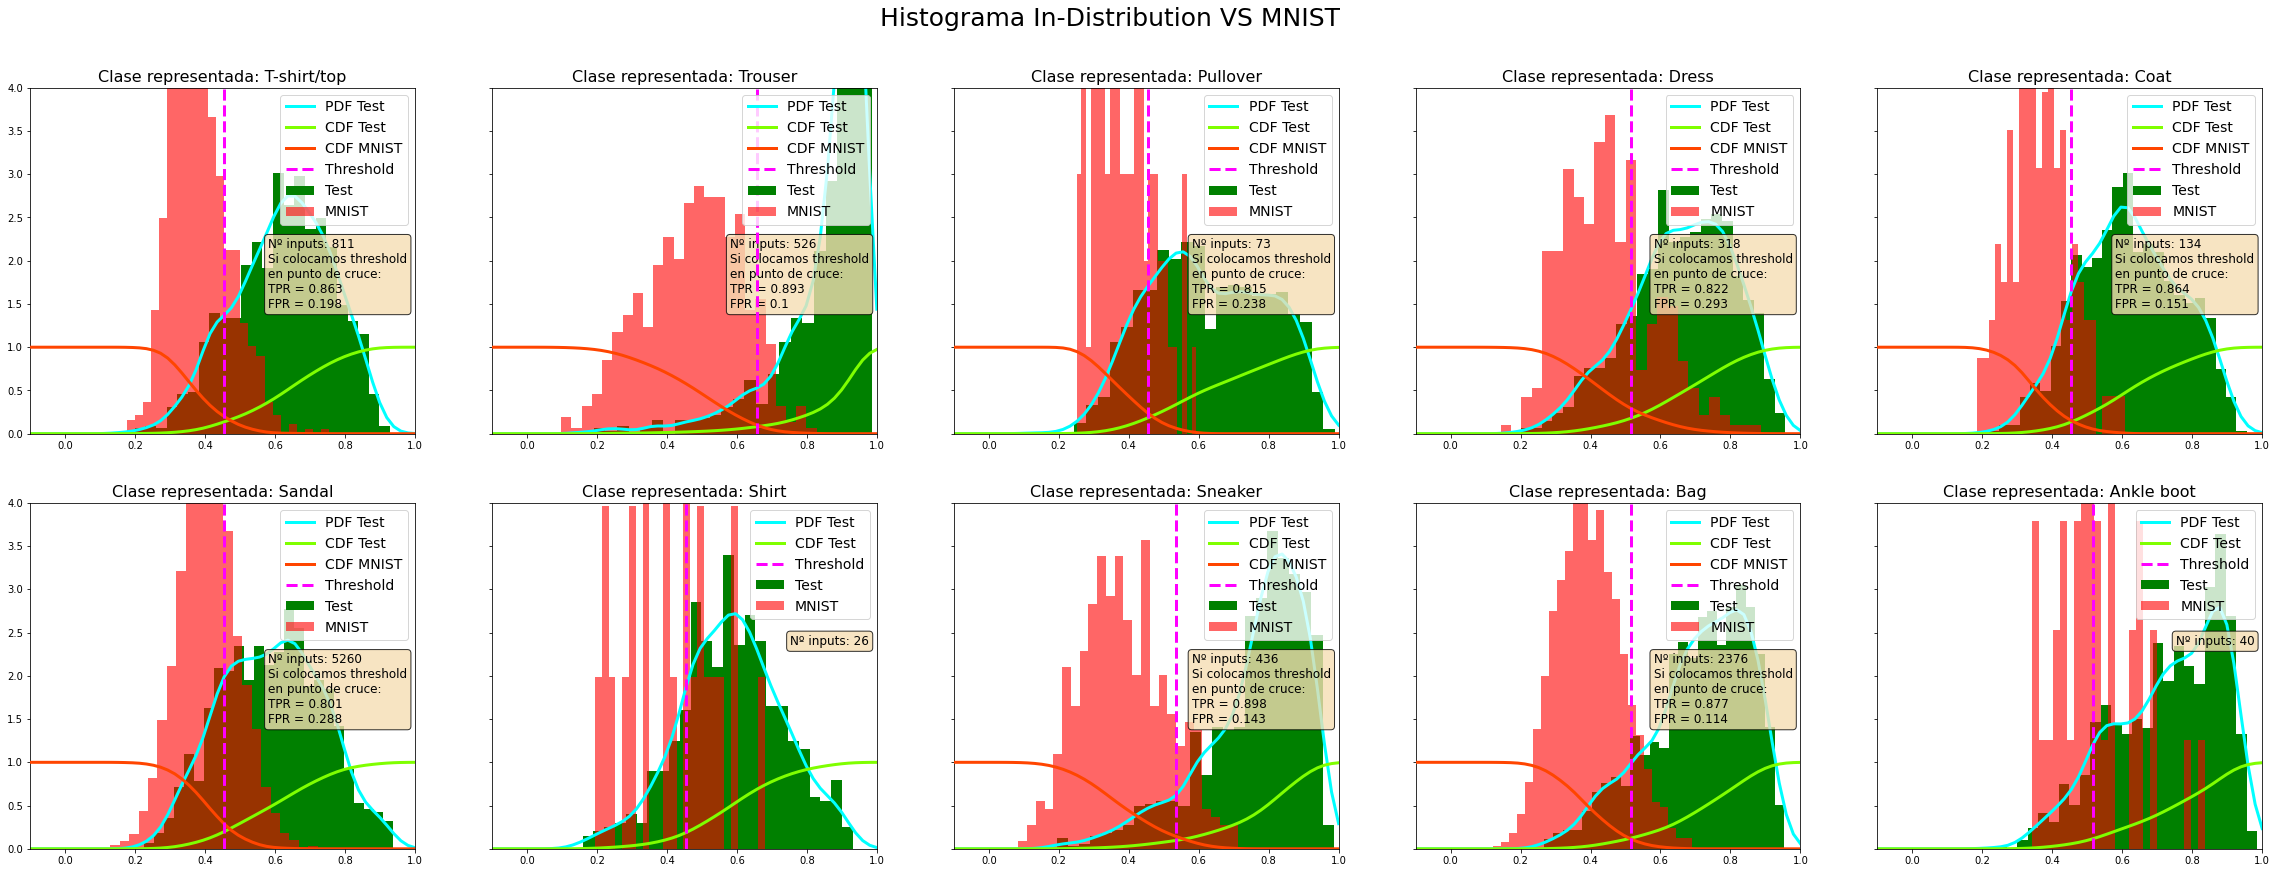

In [ ]:
# Funcion que representa el % de instancias que SI activan el threshold tanto CON como SIN deriva 

# Inicializar los rangos para los que se calcula la CDF
x = np.linspace(-1,1,100)
y = np.linspace(1,-1,100)

# Propiedades de la caja donde va el texto
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# Creacion de figura
fig, ax = plt.subplots(2,5,sharey=True,figsize=(40,14))
plot_verde  = 'Test'   
plot_rojo   = 'MNIST'
fig.suptitle('Histograma In-Distribution VS {}'.format(plot_rojo), fontsize=25,y=0.96)

for num in range(10):

  # KDE fitting
  kde_sci = stats.gaussian_kde(np.array(df_comp['SSIM'].loc[df_comp['Clase_pred']==num]))
  cdf = []
  for i in x:
    cdf.append(kde_sci.integrate_box_1d(-1,i))

  # KDE fitting
  if df_comp_gir['Clase_pred'].value_counts()[num] > 50:
    kde_sci_OOD = stats.gaussian_kde(np.array(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==num]))
    cdf_OOD = []
    for i in y:
      cdf_OOD.append(kde_sci_OOD.integrate_box_1d(i,1))

  # Calculo del punto de cruce minimizando diferencia entre CDFs. La solucion nos da la posicion del punto de minima 
  # diferencia dentro del array, no el valor en si
  sol = minimize_scalar(diferencia_cdf,args=(kde_sci,kde_sci_OOD),method='bounded',bounds=(1,99),options={'xatol': 0.001,'maxiter': 100, 'disp': 0})

  # Punto de cruce es el valor del eje X en la posicion de la solucion 
  p_cruce = x[int(sol.x)]
  tpr_cruce = round(kde_sci.integrate_box_1d(p_cruce,1),3)
  fpr_cruce = round(1-kde_sci_OOD.integrate_box_1d(-1,p_cruce),3)
  
  # Definicion de i y j para plotear bien
  i=0
  j=num
  if num >= 5:
    i = 1
    j = num-5

  # Plots de KDE
  ax[i,j].set_xlim((-0.1,1))
  ax[i,j].set_ylim((0,4))
  ax[i,j].hist(df_comp['SSIM'].loc[df_comp['Clase_pred']==num], density=True,bins=25,color='green',label=plot_verde)
  ax[i,j].hist(df_comp_gir['SSIM'].loc[df_comp_gir['Clase_pred']==num], density=True,bins=25,color='red',alpha=0.6,label=plot_rojo)
  ax[i,j].plot(x, kde_sci.pdf(x), lw=3, label='PDF {}'.format(plot_verde), color='cyan',zorder=1)
  ax[i,j].plot(x, cdf, lw=3, label='CDF {}'.format(plot_verde), color='chartreuse',zorder=2)
  ax[i,j].set_title('Clase representada: {}'.format(class_names[num]),fontsize=16)

  if df_comp_gir['Clase_pred'].value_counts()[num] > 50:
    ax[i,j].plot(y, cdf_OOD, lw=3, label='CDF {}'.format(plot_rojo), color='orangered',zorder=3)
    # Texto
    textstr = 'Nº inputs: {}\nSi colocamos threshold\nen punto de cruce:\nTPR = {}\nFPR = {}'.format(df_comp_gir['Clase_pred'].value_counts()[num],tpr_cruce,fpr_cruce)
    ax[i,j].text(0.98, 0.46, textstr, transform=ax[i,j].transAxes, fontsize=12,horizontalalignment='right',verticalalignment='center', multialignment='left',bbox=props,zorder=4)
  else:
    try:
      textstr = 'Nº inputs: {}'.format(df_comp_gir['Clase_pred'].value_counts()[num])
      ax[i,j].text(0.98, 0.60, textstr, transform=ax[i,j].transAxes, fontsize=12,horizontalalignment='right',verticalalignment='center', multialignment='left',bbox=props,zorder=4)
    except:
      textstr = 'Nº inputs: 0'
      ax[i,j].text(0.98, 0.60, textstr, transform=ax[i,j].transAxes, fontsize=12,horizontalalignment='right',verticalalignment='center', multialignment='left',bbox=props,zorder=4)

  ax[i,j].axvline(x=p_cruce, ymin=0, ymax=1,color='fuchsia',label='Threshold',linewidth=3,linestyle='--',zorder=5)
  ax[i,j].legend(fontsize=14, loc='upper right')

fig.savefig('./Hist_{}_vs_{}'.format(plot_verde,plot_rojo),dpi=200)
#ax[i,j].text(0.69,2.38,'Nº inputs: {}'.format(df_comp_gir['Clase_pred'].value_counts()[num]),fontsize=12)
#ax[i,j].text(0.61,1.9,'''Si colocamos threshold en punto de cruce: TPR = {} TNR = {} '''.format(tpr_cruce,tnr_cruce),fontsize=10)

# Generación de video

In [ ]:
# Sentencias quen genera video a partir de los frames almacenados en una carpeta
# Se encarga tambn de ordenarlos primero

direc_imgs = './pelicula_completa_1/'
path_salida = '/content/sample_data/GCAMplus_Fashion_vs_MNIST_Clusters_Hamming.avi'
fraims = 10
segs_x_imagen = 2
files =[]
convertToVideo(direc_imgs,path_salida,fraims,segs_x_imagen)

TASK COMPLETED


# GradCAM ++ y generación de fotos para videos

GradCAM++ de Fashion MNIST vs MNIST con heatmaps clusters

In [ ]:
# Genera Heatmaps de GradCAM+  ()

contador             = 0
contador_comparacion = 0

# Definimos lo que queremos comparar
pos_inicio                          = 2500
pos_fin                             = 2600
predicciones                        = predicciones_test[pos_inicio:pos_fin]
array_htmaps_a_plotear              = array_htmaps_test_reesc[pos_inicio:pos_fin]
array_similaridad                   = array_ssim_x_imagen_test[pos_inicio:pos_fin]
imagenes                            = test_images[pos_inicio:pos_fin]

predicciones_comparacion            = predicciones_mnist[pos_inicio:pos_fin]
array_htmaps_a_plotear_comparacion  = array_htmaps_mnist_reesc[pos_inicio:pos_fin]
array_similaridad_comparacion       = array_ssim_x_imagen_mnist[pos_inicio:pos_fin]
imagenes_comparacion                = f_test_images[pos_inicio:pos_fin]

# Es una imagen estatica luego la leemos solo una vez
image_2 = io.imread('/content/Heatmaps_x_clase_y_cluster.png')/255.0

# Barra de progreso
bar            = progressbar.ProgressBar(maxval=array_htmaps_a_plotear.shape[0],widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.SimpleProgress()])
bar.start()

while contador < len(predicciones):

  # En cada foto se genera una nueva figura
  fig, ax = plt.subplots(nrows=10, ncols=5, clear=True, figsize=[25,40])
  fig.suptitle('Fashion_MNIST vs MNIST',fontsize=32, y=0.92)
  # i vale 0 y 5
  for i in range(10): 
    
    for j in range(5):

      if i < 5:
        numero_clase = predicciones[contador]
        nombre_clase = class_names[numero_clase]
        gradcam_htmap = array_htmaps_a_plotear[contador]
        titulo = '{} // {}'.format(nombre_clase,round(array_similaridad[contador,0],3))
        plot_heatmap(ax,i,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=imagenes[contador,:,:,0])
        ax[i,j].axis('off')

        contador = contador + 1 

      else:
        numero_clase = predicciones_comparacion[contador_comparacion]
        nombre_clase = class_names[numero_clase]
        gradcam_htmap = array_htmaps_a_plotear_comparacion[contador_comparacion]
        titulo = '{} // {}'.format(nombre_clase,round(array_similaridad_comparacion[contador_comparacion,0],3))
        plot_heatmap(ax,i,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=imagenes_comparacion[contador_comparacion,:,:,0])
        ax[i,j].axis('off')

        contador_comparacion = contador_comparacion + 1 

  # Para crear la escala de colores
  fig.subplots_adjust(right=0.90)
  cbar_ax = fig.add_axes([0.93, 0.35, 0.03, 0.4])
  fig.colorbar(ax[0,0].get_images()[1], cax=cbar_ax,)


  fig_name = './pelicula/fraim_'+ str(contador) + '.png'
  plt.savefig(fig_name)
  fig.clear()
  plt.close(fig) # Para no mostrar las figuras

  image_1 = io.imread(fig_name)/255.0
  

  '''
  fig, axs = plt.subplots(1,2,sharex=True,sharey=True,figsize=(60,60),tight_layout=True,gridspec_kw={'width_ratios': [2, 1]})
  #fig.suptitle('Analisis estadístico del SSIM y MSE de cuando no hay deriva VS cuando hay', fontsize=35)
  axs[0].imshow(image_1,vmin=0,vmax=1)
  axs[1].imshow(image_2,vmin=0,vmax=1)
  
  '''
  fig = plt.figure(figsize=(80, 60)) 

  ax0 = plt.subplot(121)
  ax0.imshow(image_1,vmin=0,vmax=1)
  ax0.axis('off')

  ax1 = plt.subplot(122)
  ax1.imshow(image_2,vmin=0,vmax=1)
  ax1.axis('off')
  plt.subplots_adjust(wspace=-0.47)

  plt.savefig('/content/pelicula_completa/fraim_'+ str(contador) + '.png')
  fig.clear()
  plt.close(fig)
  bar.update(contador)
  

[==================================================================] 250 of 250

In [ ]:
fig = plt.figure(figsize=(80, 60)) 
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
ax0 = plt.subplot(121)
ax0.imshow(image_1,vmin=0,vmax=1)
ax1 = plt.subplot(122)
ax1.imshow(image_2,vmin=0,vmax=1)
#plt.tight_layout(h_pad=None, w_pad=0.2)
# set the spacing between subplots
plt.subplots_adjust(wspace=-0.47)

In [ ]:
# Genera fotos de los heatmaps cada cierto numero de instancias de entramiento. 
# Se entrena la red normal, sin deriva de concepto

batch_size=1
epochs=1
frec_foto = 250 # En este codigo no puede ser menor que 1
contador=0
extension_video = 60000

indices = [545,5848,35,369,803,45,729,34,787,284] # Son los indices de los números (ordenados de 0 a 9)

for epocas in range(0,2):
  for i in range(0,extension_video,frec_foto):
    history=model.fit(train_images[i:(i+frec_foto-1)],train_labels[i:(i+frec_foto-1)], batch_size ,epochs ,verbose=0)

    fig, ax = plt.subplots(4, 5, clear=True, figsize=[25,20])
    fig.suptitle('Nº de instancias de entrenamiento entrenadas: {}'.format(i+frec_foto-1),fontsize=30)
    for j in range(5):
      titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j]],axis=0)))

      gradcam_htmap = grad_cam_plus(test_images[indices[j]],model, 'conv2d_1')
      plot_heatmap(ax,0,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j],:,:,0])
      gradcam_htmap, saliency_htmap = make_gradcam_heatmap_V2(np.expand_dims(test_images[indices[j]],axis=0),model, 'conv2d_1', layer_names,top_pred_index=np.argmax(test_labels[j]))
      plot_heatmap(ax,2,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j],:,:,0])

      titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j+5]],axis=0)))

      gradcam_htmap = grad_cam_plus(test_images[indices[j+5]],model, 'conv2d_1')    
      plot_heatmap(ax,1,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j+5],:,:,0])
      gradcam_htmap, saliency_htmap = make_gradcam_heatmap_V2(np.expand_dims(test_images[indices[j+5]],axis=0),model, 'conv2d_1', layer_names,top_pred_index=np.argmax(test_labels[j]))
      plot_heatmap(ax,3,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j+5],:,:,0])
    
    fig_name = './pelicu/fraim_'+ str(contador) + '.png'
    contador = contador + 1
    plt.savefig(fig_name)
    fig.clear()
    plt.close(fig) # Para no mostrar las figuras

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


In [ ]:
# Genera fotos de los heatmaps cada cierto numero de instancias de entramiento mientras la red se entrena con IMAGENES GIRADAS

indices = [545,5848,35,369,803,45,729,34,787,284] # Son los indices de los números (ordenados de 0 a 9)

batch_size=1
epochs=1
frec_foto = 50 # En este codigo no puede ser menor que 1
contador=0
extension_video = 20000 # Numero de instancias que se van a procesar en el video
instancias_x_giro = 2000  # Cada cuantas instancias se va a realizar un giro
cant_giros = extension_video/instancias_x_giro # Cuantos giros se van a realizar a la instancias
ang_x_giro = 15 # Los grados que se va a girar en cada giro
angulos = []
g_test_images = np.array(test_images, copy=True)

for ang in range(0,int(ang_x_giro*cant_giros),ang_x_giro): # Generamos una lista con los angulos
  angulos.append(ang)
  
# Se realiza la copia en cada iteracion ya que al encadenar giros se pierde informacion de la imagen
# De esta forma evitamos dicha perdida de informacion   

g_train_images = np.array(train_images, copy=True) # Hay que copiar test_images para no alterar el array original
cont_ang = 0

for i in range(0,extension_video,frec_foto):
  if i % instancias_x_giro == 0:
    g_train_images = np.array(train_images, copy=True) # Hay que copiar test_images para no alterar el array original
    girar_img(g_train_images, angulos[cont_ang])
    cont_ang = cont_ang + 1 
    model.evaluate(test_images, test_labels)

  history=model.fit(g_train_images[i:(i+frec_foto-1)],train_labels[i:(i+frec_foto-1)], batch_size ,epochs ,verbose=0)

  fig, ax = plt.subplots(4, 5, clear=True, figsize=[25,20])
  fig.suptitle('Angulo de imagenes de entrenamiento: {}'.format(angulos[cont_ang-1]),fontsize=30)
  for j in range(5):
    gradcam_htmap, saliency_htmap = make_gradcam_heatmap_V2(np.expand_dims(test_images[indices[j]],axis=0),model_wo_sm, 'conv2d_1', layer_names,top_pred_index=j)
    titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j]],axis=0)))
    plot_heatmap(ax,0,j,gradcam_htmap, title=titulo)
    plot_heatmap(ax,2,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j],:,:,0])

    gradcam_htmap, saliency_htmap = make_gradcam_heatmap_V2(np.expand_dims(test_images[indices[j+5]],axis=0),model_wo_sm, 'conv2d_1', layer_names,top_pred_index=j+5)
    titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j+5]],axis=0)))
    plot_heatmap(ax,1,j,gradcam_htmap, title=titulo)
    plot_heatmap(ax,3,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j+5],:,:,0])
  
  fig_name = './peli/fraim_'+ str(contador) + '.jpg'
  contador = contador + 1
  plt.savefig(fig_name)
  fig.clear()
  plt.close(fig) # Para no mostrar las figuras

In [ ]:
# Genera Heatmaps de GradCAM+ y GradCAM superpuestos a los numeros
indices = [545,5848,35,369,803,45,729,34,787,284] # Son los indices de los números (ordenados de 0 a 9)
layer_names = ['max_pooling2d_1', 'flatten','dropout', 'dense1','dense_2'] 
fig, ax = plt.subplots(4, 5, clear=True, figsize=[20,16])
for j in range(5):
  titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j]],axis=0)))
  gradcam_htmap = grad_cam_plus(test_images[indices[j]],model, 'conv2d_1')
  plot_heatmap(ax,0,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j],:,:,0])
  gradcam_htmap, saliency_htmap = make_gradcam_heatmap_V2(np.expand_dims(test_images[indices[j]],axis=0),model_wo_softmax, 'conv2d_1', layer_names,top_pred_index=j)  
  plot_heatmap(ax,2,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j],:,:,0])

  gradcam_htmap = grad_cam_plus(test_images[indices[j+5]],model, 'conv2d_1')
  titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j+5]],axis=0)))
  plot_heatmap(ax,1,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j+5],:,:,0])
  gradcam_htmap, saliency_htmap = make_gradcam_heatmap_V2(np.expand_dims(test_images[indices[j+5]],axis=0),model_wo_softmax, 'conv2d_1', layer_names,top_pred_index=j+5) 
  plot_heatmap(ax,3,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j+5],:,:,0])



GradCAM++ de Fashion MNIST vs MNIST

In [ ]:
# Genera Heatmaps de GradCAM+ y GradCAM superpuestos a los numeros
num = 5
inicio = 0 # Hay que definir un inicio si o si cuando defines el numero

if inicio == None and num == None:
  indices = [545,5848,35,369,803,45,729,34,787,284] # Son los indices de los números (ordenados de 0 a 9)
elif num == None:
  indices = [inicio+i for i in range(0,10)]
else:
  indices = buscar_num(num,899,test_labels,inicio)

frec_foto = 100 # En este codigo no puede ser menor que 1
contador=0

# Para encontrar todos los indices de numeros que sean vistos como sandalias
indices_sandal = []
preds = model.predict(f_test_images)
while len(indices_sandal) < len(indices):
  
  if np.argmax(preds[contador]) == 5:
    indices_sandal.append(contador)
  contador = contador + 1

contador = 0
# Barra de progreso
bar = progressbar.ProgressBar(maxval=len(indices),widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

for i in range(0,len(indices),10):

  fig, ax = plt.subplots(4, 5, clear=True, figsize=[25,20])
  fig.suptitle('Fashion_MNIST vs MNIST',fontsize=25)
  for j in range(5):

    numero_clase = np.argmax(model.predict(np.expand_dims(test_images[indices[i+j]],axis=0)))
    nombre_clase = class_names[numero_clase]
    gradcam_htmap = grad_cam_plus(test_images[indices[i+j]],model, 'conv2d_1')
    titulo = '{} // {}'.format(nombre_clase,round(ssim(gradcam_htmap,lista_heatmaps_prom[numero_clase]),3))
    plot_heatmap(ax,0,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[i+j],:,:,0])

    numero_clase = np.argmax(model.predict(np.expand_dims(test_images[indices[i+j+5]],axis=0)))
    nombre_clase = class_names[numero_clase]
    gradcam_htmap = grad_cam_plus(test_images[indices[i+j+5]],model, 'conv2d_1')
    titulo = '{} // {}'.format(nombre_clase,round(ssim(gradcam_htmap,lista_heatmaps_prom[numero_clase]),3))
    plot_heatmap(ax,1,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[i+j+5],:,:,0])
    
    numero_clase = np.argmax(model.predict(np.expand_dims(f_test_images[indices_sandal[i+j]],axis=0)))
    nombre_clase = class_names[numero_clase]
    gradcam_htmap = grad_cam_plus(f_test_images[indices_sandal[i+j]],model, 'conv2d_1')
    titulo = '{} // {}'.format(nombre_clase,round(ssim(gradcam_htmap,lista_heatmaps_prom[numero_clase]),3))
    plot_heatmap(ax,2,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=f_test_images[indices_sandal[i+j],:,:,0])

    numero_clase = np.argmax(model.predict(np.expand_dims(f_test_images[indices_sandal[i+j+5]],axis=0)))
    nombre_clase = class_names[numero_clase]
    gradcam_htmap = grad_cam_plus(f_test_images[indices_sandal[i+j+5]],model, 'conv2d_1')
    titulo = '{} // {}'.format(nombre_clase,round(ssim(gradcam_htmap,lista_heatmaps_prom[numero_clase]),3))
    plot_heatmap(ax,3,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=f_test_images[indices_sandal[i+j+5],:,:,0])

  fig_name = './pelicula_6/fraim_'+ str(contador) + '.png'
  contador = contador + 1
  plt.savefig(fig_name)
  fig.clear()
  plt.close(fig) # Para no mostrar las figuras
  bar.update(i)

[======================================================================= ]  98%

In [ ]:
# Genera Heatmap de GradCAM++ superpuesto y sin superponer
indices = [545,5848,35,369,803,45,729,34,787,284] # Son los indices de los números (ordenados de 0 a 9)
layer_names = ['max_pooling2d_1', 'flatten','dropout', 'dense1','softmax'] 
fig, ax = plt.subplots(4, 5, clear=True, figsize=[20,16])
for j in range(5):
  titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j]],axis=0)))
  gradcam_htmap = grad_cam_plus(test_images[indices[j]],model, 'conv2d_1')
  plot_heatmap(ax,0,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j],:,:,0])
  plot_heatmap(ax,2,j,gradcam_htmap, title=titulo)

  gradcam_htmap = grad_cam_plus(test_images[indices[j+5]],model, 'conv2d_1')
  titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j+5]],axis=0)))
  plot_heatmap(ax,1,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j+5],:,:,0])
  plot_heatmap(ax,3,j,gradcam_htmap, title=titulo)

In [ ]:
# Genera fotos de los heatmaps de GradCAM++ cada cierto numero de instancias de entramiento mientras la red se entrena con imagenes giradas
# Se mantienen las neuronas de clase, es decir, la clase que debería estar prediciendo

indices = [545,5848,35,369,803,45,729,34,787,284] # Son los indices de los números (ordenados de 0 a 9)
#layer_names = ['max_pooling2d_1', 'flatten','dropout', 'dense'] 

batch_size=1
epochs=1
frec_foto = 100 # En este codigo no puede ser menor que 1
contador=0
extension_video = 60000 # Numero de instancias que se van a procesar en el video
instancias_x_giro = 6000  # Cada cuantas instancias se va a realizar un giro
cant_giros = extension_video/instancias_x_giro # Cuantos giros se van a realizar a la instancias
ang_x_giro = 20 # Los grados que se va a girar en cada giro
angulos = []
cont_ang = 0

for ang in range(0,int(ang_x_giro*cant_giros),ang_x_giro): # Generamos una lista con los angulos
  angulos.append(-ang)
  
# Se realiza la copia en cada iteracion ya que al encadenar giros se pierde informacion de la imagen
# De esta forma evitamos dicha perdida de informacion   
g_test_images = np.array(test_images, copy=True)
g_train_images = np.array(train_images, copy=True) 

for i in range(0,extension_video,frec_foto):
  if i % instancias_x_giro == 0:
    g_train_images = np.array(train_images, copy=True) # Hay que copiar test_images para no alterar el array original
    g_test_images = np.array(test_images, copy=True)   # Hay que copiar test_images para no alterar el array original
    girar_img(g_train_images, angulos[cont_ang])
    girar_img(g_test_images, angulos[cont_ang])
    print('Angulo = ',angulos[cont_ang])
    model.evaluate(test_images, test_labels)
    model.evaluate(g_test_images, test_labels)
    print('----------------------------------')
    cont_ang = cont_ang + 1 

  history=model.fit(g_train_images[i:(i+frec_foto-1)],train_labels[i:(i+frec_foto-1)], batch_size ,epochs ,verbose=0)

  fig, ax = plt.subplots(4, 5, clear=True, figsize=[25,20])
  fig.suptitle('Angulo de imagenes de entrenamiento: {}'.format(angulos[cont_ang-1]),fontsize=30)
  for j in range(5):

    titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j]],axis=0)))
    gradcam_htmap = grad_cam_plus(test_images[indices[j]],model, 'conv2d_1', category_id=np.argmax(test_labels[indices[j]]))
    plot_heatmap(ax,0,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j],:,:,0])

    titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j+5]],axis=0)))
    gradcam_htmap = grad_cam_plus(test_images[indices[j+5]],model, 'conv2d_1', category_id=np.argmax(test_labels[indices[j+5]]))
    plot_heatmap(ax,1,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j+5],:,:,0])
    
    titulo = np.argmax(model.predict(np.expand_dims(g_test_images[indices[j]],axis=0)))
    gradcam_htmap = grad_cam_plus(g_test_images[indices[j]],model, 'conv2d_1', category_id=np.argmax(test_labels[indices[j]]))
    plot_heatmap(ax,2,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=g_test_images[indices[j],:,:,0])

    titulo = np.argmax(model.predict(np.expand_dims(g_test_images[indices[j+5]],axis=0)))
    gradcam_htmap = grad_cam_plus(g_test_images[indices[j+5]],model, 'conv2d_1', category_id=np.argmax(test_labels[indices[j+5]])) 
    plot_heatmap(ax,3,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=g_test_images[indices[j+5],:,:,0])

  fig_name = './peli/fraim_'+ str(contador) + '.png'
  contador = contador + 1
  plt.savefig(fig_name)
  fig.clear()
  plt.close(fig) # Para no mostrar las figuras

In [ ]:
# Genera fotos de los heatmaps de GradCAM++ cada cierto numero de instancias de entramiento mientras la red se entrena con imagenes giradas
# NO Se mantienen las neuronas de clase, es decir, el heatmap va a fijarse en la neurona que esté prediciendo

indices = [545,5848,35,369,803,45,729,34,787,284] # Son los indices de los números (ordenados de 0 a 9)
#layer_names = ['max_pooling2d_1', 'flatten','dropout', 'dense'] 

batch_size=1
epochs=1
frec_foto = 100 # En este codigo no puede ser menor que 1
contador=0
extension_video = 60000 # Numero de instancias que se van a procesar en el video
instancias_x_giro = 6000  # Cada cuantas instancias se va a realizar un giro
cant_giros = extension_video/instancias_x_giro # Cuantos giros se van a realizar a la instancias
ang_x_giro = 20 # Los grados que se va a girar en cada giro
angulos = []
cont_ang = 0

for ang in range(0,int(ang_x_giro*cant_giros),ang_x_giro): # Generamos una lista con los angulos
  angulos.append(-ang)
  
# Se realiza la copia en cada iteracion ya que al encadenar giros se pierde informacion de la imagen
# De esta forma evitamos dicha perdida de informacion   
g_test_images = np.array(test_images, copy=True)
g_train_images = np.array(train_images, copy=True) 

for i in range(0,extension_video,frec_foto):
  if i % instancias_x_giro == 0:
    g_train_images = np.array(train_images, copy=True) # Hay que copiar test_images para no alterar el array original
    g_test_images = np.array(test_images, copy=True)   # Hay que copiar test_images para no alterar el array original
    girar_img(g_train_images, angulos[cont_ang])
    girar_img(g_test_images, angulos[cont_ang])
    print('Angulo = ',angulos[cont_ang])
    model.evaluate(test_images, test_labels)
    model.evaluate(g_test_images, test_labels)
    print('----------------------------------')
    cont_ang = cont_ang + 1 

  history=model.fit(g_train_images[i:(i+frec_foto-1)],train_labels[i:(i+frec_foto-1)], batch_size ,epochs ,verbose=0)

  fig, ax = plt.subplots(4, 5, clear=True, figsize=[25,20])
  fig.suptitle('Angulo de imagenes de entrenamiento: {}'.format(angulos[cont_ang-1]),fontsize=30)
  for j in range(5):

    titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j]],axis=0)))
    gradcam_htmap = grad_cam_plus(test_images[indices[j]],model, 'conv2d_1')
    plot_heatmap(ax,0,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j],:,:,0])

    titulo = np.argmax(model.predict(np.expand_dims(test_images[indices[j+5]],axis=0)))
    gradcam_htmap = grad_cam_plus(test_images[indices[j+5]],model, 'conv2d_1')
    plot_heatmap(ax,1,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=test_images[indices[j+5],:,:,0])
    
    titulo = np.argmax(model.predict(np.expand_dims(g_test_images[indices[j]],axis=0)))
    gradcam_htmap = grad_cam_plus(g_test_images[indices[j]],model, 'conv2d_1', category_id=np.argmax(test_labels[indices[j]]))
    plot_heatmap(ax,2,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=g_test_images[indices[j],:,:,0])

    titulo = np.argmax(model.predict(np.expand_dims(g_test_images[indices[j+5]],axis=0)))
    gradcam_htmap = grad_cam_plus(g_test_images[indices[j+5]],model, 'conv2d_1', category_id=np.argmax(test_labels[indices[j+5]])) 
    plot_heatmap(ax,3,j,gradcam_htmap, title=titulo, superimposed_img = True,imagen=g_test_images[indices[j+5],:,:,0])

  fig_name = './peli/fraim_'+ str(contador) + '.png'
  contador = contador + 1
  plt.savefig(fig_name)
  fig.clear()
  plt.close(fig) # Para no mostrar las figuras